# 1. Loading necessary libraries and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency, norm
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_validate, KFold, GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

from xgboost import XGBClassifier

from tabulate import tabulate
from tqdm import tqdm
import time

In [2]:
# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# 2. Data Acquisition and Loading

##### _Both Partners_ #####
Load the dataset into two DataFrames: VALUES and LABELS

In [3]:
values_file = 'Values.csv'
labels_file = 'Labels.csv'

VALUES = pd.read_csv(values_file)
LABELS = pd.read_csv(labels_file)

Display the first few rows of each DataFrame

In [4]:
print("VALUES DataFrame:")
print(VALUES.head())

print("\nLABELS DataFrame:")
print(LABELS.head())

VALUES DataFrame:
      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    never pay   

  water_quality quality_group   

# 2. Preliminary EDA

### Description of function for numerical variables
##### _Both Partners_ #####

In [5]:
print("VALUES DataFrame - Describe function:\n")
print(VALUES.describe())

VALUES DataFrame - Describe function:

                 id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.


### Countplot for status_group in LABELS
##### _Partner B_ #####

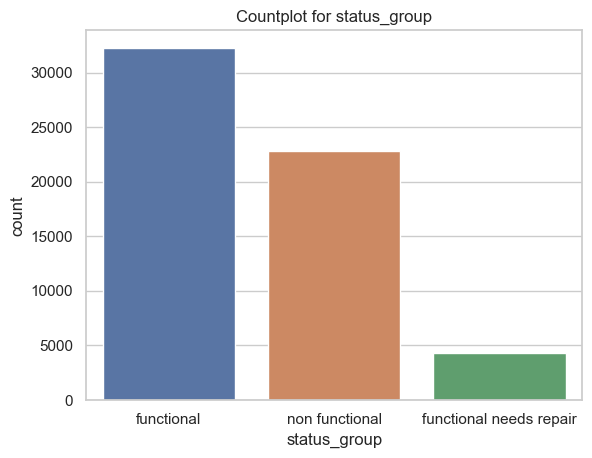

In [6]:
sns.countplot(x='status_group', data=LABELS)
plt.title("Countplot for status_group")
plt.show()


### Check percentage of null and missing values
##### _Partner B_ #####

Here's a function to check both nulls and zeros for each column in a given DataFrame

In [7]:
def check_nulls_and_zeros(df):
    """
    Function to check the percentage of nulls and zeros for each column in a given DataFrame.
    
    Args:
    df: DataFrame to analyze

    Returns:
    None
    """
    # Check percentage of null values
    print("Percentage of null values in each column:")
    print((df.isnull().sum() / len(df)) * 100)

    # Check percentage of zero values
    print("\nPercentage of zero values in each column:")
    print((df.eq(0).sum() / len(df)) * 100)

In [8]:
check_nulls_and_zeros(VALUES)

Percentage of null values in each column:
id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.119529
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.000000
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.526936
scheme_name              47.417508
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management   

Check unique values in each column
##### _Partner B_ #####

In [9]:
print("\nNumber of unique values in each column of VALUES DataFrame:")
print(VALUES.nunique())


Number of unique values in each column of VALUES DataFrame:
id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_t

Function desc for displaying required statistics and description together.
##### _Partner A_ #####

In [10]:
def desc(df):
    result = []
    for col in df.columns:
        # Calculate the required statistics
        dtype = df[col].dtype
        null_percentage = (df[col].isnull().sum() / len(df)) * 100
        zero_percentage = (df[col].eq(0).sum() / len(df)) * 100
        unique_values = df[col].nunique()
        mode = df[col].mode().values[0]

        # Calculate additional statistics for numeric columns
        if np.issubdtype(df[col].dtype, np.number):
            min_value = df[col].min()
            max_value = df[col].max()
            mean_value = df[col].mean()
            range_value = max_value - min_value
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            outlier_count = ((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr))).sum()
        else:
            min_value = max_value = mean_value = range_value = outlier_count = np.NaN

        result.append([col, dtype, null_percentage, zero_percentage, unique_values, mode, min_value, max_value, mean_value, range_value, outlier_count])

    # Create a DataFrame with the calculated statistics
    result_df = pd.DataFrame(result, columns=['Feature', 'Data_Type', 'Null_Percentage', 'Zero_Percentage', 'Unique_Values', 'Mode', 'Min', 'Max', 'Mean', 'Range', 'Outliers'])
    return result_df

In [11]:
# To display the results as HTML:
def summarize(df):
    summary_df = desc(df)
    display(HTML(summary_df.to_html()))

In [12]:
summarize(VALUES)

In [13]:
summarize(LABELS)

### Boxplots for numerical columns to check for outliers
##### _Partner B_ #####

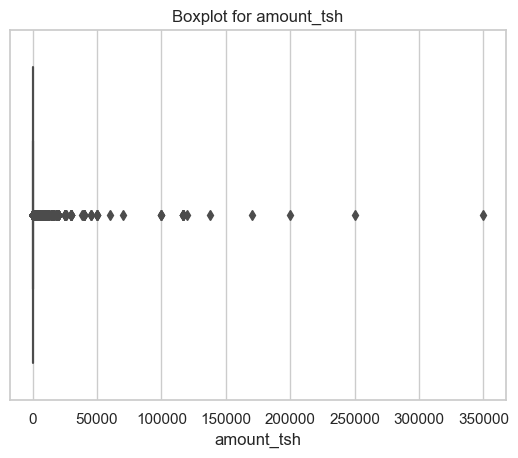

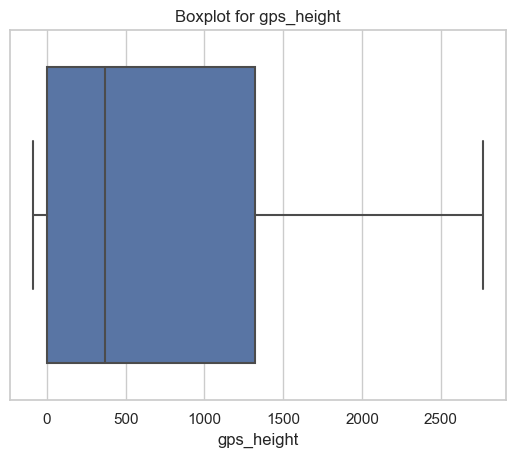

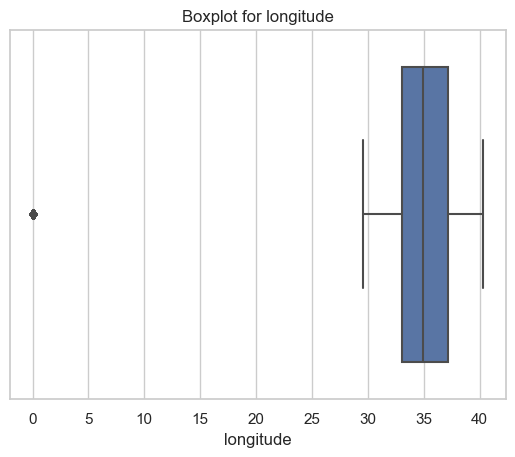

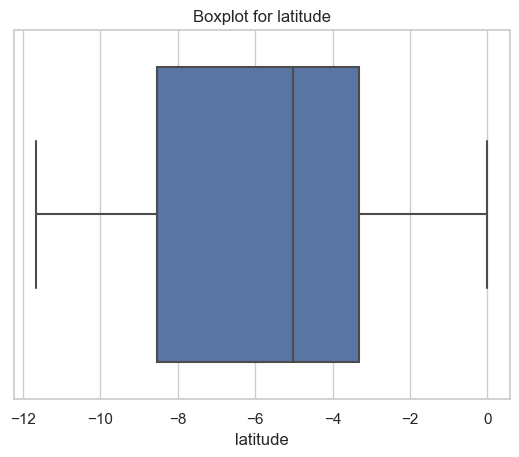

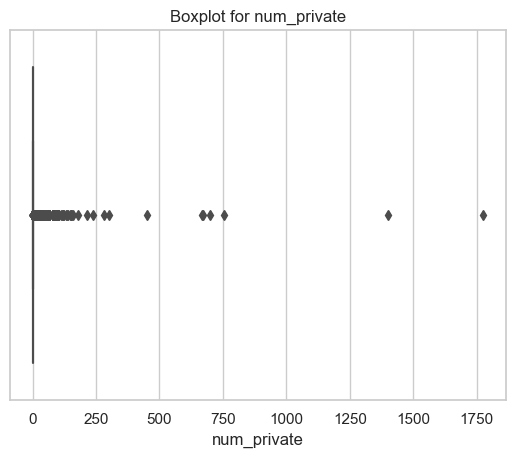

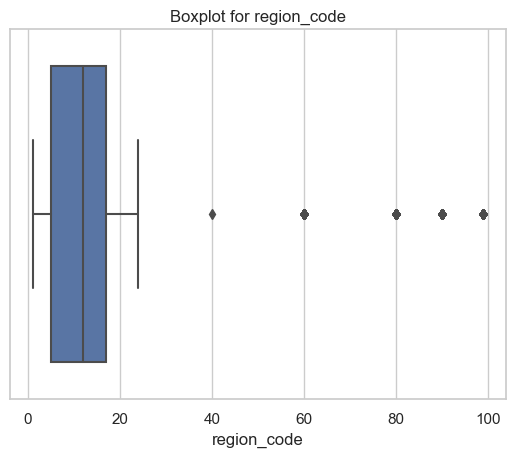

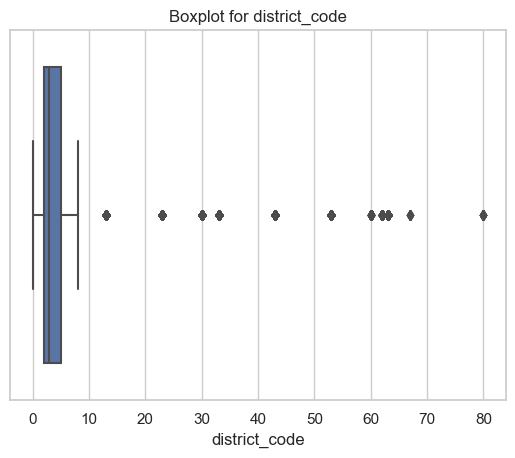

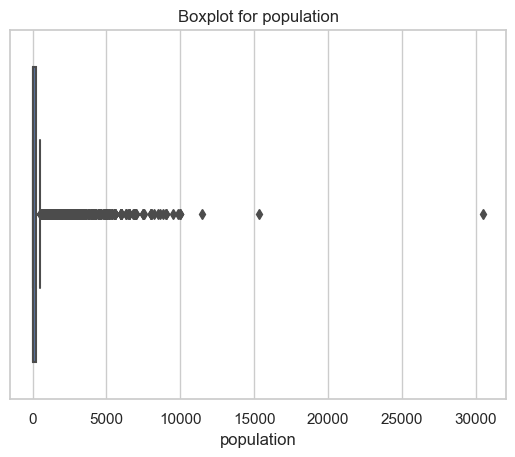

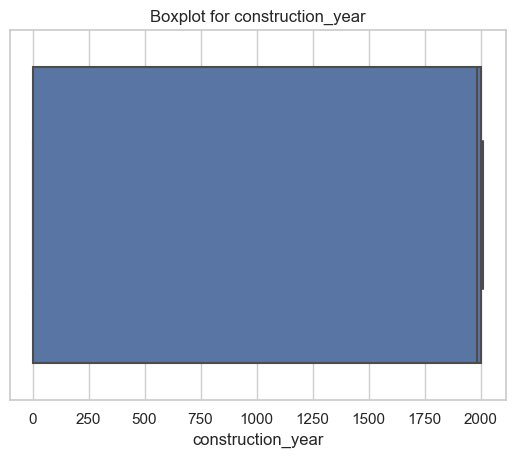

In [14]:
numerical_columns = ['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']
for column in numerical_columns:
    plt.figure()
    sns.boxplot(x=VALUES[column])
    plt.title(f"Boxplot for {column}")

plt.show()

**Histograms to examine the distribution of numerical variables like population, gps_height, and construction_year, watepoint.**<br>
**Bar plots to analyze categorical variables like waterpoint_type, payment, and water_quality.**<br>
**Heatmap to visualize the correlation between features using a color-coded matrix.**<br>
##### _Partner A_ #####

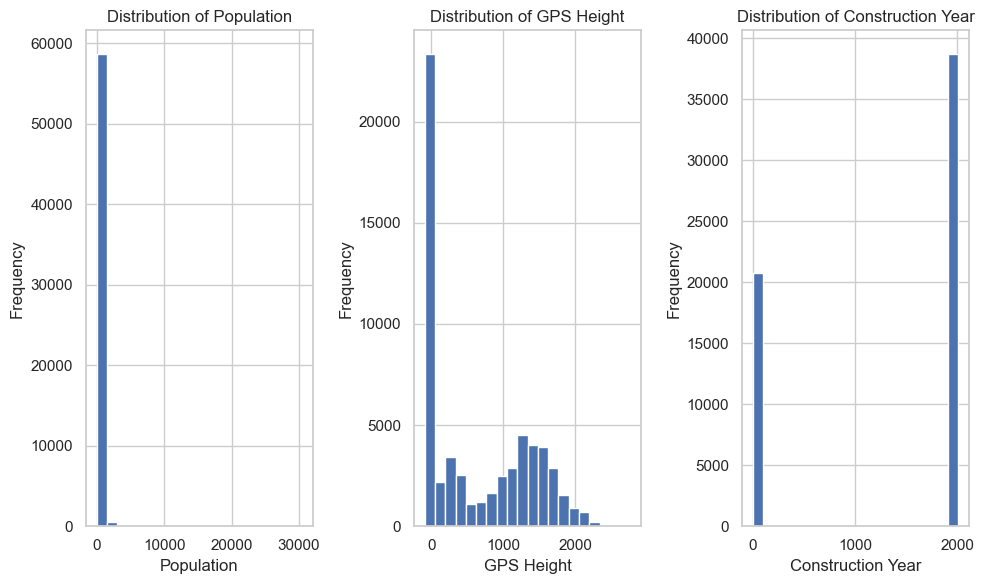

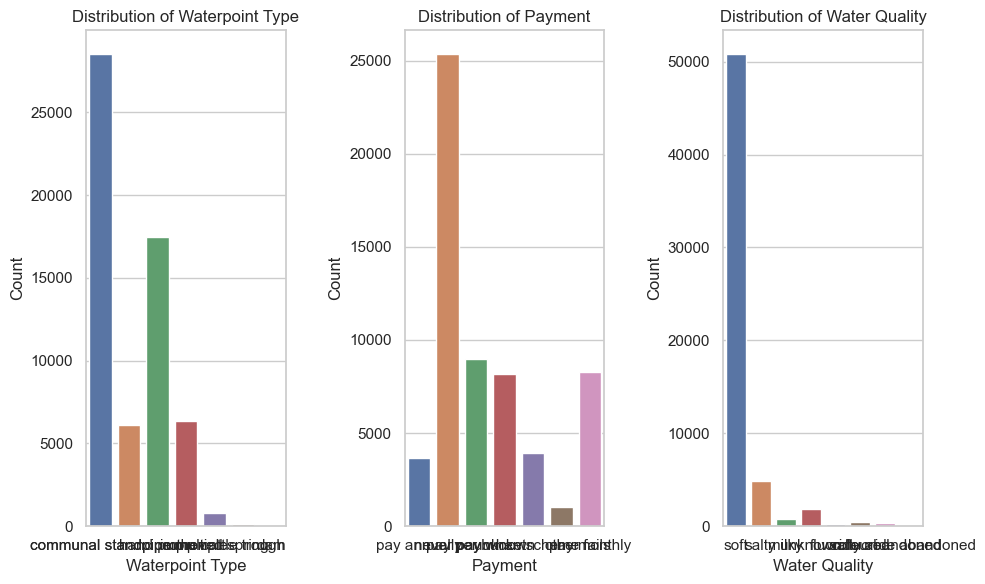

C:\Users\nkagg\AppData\Local\Temp\ipykernel_4100\1824151748.py:50: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


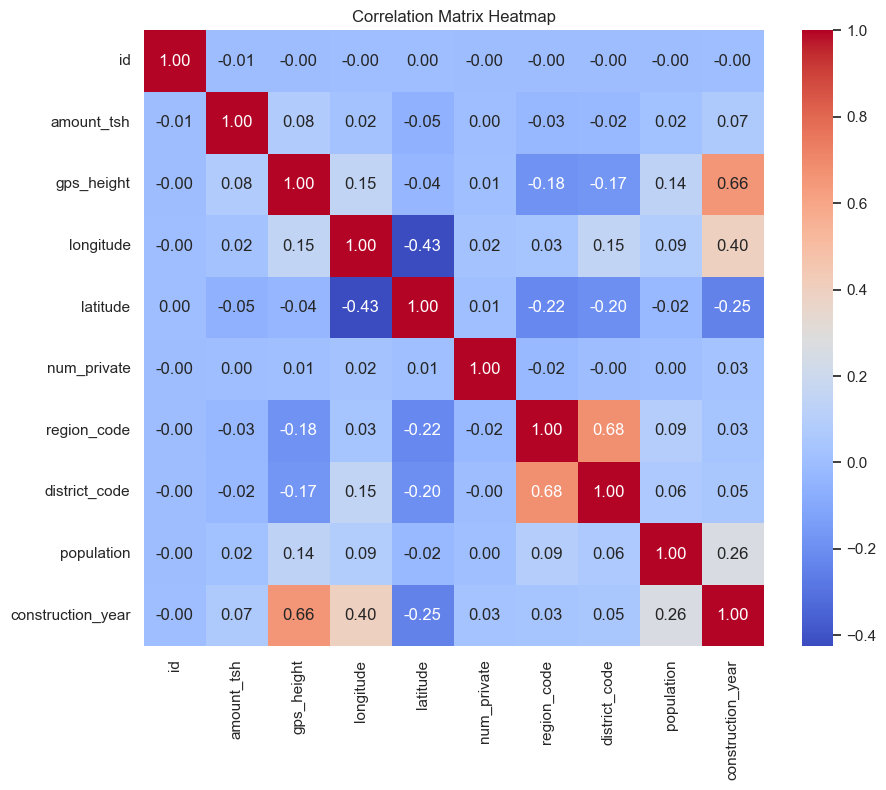

In [15]:
df = VALUES

# Histograms
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.hist(df['population'], bins=20)
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Distribution of Population')

plt.subplot(1, 3, 2)
plt.hist(df['gps_height'], bins=20)
plt.xlabel('GPS Height')
plt.ylabel('Frequency')
plt.title('Distribution of GPS Height')

plt.subplot(1, 3, 3)
plt.hist(df['construction_year'], bins=20)
plt.xlabel('Construction Year')
plt.ylabel('Frequency')
plt.title('Distribution of Construction Year')

plt.tight_layout()
plt.show()

# Bar plots
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='waterpoint_type')
plt.xlabel('Waterpoint Type')
plt.ylabel('Count')
plt.title('Distribution of Waterpoint Type')

plt.subplot(1, 3, 2)
sns.countplot(data=df, x='payment')
plt.xlabel('Payment')
plt.ylabel('Count')
plt.title('Distribution of Payment')

plt.subplot(1, 3, 3)
sns.countplot(data=df, x='water_quality')
plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.title('Distribution of Water Quality')

plt.tight_layout()
plt.show()

# Heatmap of correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Missing Data Visualization by scatter plots of latitude and longitude after removing outliers- done for: amount_tsh, gps_height, population, permit, public_meeting, construction_year, scheme_name, subvillage**<br>
##### _Partner A_ #####

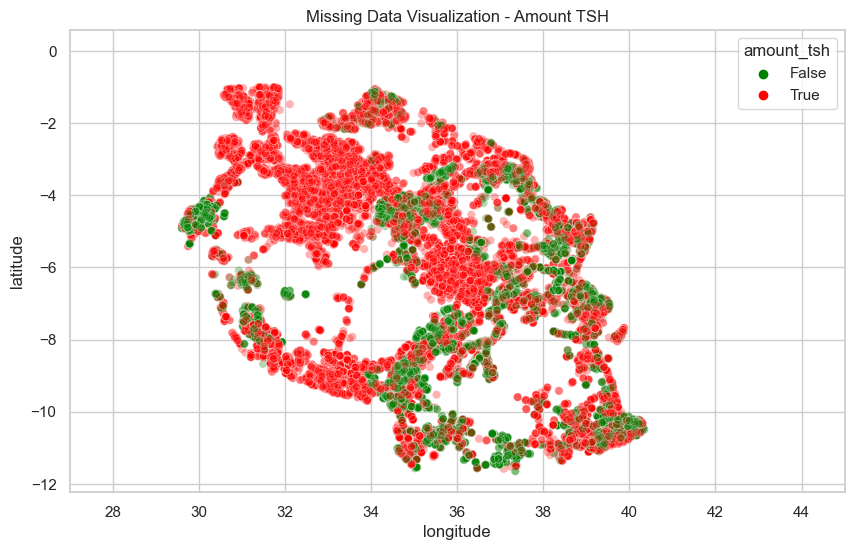

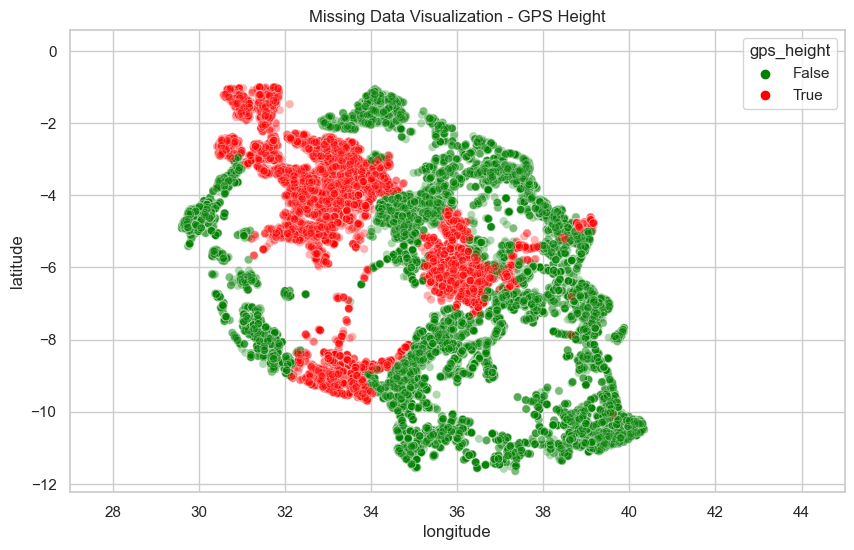

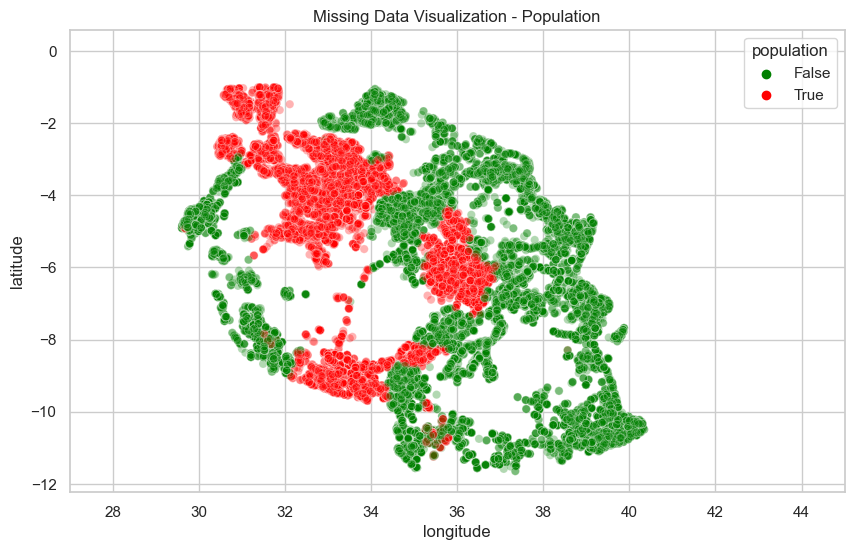

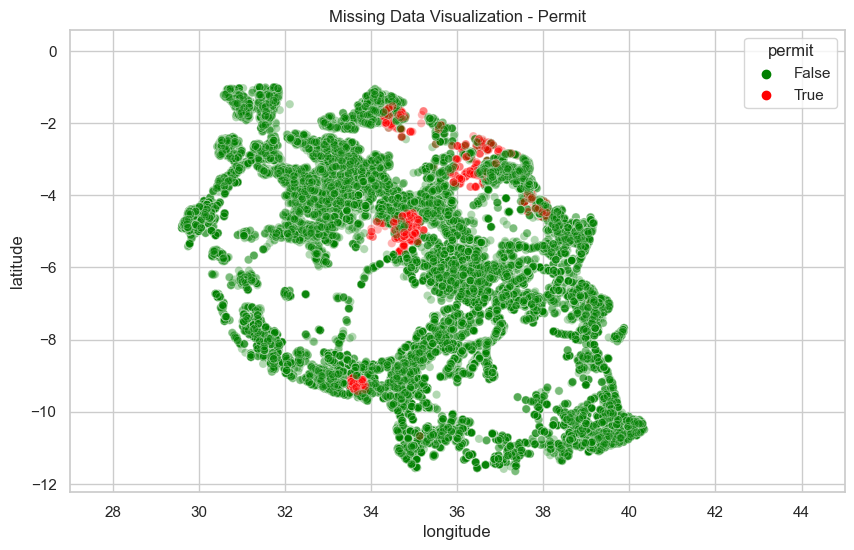

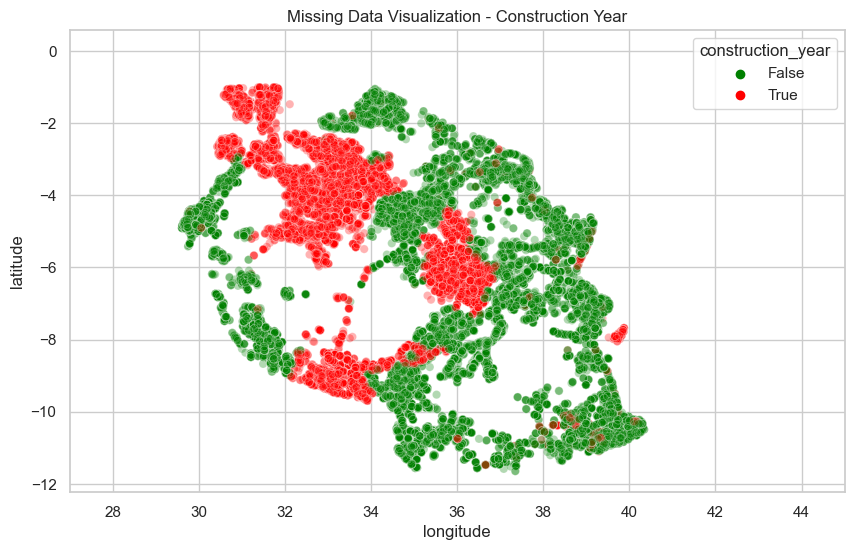

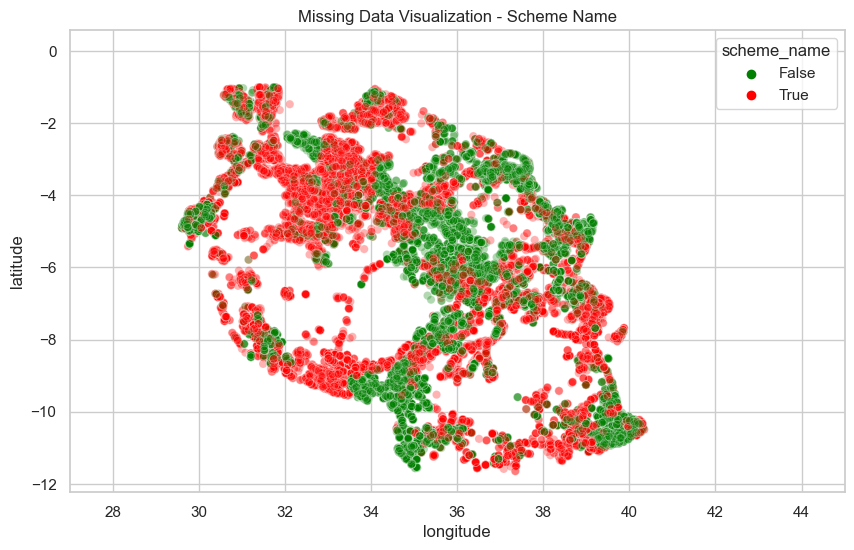

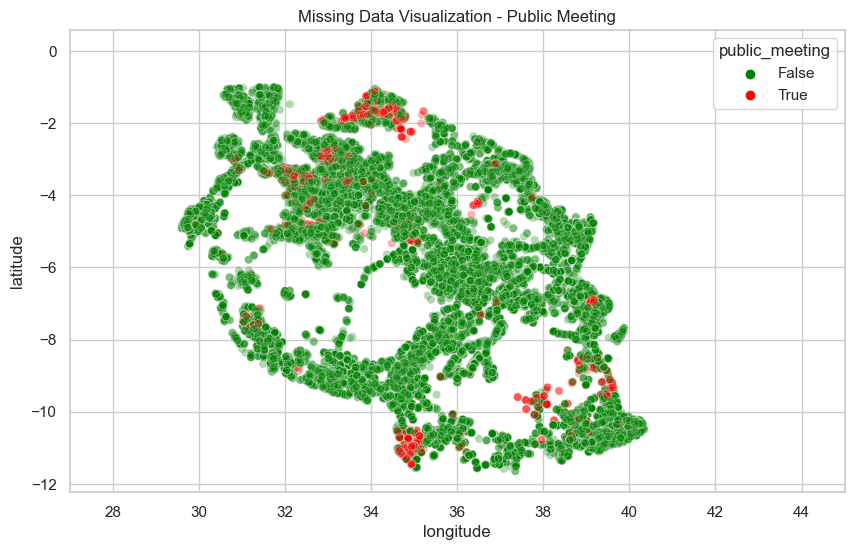

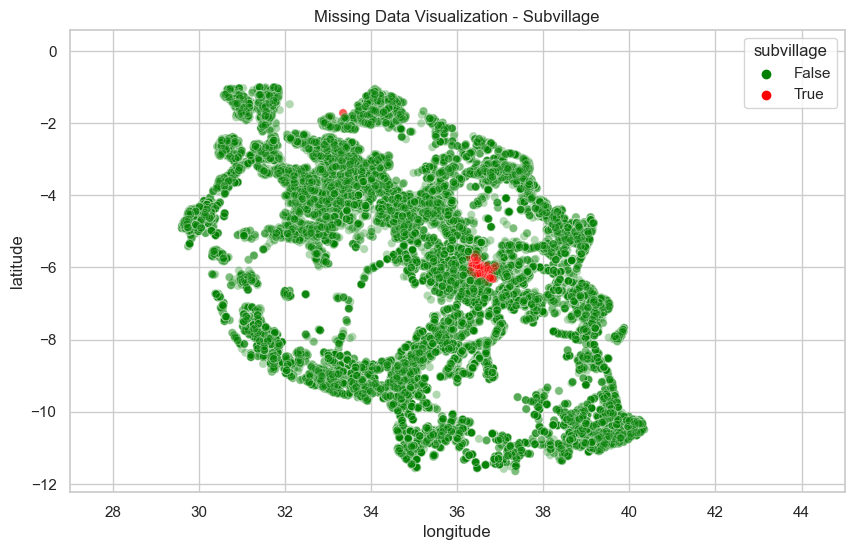

In [16]:
# Remove outliers from latitude and longitude
df_clean = df[(df['latitude'] >= -90) & (df['latitude'] <= 90) & (df['longitude'] >= -180) & (df['longitude'] <= 180)]

# Create a scatter plot for amount_tsh
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue=(df_clean['amount_tsh'].isnull() | (df_clean['amount_tsh'] == 0)), palette=['green', 'red'],
                alpha=0.3, data=df_clean)
plt.title('Missing Data Visualization - Amount TSH')
plt.xlim(27, 45)  # Set x-axis limits
plt.show()

# Create a scatter plot for gps_height
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue=(df_clean['gps_height'].isnull() | (df_clean['gps_height'] == 0)), palette=['green', 'red'],
                alpha=0.3, data=df_clean)
plt.title('Missing Data Visualization - GPS Height')
plt.xlim(27, 45)  # Set x-axis limits
plt.show()

# Create a scatter plot for population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue=(df_clean['population'].isnull() | (df_clean['population'] == 0)), palette=['green', 'red'],
                alpha=0.3, data=df_clean)
plt.title('Missing Data Visualization - Population')
plt.xlim(27, 45)  # Set x-axis limits
plt.show()

# Create a scatter plot for permit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue=df_clean['permit'].isnull(), palette=['green', 'red'],
                alpha=0.3, data=df_clean)
plt.title('Missing Data Visualization - Permit')
plt.xlim(27, 45)  # Set x-axis limits
plt.show()

# Create a scatter plot for construction_year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue=(df_clean['construction_year'].isnull() | (df_clean['construction_year'] == 0)), palette=['green', 'red'],
                alpha=0.3, data=df_clean)
plt.title('Missing Data Visualization - Construction Year')
plt.xlim(27, 45)  # Set x-axis limits
plt.show()

# Create a scatter plot for scheme_name
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue=df_clean['scheme_name'].isnull(), palette=['green', 'red'],
                alpha=0.3, data=df_clean)
plt.title('Missing Data Visualization - Scheme Name')
plt.xlim(27, 45)  # Set x-axis limits
plt.show()

# Create a scatter plot for public_meeting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue=df_clean['public_meeting'].isnull(), palette=['green', 'red'],
                alpha=0.3, data=df_clean)
plt.title('Missing Data Visualization - Public Meeting')
plt.xlim(27, 45)  # Set x-axis limits
plt.show()

# Create a scatter plot for subvillage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue=df_clean['subvillage'].isnull(), palette=['green', 'red'], alpha=0.3, data=df_clean) 
plt.title('Missing Data Visualization - Subvillage') 
plt.xlim(27, 45) # Set x-axis limits 
plt.show()

**Boxplots to examine the distribution of  with amount_tsh, gps_height, population**<br>
**Histograms (including stacked) for construction_year in relation to target variable.**<br>
##### _Partner A_ #####

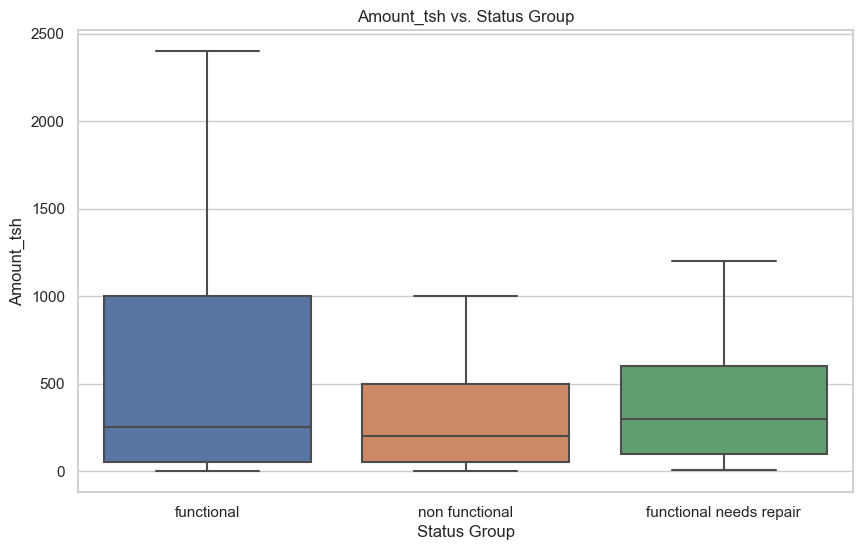

In [17]:
# Merge the 'status_group' column from LABELS with 'amount_tsh' from VALUES
merged_df = VALUES.merge(LABELS[['status_group']], left_index=True, right_index=True)

# Replace zero values with NaN
merged_df['amount_tsh'].replace(0, np.NaN, inplace=True)

# Create a new column to indicate missing values
merged_df['amount_tsh_missing'] = merged_df['amount_tsh'].isnull()

# Plot the relationship between 'amount_tsh' and 'status_group'
plt.figure(figsize=(10, 6))
sns.boxplot(x='status_group', y='amount_tsh', data=merged_df, showfliers=False)
plt.title('Amount_tsh vs. Status Group')
plt.xlabel('Status Group')
plt.ylabel('Amount_tsh')
plt.show()


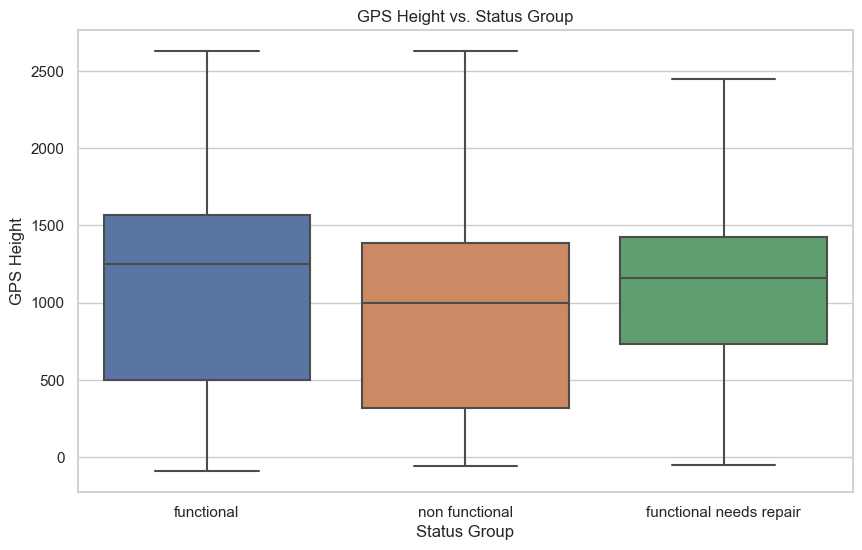

In [18]:
# Merge the 'status_group' column from LABELS with 'gps_height' from VALUES
merged_df = VALUES.merge(LABELS[['status_group']], left_index=True, right_index=True)

# Replace zero values with NaN
merged_df['gps_height'].replace(0, np.NaN, inplace=True)

# Create a new column to indicate missing values
merged_df['gps_height_missing'] = merged_df['gps_height'].isnull()

# Plot the relationship between 'gps_height' and 'status_group'
plt.figure(figsize=(10, 6))
sns.boxplot(x='status_group', y='gps_height', data=merged_df, showfliers=False)
plt.title('GPS Height vs. Status Group')
plt.xlabel('Status Group')
plt.ylabel('GPS Height')
plt.show()


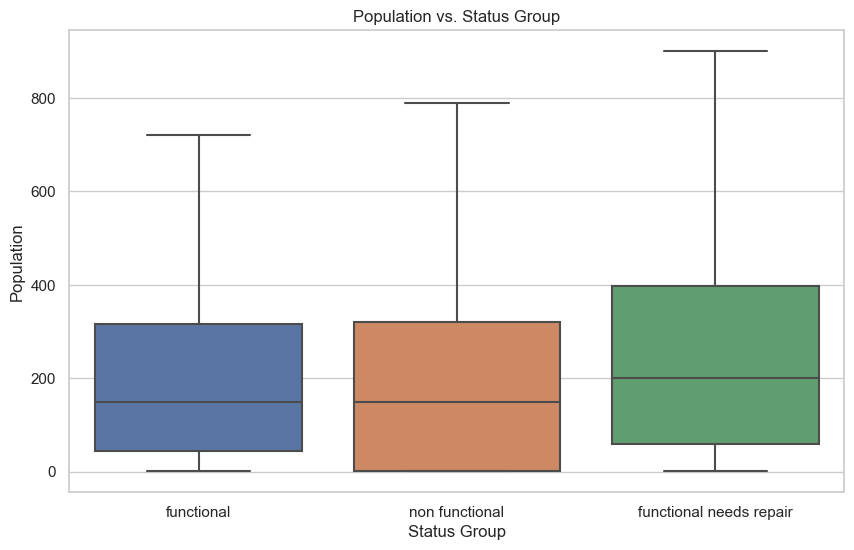

In [19]:

# Merge the 'status_group' column from LABELS with 'population' from VALUES
merged_df = VALUES.merge(LABELS[['status_group']], left_index=True, right_index=True)

# Replace zero values with NaN
merged_df['population'].replace(0, np.NaN, inplace=True)

# Create a new column to indicate missing values
merged_df['population_missing'] = merged_df['population'].isnull()

# Plot the relationship between 'population' and 'status_group'
plt.figure(figsize=(10, 6))
sns.boxplot(x='status_group', y='population', data=merged_df, showfliers=False)
plt.title('Population vs. Status Group')
plt.xlabel('Status Group')
plt.ylabel('Population')
plt.show()


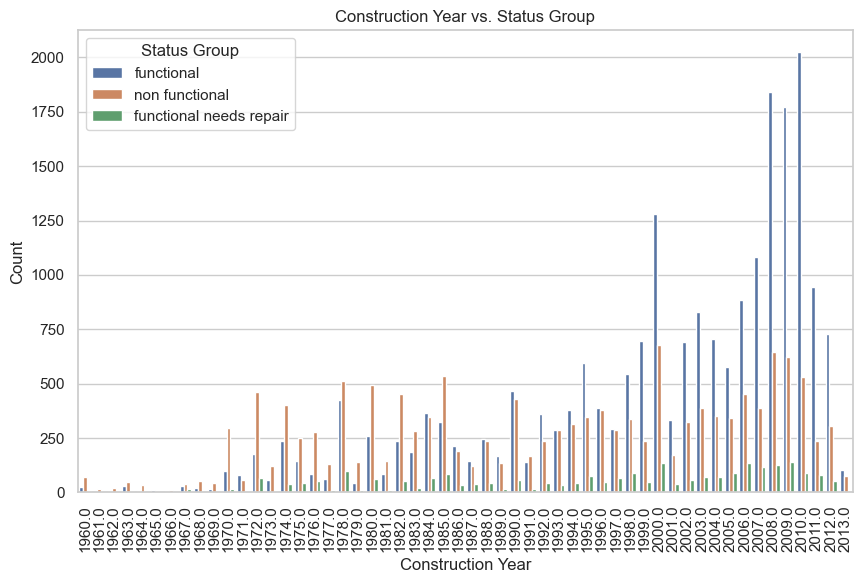

In [20]:

# Merge the 'status_group' column from LABELS with 'construction_year' from VALUES
merged_df = VALUES.merge(LABELS[['status_group']], left_index=True, right_index=True)

# Replace zero values with NaN
merged_df['construction_year'].replace(0, np.NaN, inplace=True)

# Create a new column to indicate missing values
merged_df['construction_year_missing'] = merged_df['construction_year'].isnull()

# Plot the relationship between 'construction_year' and 'status_group'
plt.figure(figsize=(10, 6))
sns.countplot(x='construction_year', hue='status_group', data=merged_df)
plt.title('Construction Year vs. Status Group')
plt.xlabel('Construction Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Status Group')
plt.show()


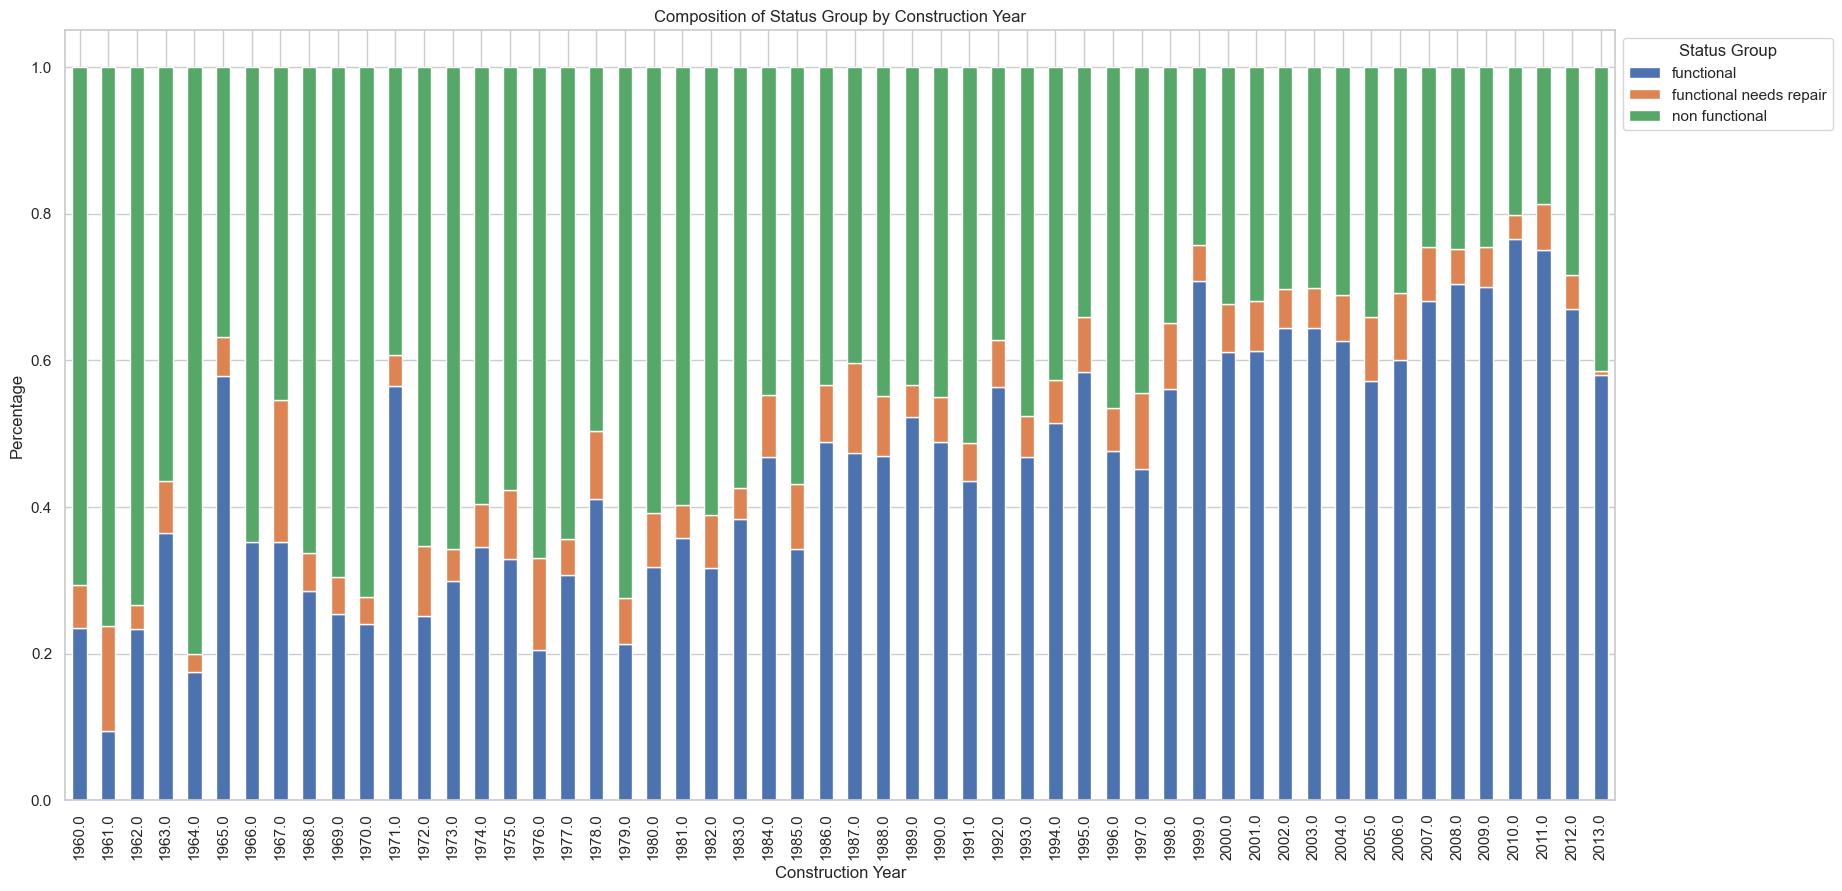

In [21]:

# Merge the 'status_group' column from LABELS with 'construction_year' from VALUES
merged_df = VALUES.merge(LABELS[['status_group']], left_index=True, right_index=True)

# Replace zero values with NaN
merged_df['construction_year'].replace(0, np.NaN, inplace=True)

# Exclude missing values and zeros
filtered_df = merged_df.dropna(subset=['construction_year'])
filtered_df = filtered_df[filtered_df['construction_year'] != 0]

# Calculate the percentage composition of each status group within each construction year
grouped_df = filtered_df.groupby(['construction_year', 'status_group']).size().unstack()
grouped_df = grouped_df.apply(lambda row: row / row.sum(), axis=1)

# Plot the stacked composition of each status group within each construction year
fig, ax = plt.subplots(figsize=(20, 10)) 
grouped_df.plot(kind='bar', stacked=True, ax=ax)
plt.title('Composition of Status Group by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
ax.set_xlim(-0.5, len(grouped_df) - 0.5)  # Adjust the x-axis limits
plt.legend(title='Status Group', bbox_to_anchor=(1, 1), loc='upper left')  # Place the legend outside the plot
plt.show()


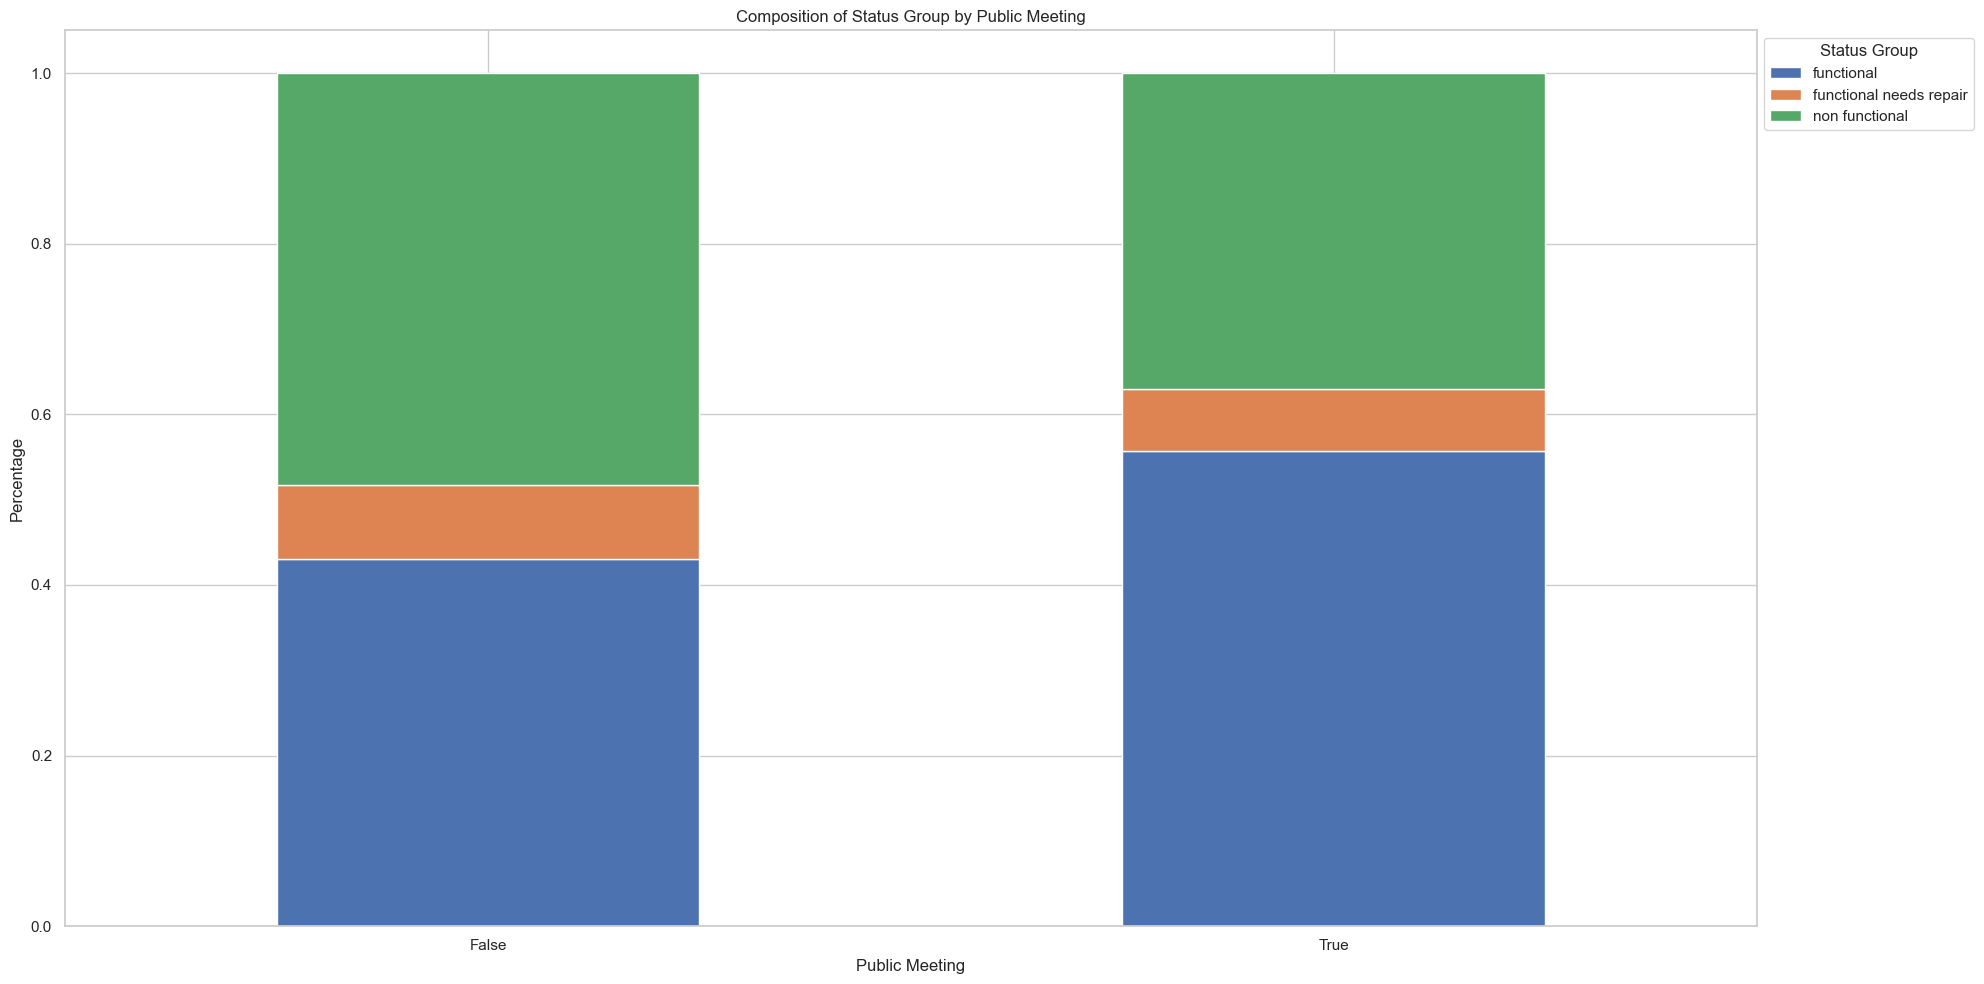

In [22]:
# Merge the 'status_group' column from LABELS with 'public_meeting' from VALUES
merged_df = VALUES.merge(LABELS[['status_group']], left_index=True, right_index=True)

# Exclude missing values
filtered_df = merged_df.dropna(subset=['public_meeting'])

# Calculate the percentage composition of each status group within each public_meeting value
grouped_df = filtered_df.groupby(['public_meeting', 'status_group']).size().unstack()
grouped_df = grouped_df.apply(lambda row: row / row.sum(), axis=1)

# Plot the stacked composition of each status group within each public_meeting value
fig, ax = plt.subplots(figsize=(20, 10))  # Set the figure size here
grouped_df.plot(kind='bar', stacked=True, ax=ax)
plt.title('Composition of Status Group by Public Meeting')
plt.xlabel('Public Meeting')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
ax.set_xticklabels(['False', 'True'])  # Set the x-axis labels
ax.set_xlim(-0.5, len(grouped_df) - 0.5)  # Adjust the x-axis limits
plt.legend(title='Status Group', bbox_to_anchor=(1, 1), loc='upper left')  # Place the legend outside the plot
plt.tight_layout(h_pad=2.5)  # Increase the spacing between the bars
plt.show()


**visualising the relation of these classes with latitude and longitude**<br>
##### _Partner B_ #####

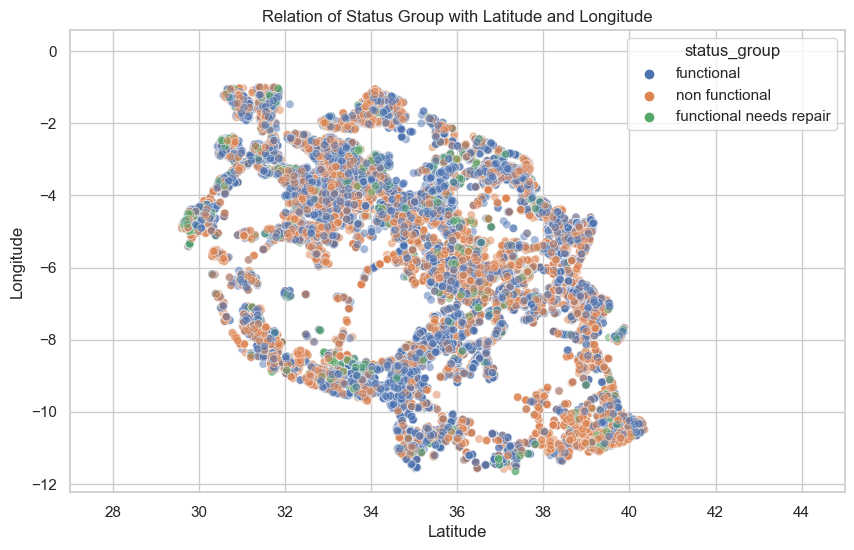

In [23]:
# Merge the 'status_group' column from LABELS with 'public_meeting' from VALUES
df = VALUES.merge(LABELS[['status_group']], left_index=True, right_index=True)

# Remove outliers from latitude and longitude
df_clean = df[(df['latitude'] >= -90) & (df['latitude'] <= 90) & (df['longitude'] >= -180) & (df['longitude'] <= 180)]

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(y='latitude', x='longitude', hue='status_group', alpha=0.5, data=df_clean)
plt.xlim(27, 45)
plt.title('Relation of Status Group with Latitude and Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

### Checking for incorrect data

##### _Both Partners_ #####

check if there are any negative values in 'construction_year'


In [25]:
print("\nNegative values in construction_year:")
print(VALUES[VALUES['construction_year'] < 0])


Negative values in construction_year:
Empty DataFrame
Columns: [id, amount_tsh, date_recorded, funder, gps_height, installer, longitude, latitude, wpt_name, num_private, basin, subvillage, region, region_code, district_code, lga, ward, population, public_meeting, recorded_by, scheme_management, scheme_name, permit, construction_year, extraction_type, extraction_type_group, extraction_type_class, management, management_group, payment, payment_type, water_quality, quality_group, quantity, quantity_group, source, source_type, source_class, waterpoint_type, waterpoint_type_group]
Index: []

[0 rows x 40 columns]


#### Get feature importance scores
##### _Partner A_ #####

In [26]:
# Create a copy of the original dataset
VALUES_encoded = VALUES.copy()

# Encode categorical columns
le = LabelEncoder()
categorical_columns = VALUES_encoded.select_dtypes(include=['object']).columns
for column in categorical_columns:
    VALUES_encoded[column] = le.fit_transform(VALUES_encoded[column].astype(str))

# Impute missing values
numeric_columns = VALUES_encoded.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
VALUES_encoded[numeric_columns] = imputer.fit_transform(VALUES_encoded[numeric_columns])





# Encode target labels
encoded_labels = le.fit_transform(LABELS["status_group"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(VALUES_encoded, encoded_labels, test_size=0.2, random_state=42)

# Fit RandomForest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort features by importance
sorted_idx = importances.argsort()[::-1]

# Create a DataFrame with features and importances
features_importances_df = pd.DataFrame({'Feature': VALUES_encoded.columns[sorted_idx],
                                        'Importance': importances[sorted_idx]})


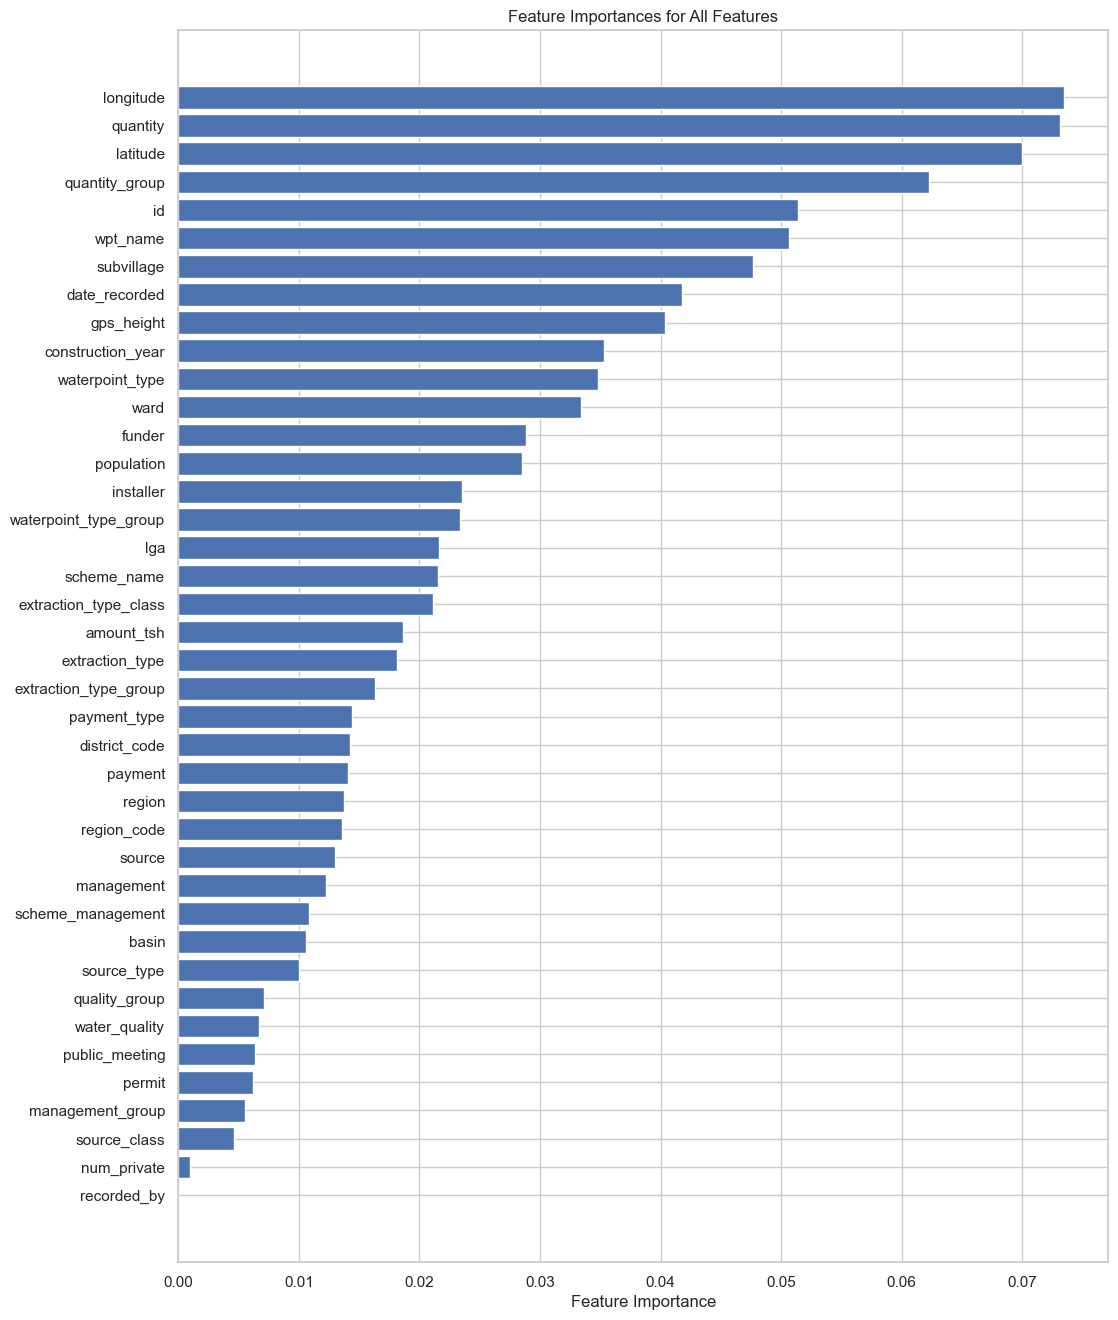

In [27]:
# Plot variable importance chart for all features
plt.figure(figsize=(12, 16))
plt.barh(range(len(features_importances_df)), features_importances_df['Importance'], align='center')
plt.yticks(range(len(features_importances_df)), features_importances_df['Feature'])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for All Features')
plt.gca().invert_yaxis()
plt.show()


In [28]:
features_importances_df

Feature  Importance
0               longitude    0.073456
1                quantity    0.073158
2                latitude    0.069984
3          quantity_group    0.062257
4                      id    0.051352
5                wpt_name    0.050641
6              subvillage    0.047672
7           date_recorded    0.041792
8              gps_height    0.040398
9       construction_year    0.035310
10        waterpoint_type    0.034836
11                   ward    0.033366
12                 funder    0.028799
13             population    0.028467
14              installer    0.023568
15  waterpoint_type_group    0.023383
16                    lga    0.021641
17            scheme_name    0.021532
18  extraction_type_class    0.021115
19             amount_tsh    0.018639
20        extraction_type    0.018103
21  extraction_type_group    0.016289
22           payment_type    0.014398
23          district_code    0.014257
24                payment    0.014078
25                 region    0.013706
26            region_code    0.013558
27                 source    0.013027
28             management    0.012280
29      scheme_management    0.010813
30                  basin    0.010612
31            source_type    0.009981
32          quality_group    0.007069
33          water_quality    0.006696
34         public_meeting    0.006336
35                 permit    0.006210
36       management_group    0.005565
37           source_class    0.004652
38            num_private    0.001004
39            recorded_by    0.000000

In [29]:
summarize(VALUES)

**Look for Duplicates**<br>
##### _Both Partners_ #####

In [30]:
def find_duplicate_rows(df):
    """
    Returns a list of row numbers where duplicate rows are found in a dataframe.
    """
    duplicate_rows = df.duplicated(keep=False)
    if not any(duplicate_rows):
        print("No duplicate rows found")
        return []
    else:
        print(f"{sum(duplicate_rows)} duplicate rows found")
        return list(df.index[duplicate_rows])

In [31]:
duplicate_rows = find_duplicate_rows(VALUES)
print(duplicate_rows)

No duplicate rows found
[]


### Decisions taken after Preliminary EDA
#### Partner A
##### Delete

id: we drop the id column because it is not a useful predictor.

wpt_name: not useful, delete (too many Categories)

scheme_name: not useful, delete (too many Nulls and Categories)

num_private: we will delete this column because ~99% of the values are zeros.

region: very similar to region_code and has less categories.

recorded_by: Only has one category and same values.

payment_type: 1-1 replica of payment


##### Impute

amount_tsh - convert this item into a categorical variable

construction year - impute with mean values of subgroups "funder" and "installer" (create "construction_year_null")

population - impute by mean values of subgroups "region_code" and "subvillage" and "lga" (create "population_null")

gps_height - impute by mean values of subgroups "region_code" and "subvillage" and "lga" (create "gps_height_null")

funder (Null Percentage 6.119529) - get_dummies

installer (Null Percentage 6.153199) - get_dummies

subvillage (Null Percentage 0.624579) - get_dummies

public_meeting (Null Percentage 5.612795) - we will fill the nulls as 'False'

scheme_management (Null Percentage 6.526936) - get_dummies

permit (Null Percentage 5.144781) - we will fill the nulls as 'False'


##### *Duplicates are not present

#### Partner B
"We are excluding the ID column as it does not provide meaningful predictive information."
"The wpt_name column is being removed due to an excessive number of categories."
"Due to a high number of null values and categories, we will be deleting the scheme_name column."
"We are choosing to delete the num_private column because approximately 99% of its values are zeros."
"The region column, which has fewer categories compared to region_code, will be kept as it provides similar information."
"Since the recorded_by column contains only one category and identical values, it will be removed."
"The payment_type column is an exact replica of the payment column and will be excluded."


##### Impute

amount_tsh - convert this item into a categorical variable

construction year - impute with mean values of subgroups "funder" and "installer" ("c_year_null")

population - impute by mean values of subgroups "region_code" and "subvillage" and "lga" ("population_null")

gps_height - impute by mean values of subgroups "region_code" and "subvillage" and "lga" (create "gps_height_null")

funder, installer, subvillage, scheme_management number of nulls won't be sunsituted and will be handled by dummy variables public_meeting, permit  will fill the nulls as 'False'

# 3. Data Processing

**Two Datasets for two Partners**<br>
##### _Partner A - df_CLEAN_A_ #####
##### _Partner B - df_CLEAN_B_ #####

In [245]:
df_CLEAN_A = pd.merge(VALUES, LABELS, on='id')
df_CLEAN_B = pd.merge(VALUES, LABELS, on='id')

#### Drop the columns from the DataFrame
##### _Both Partners_ #####

In [246]:
def drop_columns(df):
    # List of columns to drop
    columns_to_drop = [
        'id',
        'wpt_name',
        'scheme_name',
        'num_private',
        'region',
        'recorded_by',
        'payment_type'
    ]
    
    # Drop the columns from the DataFrame
    df = df.drop(columns_to_drop, axis=1)
    
    return df


In [247]:
df_CLEAN_A = drop_columns(df_CLEAN_A)
df_CLEAN_B = drop_columns(df_CLEAN_B)

In [35]:
summarize(df_CLEAN_A)

In [36]:
summarize(df_CLEAN_B)

#### Checking for highly corelated features
using Cramer V to calculate correlation o features that might be highly related.
##### _Partner A_ #####

In [248]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

feature_groups = [
    ['extraction_type', 'extraction_type_group', 'extraction_type_class'],
    ['management', 'management_group'],
    ['water_quality', 'quality_group'],
    ['quantity', 'quantity_group'],
    ['source', 'source_type', 'source_class'],
    ['waterpoint_type', 'waterpoint_type_group'],
    ['basin','subvillage','region_code','district_code','lga','ward']
]

df_copy = df_CLEAN_A.copy()

for group in feature_groups:
    print(f"Correlations in group: {group}")
    for i, feature1 in enumerate(group):
        for feature2 in group[i+1:]:
            correlation = cramers_v(df_copy[feature1], df_copy[feature2])
            print(f"Correlation between {feature1} and {feature2}: {correlation:.3f}")
    print("\n")

Correlations in group: ['extraction_type', 'extraction_type_group', 'extraction_type_class']
Correlation between extraction_type and extraction_type_group: 1.000
Correlation between extraction_type and extraction_type_class: 1.000
Correlation between extraction_type_group and extraction_type_class: 1.000


Correlations in group: ['management', 'management_group']
Correlation between management and management_group: 1.000


Correlations in group: ['water_quality', 'quality_group']
Correlation between water_quality and quality_group: 1.000


Correlations in group: ['quantity', 'quantity_group']
Correlation between quantity and quantity_group: 1.000


Correlations in group: ['source', 'source_type', 'source_class']
Correlation between source and source_type: 1.000
Correlation between source and source_class: 1.000
Correlation between source_type and source_class: 1.000


Correlations in group: ['waterpoint_type', 'waterpoint_type_group']
Correlation between waterpoint_type and waterpoint_

Based on correlation, Parner A will remove ward, district_code and region_code

Some features that might be highly related are checked using correlation matrix.
##### _Partner B_ #####

In [249]:
# Select the columns representing the features
feature_columns = ['extraction_type', 'extraction_type_group', 'extraction_type_class',
                   'management', 'management_group',
                   'water_quality', 'quality_group',
                   'quantity', 'quantity_group',
                   'source', 'source_type', 'source_class',
                   'waterpoint_type', 'waterpoint_type_group',
                   'basin', 'subvillage', 'region_code', 'district_code', 'lga', 'ward']

# Create a subset of the dataframe with only the feature columns
df_features = df_CLEAN_B[feature_columns]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical features using label encoding
for col in df_features.columns:
    if df_features[col].dtype == 'object':
        df_features[col] = label_encoder.fit_transform(df_features[col].astype(str))

# Calculate the correlation matrix
correlation_matrix = df_features.corr()

print("Correlation Matrix:")
print(correlation_matrix)

C:\Users\nkagg\AppData\Local\Temp\ipykernel_4100\1554130088.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col] = label_encoder.fit_transform(df_features[col].astype(str))


Correlation Matrix:
                       extraction_type  extraction_type_group  \
extraction_type               1.000000               0.949524   
extraction_type_group         0.949524               1.000000   
extraction_type_class         0.695052               0.784300   
management                    0.038262               0.019687   
management_group             -0.037540              -0.073537   
water_quality                -0.109225              -0.110203   
quality_group                 0.158023               0.157439   
quantity                      0.001082              -0.011712   
quantity_group                0.001082              -0.011712   
source                       -0.327352              -0.361300   
source_type                  -0.349526              -0.367032   
source_class                 -0.229795              -0.175148   
waterpoint_type               0.344785               0.320202   
waterpoint_type_group         0.306034               0.281591   
basin

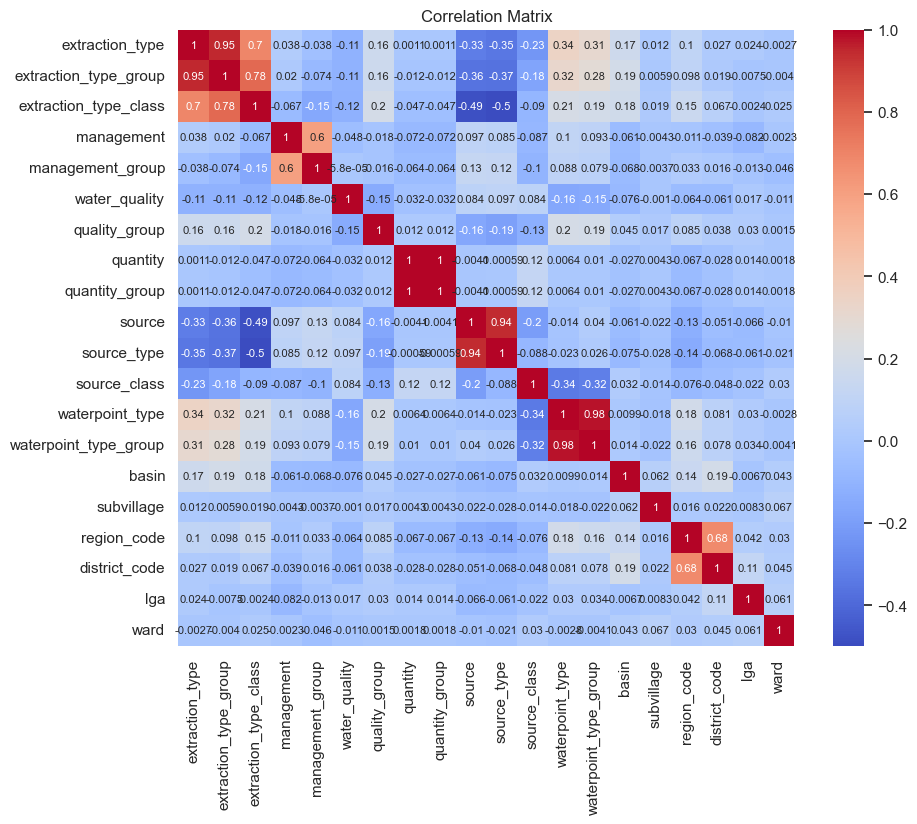

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, annot_kws={'fontsize': 8})
plt.title('Correlation Matrix')
plt.show()

#### Dropping the correlated features
##### _Both Partners_ #####

In [250]:
def drop_correlated_features(df):
    columns_to_drop = [
        'extraction_type_group',
        'extraction_type_class',
        'management_group',
        'quality_group',
        'quantity_group',
        'source_type',
        'source_class',
        'waterpoint_type_group'
    ]

    df = df.drop(columns=columns_to_drop)
    return df

In [251]:
df_CLEAN_A = drop_correlated_features(df_CLEAN_A)
df_CLEAN_B = drop_correlated_features(df_CLEAN_B)

In [91]:
summarize(df_CLEAN)

In [47]:
summarize(df_CLEAN_B)

#### Handling amount_tsh
##### _Partner A_ #####

In [252]:
def amount_tsh_handling(df):
    # Create a binary feature for zero amount_tsh values
    for dataset in [df]:
        dataset['zero_amount_tsh'] = (dataset['amount_tsh'] == 0).astype(int)

    # Impute zeros with median values based on the 'region_code' feature
    for dataset in [df]:
        dataset['amount_tsh'].replace(0., np.NaN, inplace=True)
        data = df.groupby('region_code')['amount_tsh']
        dataset['amount_tsh'] = data.transform(lambda x: x.fillna(x.median()))
        dataset['amount_tsh'].fillna(df['amount_tsh'].median(), inplace=True)

    # Apply a log transformation
    for dataset in [df]:
        dataset['log_amount_tsh'] = np.log(dataset['amount_tsh'] + 1)

    # Bin the log_amount_tsh feature into 4 categories
    for dataset in [df]:
        dataset['log_amount_tsh_cat'] = pd.cut(dataset['log_amount_tsh'], bins=4, labels=False)

    return df




In [253]:
# Apply the amount_tsh_handling function
df_CLEAN_A = amount_tsh_handling(df_CLEAN_A)
df_CLEAN_B = df_CLEAN_B.drop('amount_tsh', axis=1)

C:\Users\nkagg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\nkagg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\nkagg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\nkagg\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [254]:
summarize(df_CLEAN_A)

In [255]:
summarize(df_CLEAN_B)

### Handling construction Year
##### _Partner A_ #####

In [256]:
def construction(df):
    """
    construction_year has 35% nulls, so we impute the nulls with the column mean
    """
    # Create a binary feature for zero construction_year values
    df['construction_year_zero'] = (df['construction_year'] == 0).astype(int)

    df['construction_year'].replace(0., np.NaN, inplace=True)
    
    # Impute missing values based on the combination of 'funder' and 'installer'
    data = df.groupby(['funder', 'installer'])['construction_year']
    df['construction_year'] = data.transform(lambda x: x.fillna(x.mean()))
    
    # Impute remaining missing values based on 'funder' and 'installer' individually
    data = df.groupby(['funder'])['construction_year']
    df['construction_year'] = data.transform(lambda x: x.fillna(x.mean()))
    data = df.groupby(['installer'])['construction_year']
    df['construction_year'] = data.transform(lambda x: x.fillna(x.mean()))
    
    # Fill any remaining missing values with the overall mean of the construction_year feature
    df['construction_year'].fillna(df['construction_year'].mean(), inplace=True)
    
    return df

In [257]:
# Apply the construction function
df_CLEAN_A = construction(df_CLEAN_A)

In [258]:
summarize(df_CLEAN_A)

### Handling construction Year
##### _Partner B_ #####

Parner B also used a similar approach.

In [259]:
def construction_handling(df):
    # Create a binary feature for zero construction_year values
    df['construction_year_zero'] = np.where(df['construction_year'] == 0, 1, 0)

    df['construction_year'].replace(0., np.NaN, inplace=True)
        
    # Impute remaining missing values based on 'funder' and 'installer' individually
    df['construction_year'] = df.groupby(['funder'])['construction_year'].transform(lambda x: x.fillna(x.mean()))
    df['construction_year'] = df.groupby(['installer'])['construction_year'].transform(lambda x: x.fillna(x.mean()))
    
    # Fill any remaining missing values with the overall mean of the construction_year feature
    df['construction_year'].fillna(df['construction_year'].mean(), inplace=True)
    
    return df

In [260]:
# Apply the construction function
df_CLEAN_B = construction_handling(df_CLEAN_B)

In [261]:
summarize(df_CLEAN_B)

#### Convert construction_year and date_recoded to datetime format


##### _Partner A_ #####

In [262]:
def convert_to_datetime_A(df):
    # Convert date_recorded to datetime
    df['date_recorded'] = pd.to_datetime(df['date_recorded'])

    # Convert construction_year to datetime
    # Since construction_year is only a year, we can set the month and day as the first month and first day of that year
    df['construction_year'] = pd.to_datetime(df['construction_year'], format='%Y', errors='coerce')

    return df

##### _Partner B_ #####

In [375]:
def convert_to_datetime_B(df):
    # Convert date_recorded to datetime
    df['date_recorded'] = pd.to_datetime(df['date_recorded'])

    # Convert construction_year to datetime
    df['construction_year'] = pd.to_datetime(df['construction_year'], format='%Y', errors='coerce').dt.year

    return df

In [376]:
df_CLEAN_A = convert_to_datetime_A(df_CLEAN_A)
df_CLEAN_B = convert_to_datetime_B(df_CLEAN_B)

In [94]:
summarize(df_CLEAN_A)

In [95]:
summarize(df_CLEAN_B)

#### Handling 'permit' and 'public_meeting'

##### _Partner A_ #####

In [265]:
def handling_permit_public_meeting(df):
    # Create binary columns for permit_null and public_meeting_null based on if the values are null or not
    df['permit_null'] = df['permit'].isnull().astype(int)
    df['public_meeting_null'] = df['public_meeting'].isnull().astype(int)

    # Fill null values with 'False' for public_meeting and permit columns
    df['public_meeting'].fillna(False, inplace=True)
    df['permit'].fillna(False, inplace=True)

    # Convert public_meeting and permit columns to float datatype
    df['public_meeting'] = df['public_meeting'].astype(float)
    df['permit'] = df['permit'].astype(float)

    return df


In [266]:
df_CLEAN_A = handling_permit_public_meeting(df_CLEAN_A)

In [98]:
summarize(df_CLEAN_A)

##### _Partner B_ #####

In [267]:
def permit_public_meeting(df):
    # Create binary columns for permit_null and public_meeting_null based on if the values are null or not
    df['permit_null'] = df['permit'].isnull().astype(int)
    df['public_meeting_null'] = df['public_meeting'].isnull().astype(int)

    # Fill null values with 'False' for public_meeting and permit columns
    df['public_meeting'] = df['public_meeting'].fillna(False).astype(float)
    df['permit'] = df['permit'].fillna(False).astype(float)

    return df

In [268]:
df_CLEAN_B = permit_public_meeting(df_CLEAN_B)

In [101]:
summarize(df_CLEAN_B)

#### Impute Geographical Data

##### _Partner A_ #####

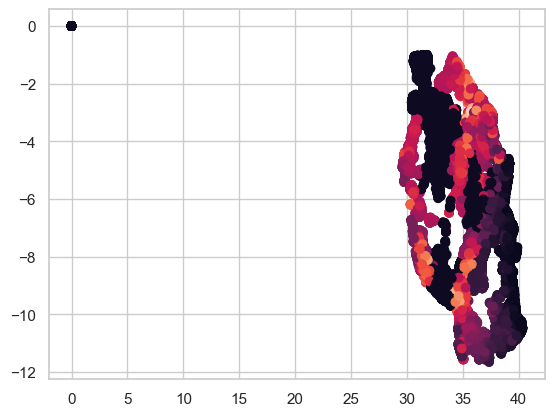

In [103]:
plt.scatter(df_CLEAN_A['longitude'], df_CLEAN_A['latitude'], c=df_CLEAN_A['gps_height'])

Checking for zero means in the subgroups

In [104]:
check_cols = ['subvillage', 'district_code', 'basin']
df = df_CLEAN_A.copy()
for col in check_cols:
    all_zero_or_nan_groups = df[df[col].isin(df.groupby(col).filter(lambda x: x['latitude'].mean() == 0 or x['latitude'].isna().all()).index.unique())][col].unique()
    if len(all_zero_or_nan_groups) > 0:
        print(f"There are {len(all_zero_or_nan_groups)} groups in '{col}' where all 'latitude' values are zero or NaN.")
    else:
        print(f"There are no groups in '{col}' where all 'latitude' values are zero or NaN.")


There are no groups in 'subvillage' where all 'latitude' values are zero or NaN.
There are no groups in 'district_code' where all 'latitude' values are zero or NaN.
There are no groups in 'basin' where all 'latitude' values are zero or NaN.


In [105]:
group_cols = ['subvillage', 'district_code', 'basin']
value_cols = ['longitude', 'latitude', 'gps_height', 'population']

for group_col in group_cols:
    print(f"Mean values for group: {group_col}")
    print(df.groupby(group_col)[value_cols].mean())
    print("\n")


Mean values for group: subvillage
                   longitude      latitude   gps_height   population
subvillage                                                          
##                 31.460087 -1.553813e+00     0.000000     0.000000
'A' Kati           33.730739 -1.903902e+00  1281.000000   250.000000
1                  32.988524 -2.454906e+00   242.287879   169.545455
14Kambalage         0.000000 -2.000000e-08     0.000000     0.000000
18                 32.134800 -4.582413e+00     0.000000     0.000000
...                      ...           ...          ...          ...
Zumbawanu Shuleni  36.510212 -6.953036e+00     0.000000     0.000000
Zunga              38.366623 -6.346883e+00   246.000000   100.000000
Zunguni            38.837185 -7.144544e+00   278.000000  1000.000000
Zunzuli            32.836451 -3.323432e+00     0.000000     0.000000
Zuri               33.133778 -2.524006e+00     0.000000     0.000000

[19287 rows x 4 columns]


Mean values for group: district_code
    

#### Imputing Location data
##### _Partner A_ #####

In [269]:
def create_imputed_locs_cols(df):
    trans = ['longitude', 'latitude', 'gps_height', 'population']
    
    for feature in trans:
        # Create new binary columns
        df[feature + '_imputed'] = df[feature].apply(lambda x: 1 if x == 0 or x == 1 else 0)

        # Mark near-zero outliers for latitude
        if feature == 'latitude':
            df[feature + '_imputed'] = df[feature].apply(lambda x: 1 if (x > -0.1) & (x < 0.1) or x == 0 or x == 1 else 0)
    return df


def impute_locs(df):
    trans = ['longitude', 'latitude', 'gps_height', 'population']
    group_cols = ['subvillage', 'district_code', 'basin']

    for feature in trans:
        # Replace 0 and 1 with NaN
        df[feature].replace([0., 1.], np.NaN, inplace=True)

        # Replace near-zero outliers with NaN (for latitude)
        if feature == 'latitude':
            df[feature] = df[feature].mask((df[feature] > -0.1) & (df[feature] < 0.1))

        # Iteratively fill NaN values based on group means
        for group in group_cols:
            # Fill NaN values with group mean
            df[feature] = df[feature].fillna(df.groupby(group)[feature].transform('mean'))

        # If there still exist null values, fill with overall mean
        df[feature] = df[feature].fillna(df[feature].mean())
        
        # If there are negetive values, convert to positive
        if feature in ['gps_height', 'population']:
            df[feature] = df[feature].abs()


    return df


In [270]:
df_CLEAN_A = create_imputed_locs_cols(df_CLEAN_A)
df_CLEAN_A = impute_locs(df_CLEAN_A)

In [149]:
df_CLEAN_A[['longitude', 'latitude', 'gps_height', 'population']].describe()

longitude      latitude    gps_height    population
count  59400.000000  59400.000000  59400.000000  59400.000000
mean      35.139442     -5.862013   1033.706774    357.555156
std        2.574436      2.778596    513.615635    474.732942
min       29.607122    -11.649440      0.142857      2.000000
25%       33.328009     -8.545316    779.000000    180.000000
50%       35.012392     -5.246465   1066.245285    300.000000
75%       37.180460     -3.382557   1362.000000    400.000000
max       40.345193     -0.998464   2770.000000  30500.000000

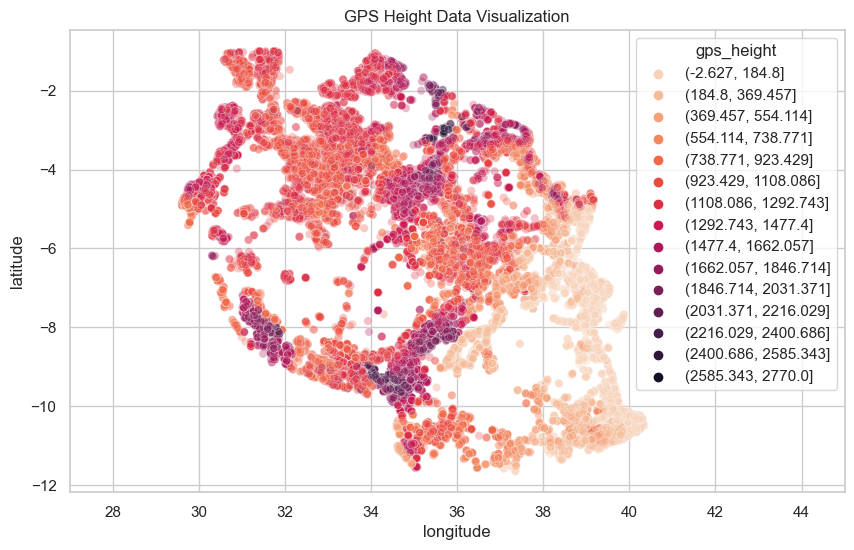

In [181]:
# Create a scatter plot for gps_height
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue=pd.cut(df_CLEAN_A['gps_height'], bins=15), palette='rocket_r', alpha=0.3, data=df_CLEAN_A) 
plt.title('GPS Height Data Visualization') 
plt.xlim(27, 45) # Set x-axis limits 
plt.show()

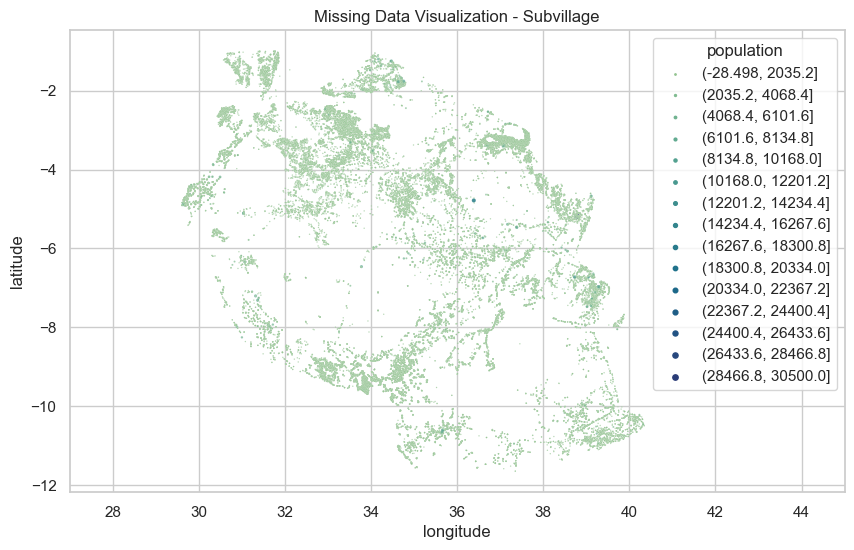

In [178]:
# Create a scatter plot for population
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue=pd.cut(df_CLEAN_A['population'], bins=15), size=pd.cut(df_CLEAN_A['population'], bins=15),  sizes=list((range(1, 16))), palette='crest', alpha=0.7, data=df_CLEAN_A) 
plt.title('Missing Data Visualization - Subvillage') 
plt.xlim(27, 45) # Set x-axis limits 
plt.show()

In [182]:
summarize(df_CLEAN_A)

##### _Partner B_ #####

In [271]:
def impute_locations(df):
    features = ['longitude', 'latitude', 'gps_height', 'population']
    group_cols = ['subvillage', 'district_code', 'basin']

    for feature in features:
        # Replace 0 and 1 with NaN
        df[feature].replace([0., 1.], np.NaN, inplace=True)

        # Set near-zero latitudes to NaN
        if feature == 'latitude':
            df.loc[df['latitude'].abs() < 1e-5, 'latitude'] = np.NaN

        # Iteratively fill NaN values based on group means
        for group in group_cols:
            df[feature] = df[feature].fillna(df.groupby(group)[feature].transform('mean'))

        # Fill any remaining null values with the overall mean
        df[feature].fillna(df[feature].mean(), inplace=True)
        
        # Convert negative values to positive
        if feature in ['gps_height', 'population']:
            df[feature] = df[feature].abs()

    return df


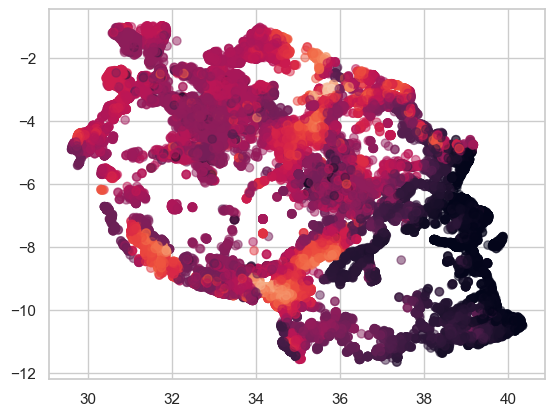

In [272]:
df_CLEAN_B = impute_locations(df_CLEAN_B)
plt.scatter(df_CLEAN_B['longitude'], df_CLEAN_B['latitude'], c=df_CLEAN_B['gps_height'], alpha=0.5)

In [188]:
summarize(df_CLEAN_B)

### Function to convert region_code and district_code to string objects

##### _Both Partners_ #####

In [273]:
def convert_codes_to_string(df):
    df['region_code'] = df['region_code'].astype(str)
    df['district_code'] = df['district_code'].astype(str)
    return df


In [274]:
df_CLEAN_A = convert_codes_to_string(df_CLEAN_A)
df_CLEAN_B = convert_codes_to_string(df_CLEAN_B)

In [191]:
summarize(df_CLEAN_A)

In [192]:
summarize(df_CLEAN_A)

At this stage we have two dataframes for both partners. 
df_CLEAN_A and df_CLEAN_B
Now we will compare these models for accuracy, precesion, recall, f1 and other scores under Random Forest Model.

In [236]:
def compare_data(df1, df2, n):
    print("Comparison Results:")
    print("--------------------")
    print("Dataset 1:")
    evaluate_data(df1, n)
    print("Dataset 2:")
    evaluate_data(df2, n)

In [244]:
def evaluate_data(df, n = 200):
    # Create a copy of the original dataset
    VALUES_encoded = df.copy().drop(["status_group"], axis=1)

    # Encode categorical columns
    le = LabelEncoder()
    categorical_columns = VALUES_encoded.select_dtypes(include=['object','datetime']).columns
    for column in categorical_columns:
        VALUES_encoded[column] = le.fit_transform(VALUES_encoded[column].astype(str))

    # Impute missing values
    numeric_columns = VALUES_encoded.select_dtypes(include=['float64', 'int64']).columns
    imputer = SimpleImputer(strategy='median')
    VALUES_encoded[numeric_columns] = imputer.fit_transform(VALUES_encoded[numeric_columns])

    # Encode target labels
    encoded_labels = le.fit_transform(df.copy()["status_group"])

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(VALUES_encoded, encoded_labels, test_size=0.2, random_state=42)

    # Fit RandomForest model
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    # Get feature importances
    importances = rf.feature_importances_

    # Sort features by importance
    sorted_idx = importances.argsort()[::-1]

    # Create a DataFrame with features and importances
    features_importances_df = pd.DataFrame({'Feature': VALUES_encoded.columns[sorted_idx],
                                            'Importance': importances[sorted_idx]})

    # Predict on the test set
    y_pred = rf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')

    # Print evaluation metrics
    print("Evaluation Metrics on Test Set:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"AUC: {auc}")
    
    # Plot variable importance chart for all features
    plt.figure(figsize=(12, 16))
    plt.barh(range(len(features_importances_df)), features_importances_df['Importance'], align='center')
    plt.yticks(range(len(features_importances_df)), features_importances_df['Feature'])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importances for All Features')
    plt.gca().invert_yaxis()
    plt.show()

Comparison Results:
--------------------
Dataset 1:
Evaluation Metrics on Test Set:
Accuracy: 0.8071548821548822
Precision: 0.8006589359161063
Recall: 0.8071548821548822
F1-score: 0.8008014745865777
AUC: 0.8981796300495898


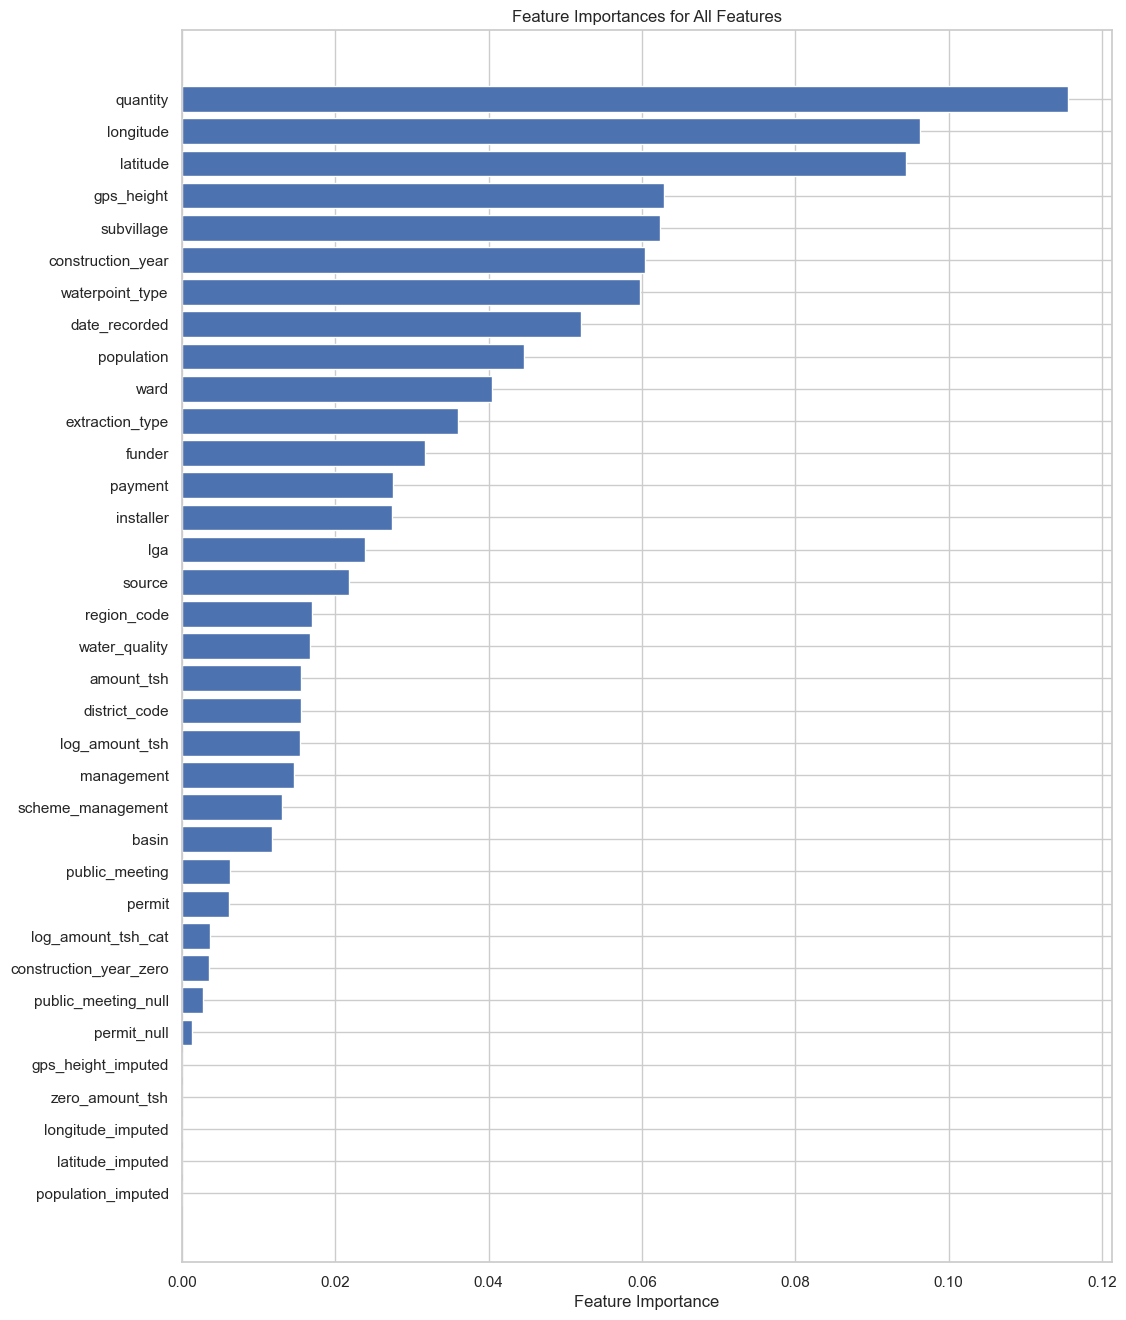

Dataset 2:
Evaluation Metrics on Test Set:
Accuracy: 0.806986531986532
Precision: 0.8001968456825033
Recall: 0.806986531986532
F1-score: 0.8002291065667193
AUC: 0.897639182126976


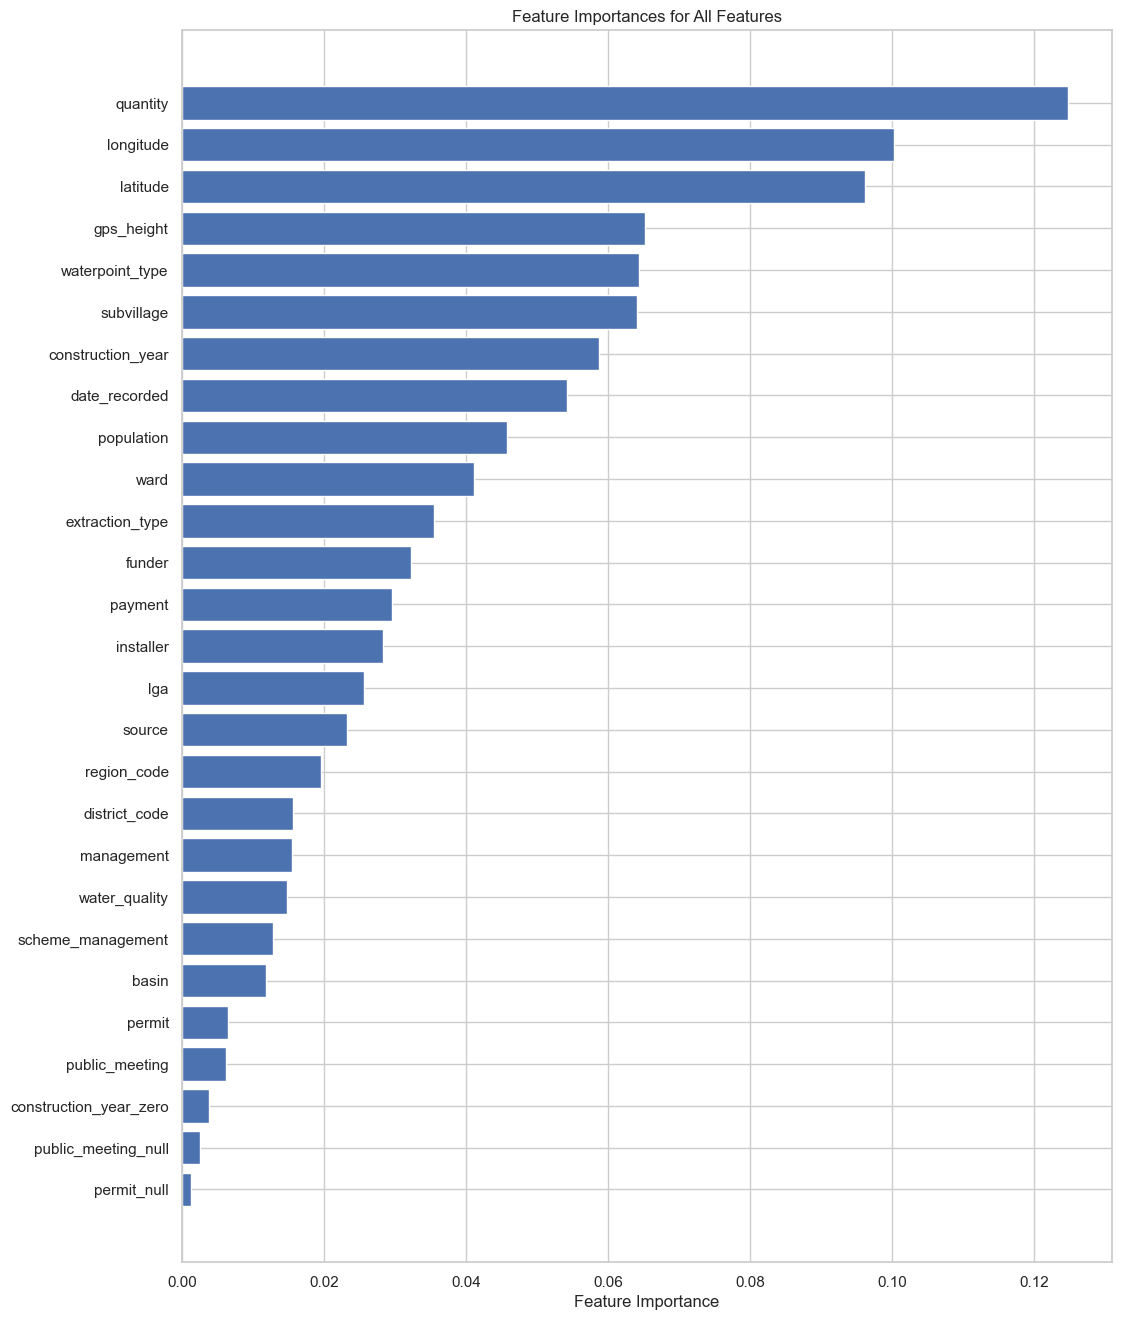

In [231]:
compare_data(df_CLEAN_A.copy(), df_CLEAN_B.copy(), 200)

Comparison Results:
--------------------
Dataset 1:
Evaluation Metrics on Test Set:
Accuracy: 0.8068181818181818
Precision: 0.8000063734284519
Recall: 0.8068181818181818
F1-score: 0.8002424482119935
AUC: 0.8964317130138194


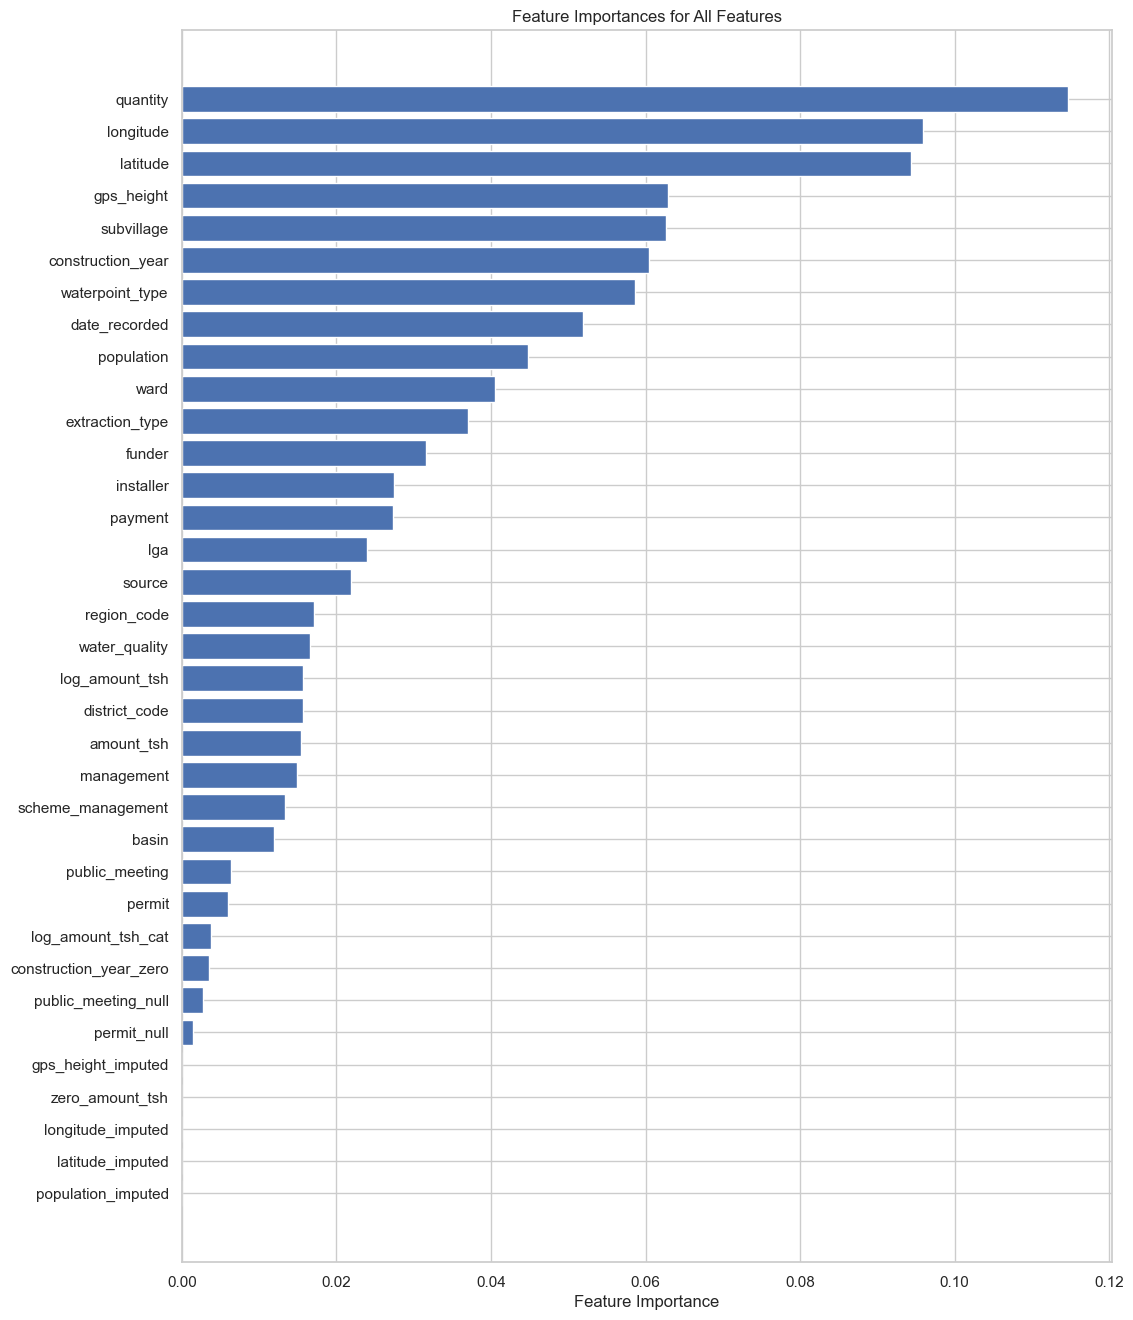

Dataset 2:
Evaluation Metrics on Test Set:
Accuracy: 0.8088383838383838
Precision: 0.8022974135808781
Recall: 0.8088383838383838
F1-score: 0.8022128927625565
AUC: 0.8957057059943541


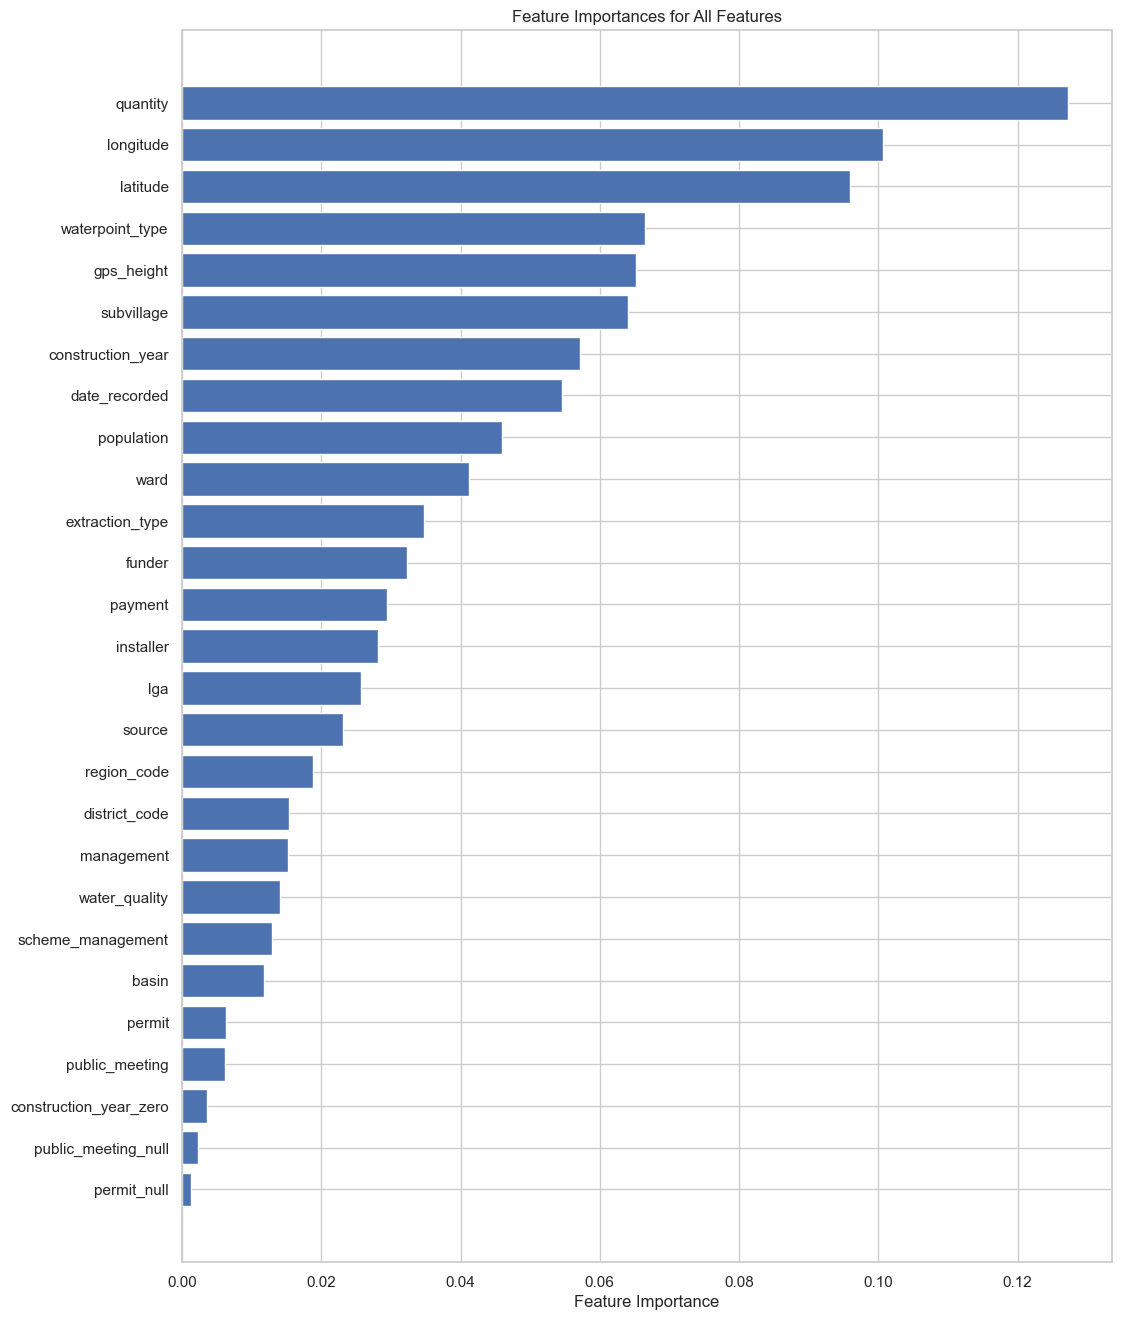

In [238]:
compare_data(df_CLEAN_A, df_CLEAN_B, 100)

Comparison Results:
--------------------
Dataset 1:
Evaluation Metrics on Test Set:
Accuracy: 0.8078282828282828
Precision: 0.8013608977914017
Recall: 0.8078282828282828
F1-score: 0.8015016277338777
AUC: 0.8995992809231099


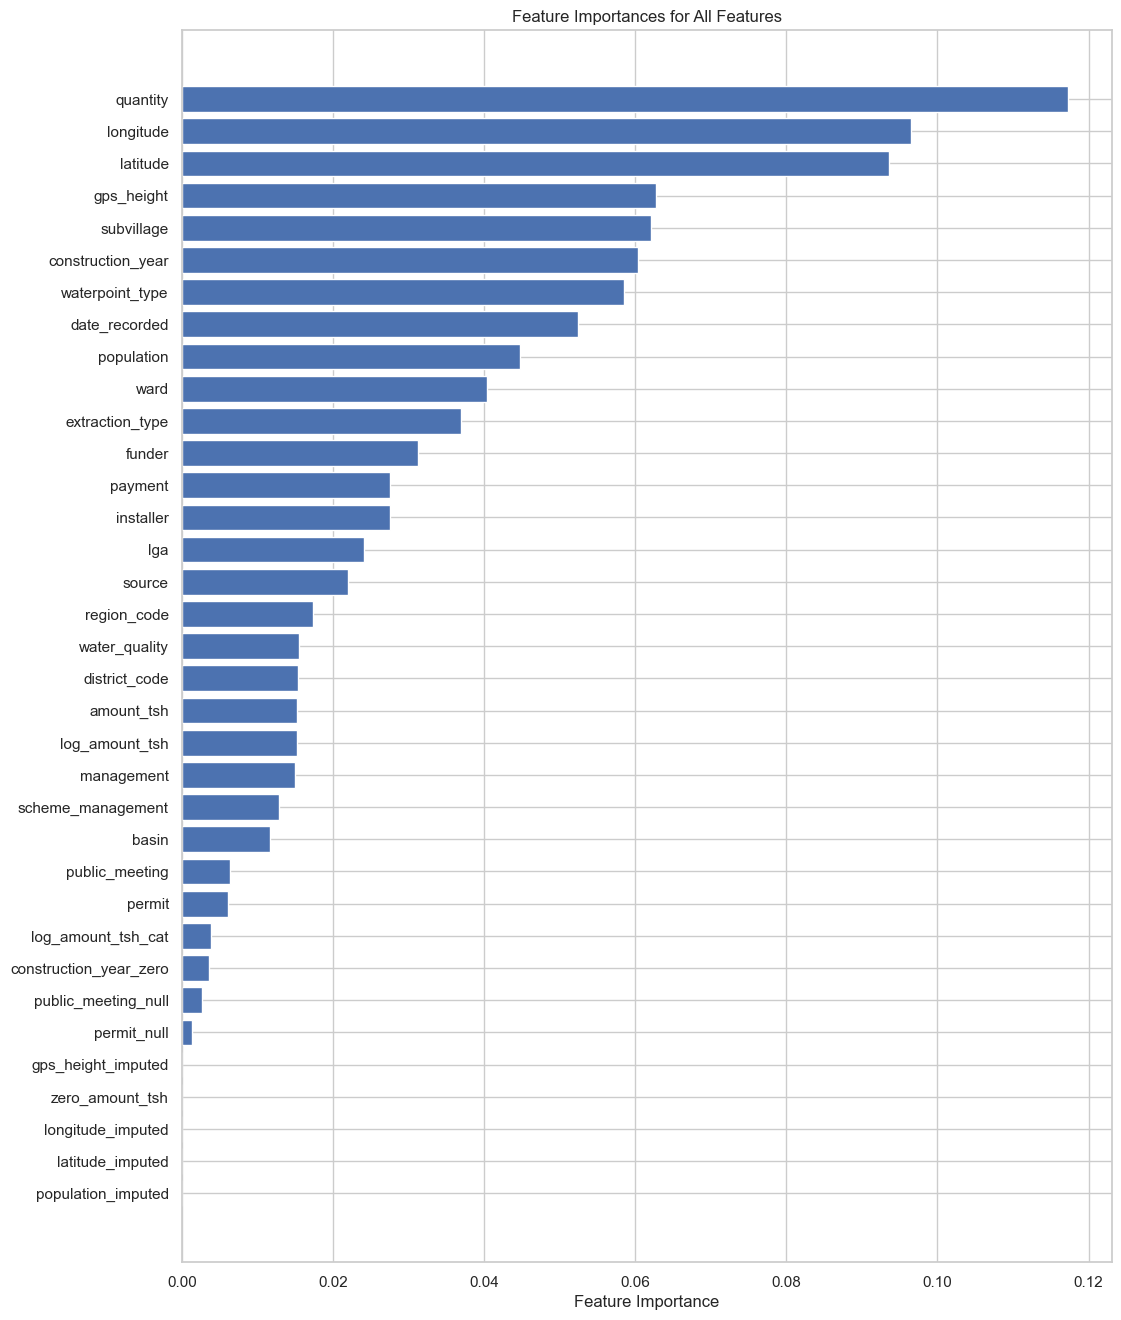

Dataset 2:
Evaluation Metrics on Test Set:
Accuracy: 0.8089225589225589
Precision: 0.8024056172519786
Recall: 0.8089225589225589
F1-score: 0.8023967558250492
AUC: 0.8997294208816835


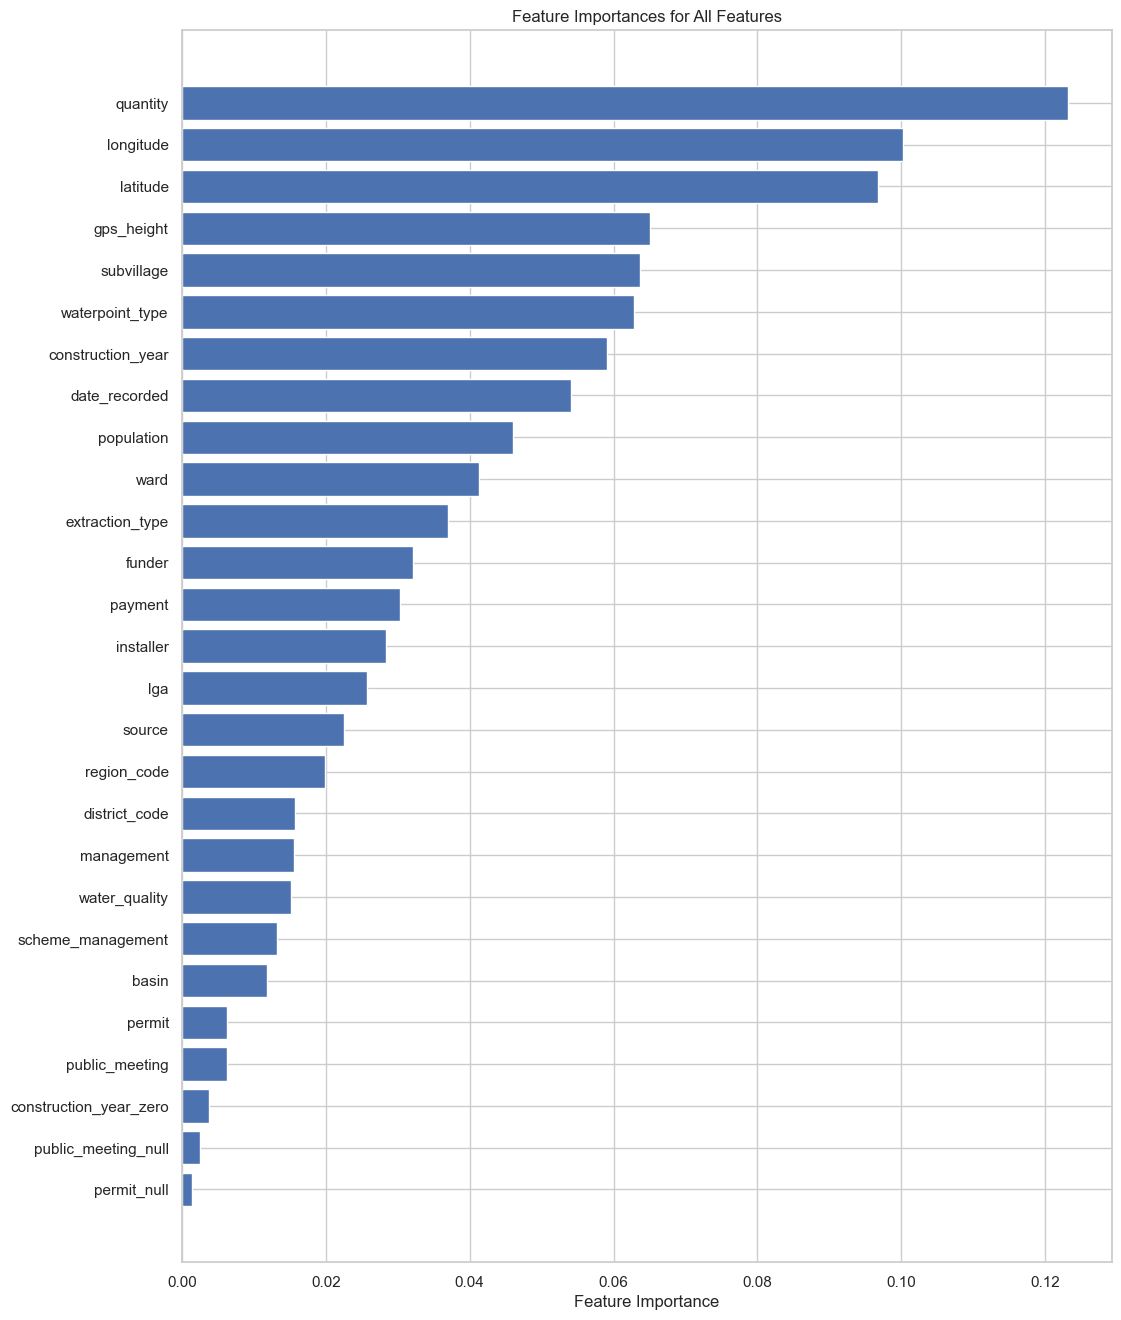

In [239]:
compare_data(df_CLEAN_A, df_CLEAN_B, 1000)

After a thorough comparison, we cunclude following:
1. There is no significant effect of binary columns created during imputation, these can be removed for reducing dimensionality.
2. amount_tsh is not very significant.

### Decesions taken after Data Processing
Because the differences in scores are not very significant, both partners will continue with both the datasets for Feature Engineering and Moddeling steps.

In [241]:
# Drop dataframes unneccessary for next steps.
del df

## Feature Engineering

Loading the Cleaned data for Further processing

In [345]:
df_PRO_A = df_CLEAN_A

We will look at one partner at a time.
##### _Partner A_ #####
Handling the dates features and engineering a new feature age_years.

In [346]:
# Find rows where 'date_recorded' is less than 'construction_year'
df_invalid = df_PRO_A[df_PRO_A['date_recorded'] < df_PRO_A['construction_year']]

print(df_invalid[['date_recorded','construction_year']])


      date_recorded construction_year
802      2011-08-07        2012-01-01
1444     2011-08-07        2012-01-01
8729     2004-05-01        2008-01-01
10441    2004-12-01        2006-01-01
11926    2011-07-12        2012-01-01
13366    2004-06-01        2011-01-01
14108    2011-08-14        2012-01-01
14258    2011-08-23        2012-01-01
16937    2012-10-04        2013-01-01
19264    2011-08-23        2012-01-01
23165    2011-08-07        2012-01-01
23221    2011-07-18        2012-01-01
23373    2004-03-01        2009-01-01
26086    2004-12-01        2007-01-01
26263    2011-08-14        2012-01-01
27501    2004-01-07        2009-01-01
28771    2011-08-02        2012-01-01
30319    2004-12-01        2006-01-01
32619    2004-03-01        2005-01-01
32800    2011-08-23        2012-01-01
33942    2004-03-01        2007-01-01
37595    2011-07-12        2012-01-01
39034    2011-07-11        2012-01-01
39484    2011-07-11        2012-01-01
39559    2004-03-06        2009-01-01
40616    201

In [347]:
def remove_invalid_dates(df):
    # Get the indices of the rows where 'date_recorded' is less than 'construction_year'
    invalid_rows = df[df['date_recorded'] < df['construction_year']].index

    # Drop these rows from the dataframe
    df = df.drop(invalid_rows)

    return df


In [348]:
df_PRO_A = remove_invalid_dates(df_PRO_A)

In [349]:
# Check rows where 'date_recorded' is less than 'construction_year'
df_invalid = df_PRO_A[df_PRO_A['date_recorded'] < df_PRO_A['construction_year']]

print(df_invalid[['date_recorded','construction_year']])


Empty DataFrame
Columns: [date_recorded, construction_year]
Index: []


In [350]:
def calculate_age(df):
    # Create 'age_years' column as difference between 'date_recorded' and 'construction_year' in years
    df['age_years'] = (df['date_recorded'] - df['construction_year']).dt.days / 365.25

    # Drop the 'date_recorded' and 'construction_year' columns
    df = df.drop(columns=['date_recorded', 'construction_year'])

    return df


In [351]:
df_PRO_A = calculate_age(df_PRO_A)

In [352]:
summarize(df_PRO_A)

C:\Users\nkagg\AppData\Local\Temp\ipykernel_4100\416250148.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_PRO_A[col].dropna(), fit=norm, kde=False)


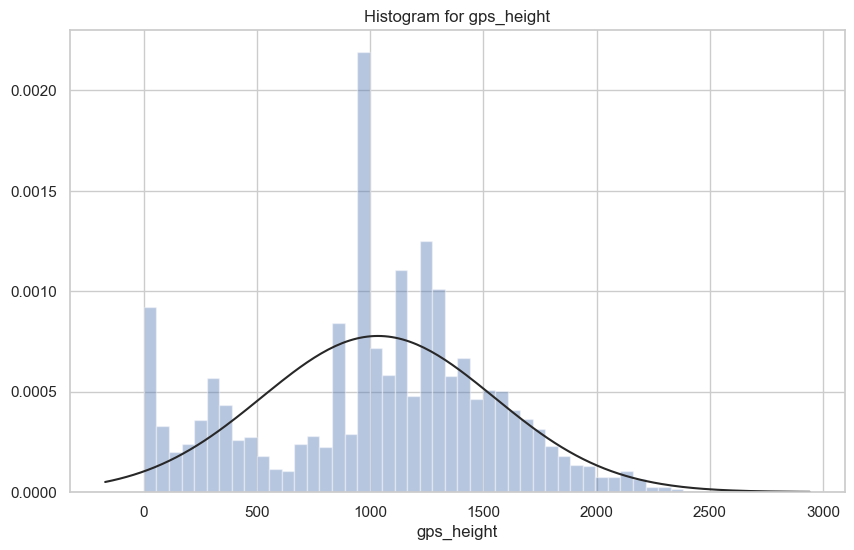

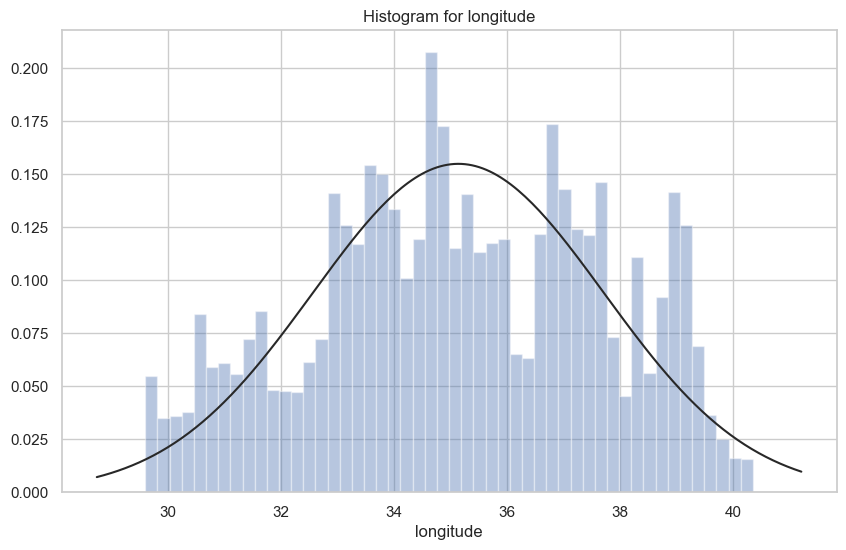

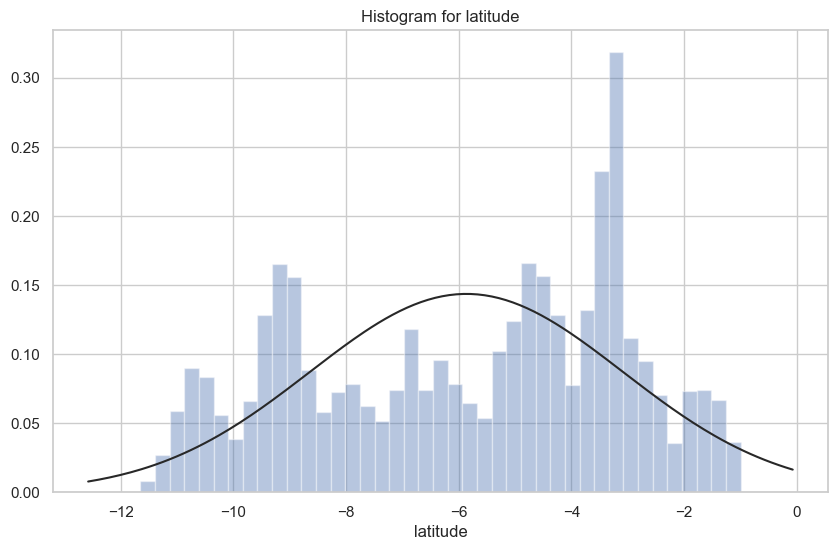

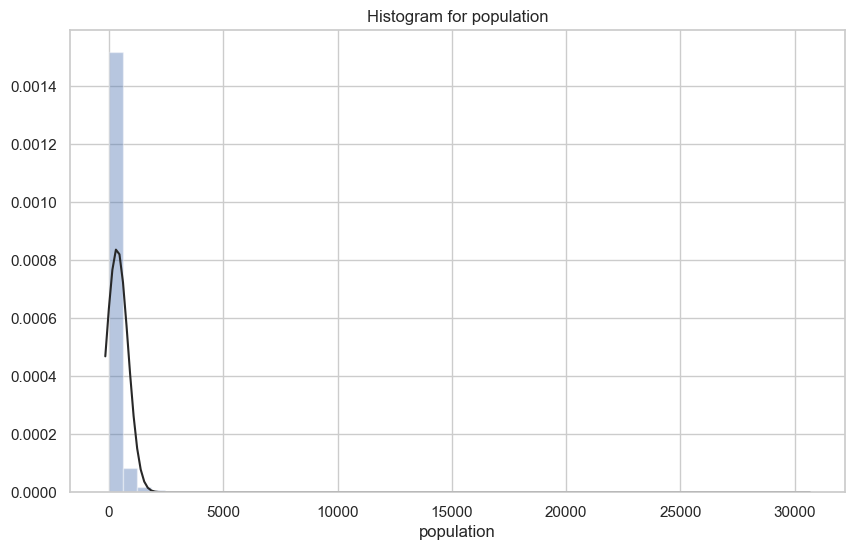

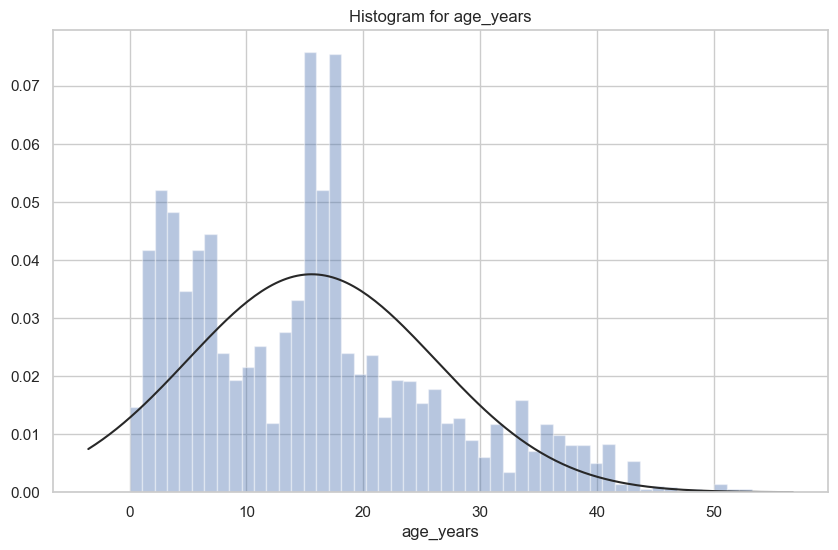

In [353]:
columns = ['gps_height', 'longitude', 'latitude', 'population', 'age_years']

for col in columns:
    plt.figure(figsize=(10, 6))
    sns.distplot(df_PRO_A[col].dropna(), fit=norm, kde=False)
    plt.title(f'Histogram for {col}')
    plt.show()


In [354]:
def scale_columns(df):
    # Create a StandardScaler instance
    scaler = StandardScaler()

    # Columns to be scaled using StandardScaler
    scale_cols = ['gps_height', 'longitude', 'latitude', 'age_years']

    for col in scale_cols:
        # Scale the column and add _scaled to the new column name
        df[col + '_scaled'] = scaler.fit_transform(df[[col]])

    # Apply log(1 + x) to population column
    df['population_log'] = np.log1p(df['population'])

    # Drop the original columns
    df.drop(scale_cols + ['population'], axis=1, inplace=True)

    return df


In [355]:
df_PRO_A = scale_columns(df_PRO_A)

In [356]:
summarize(df_PRO_A)

The dataframe df_CLEAN have been processed significantly. It has several numeric and categorical features, some of which have been scaled, imputed, or otherwise transformed. Here's a summary of the transformations:

Numeric features like 'gps_height', 'longitude', 'latitude', and 'age_years' have been standardized (mean 0, standard deviation 1) as indicated by the '_scaled' suffix.

The 'population' feature has been log-transformed, which can help with skewness and make the feature more normally distributed.
Several binary '_imputed' features have been added, indicating whether imputation was performed on corresponding features.

Some features like 'amount_tsh' have been transformed in multiple ways (e.g., log-transformed and categorized).

Missingness indicators (binary features indicating whether a certain other feature was missing) have been added for 'permit' and 'public_meeting'.

Features 'region_code' and 'district_code' have been converted to string data types (object in pandas), for encoding purposes.

Features like 'funder', 'installer', 'basin', 'subvillage', etc. are categorical and will need to be encoded before model training.

In [357]:
def other_category_frequencies(df, column, threshold=0.01):
    # Find the counts of each category
    counts = df[column].value_counts(normalize=True)
    
    # Find the categories that make up less than the threshold of the total
    mask = df[column].isin(counts[counts < threshold].index)
    
    # Group those categories into 'other'
    df_grouped = df.copy()
    df_grouped.loc[mask, column] = 'other'
    
    # Find the counts of each category again, including 'other'
    counts = df_grouped[column].value_counts(normalize=True)
    print("Number of groups: ", len(counts))
    print(counts[:20])




In [358]:
other_category_frequencies(df_PRO_A, 'ward', 0.0003)


Number of groups:  1167
other            0.144241
Igosi            0.005171
Imalinyi         0.004245
Siha Kati        0.003908
Mdandu           0.003891
Nduruma          0.003655
Mishamo          0.003419
Kitunda          0.003419
Msindo           0.003386
Chalinze         0.003302
Maji ya Chai     0.003200
Usuka            0.003150
Ngarenanyuki     0.002897
Chanika          0.002880
Vikindu          0.002729
Mtwango          0.002577
Matola           0.002442
Zinga/Ikerege    0.002375
Maramba          0.002341
Wanging'ombe     0.002341
Name: ward, dtype: float64


In [359]:
other_category_frequencies(df_PRO_A, 'funder',0.0007)


Number of groups:  168
Government Of Tanzania    0.162979
other                     0.140191
Danida                    0.055876
Hesawa                    0.039511
Rwssp                     0.024636
World Bank                0.024206
Kkkt                      0.023075
World Vision              0.022357
Unicef                    0.018966
Tasaf                     0.015736
District Council          0.015126
Dhv                       0.014875
Private Individual        0.014678
Dwsp                      0.014552
0                         0.013942
Norad                     0.013727
Germany Republi           0.010945
Tcrs                      0.010802
Ministry Of Water         0.010587
Water                     0.010461
Name: funder, dtype: float64


In [360]:
other_category_frequencies(df_PRO_A, 'installer', 0.0006)

Number of groups:  175
DWE                   0.312254
other                 0.144352
Government            0.032758
RWE                   0.021647
Commu                 0.019027
DANIDA                0.018847
KKKT                  0.016119
Hesawa                0.015078
0                     0.013947
TCRS                  0.012690
Central government    0.011165
CES                   0.010949
Community             0.009926
DANID                 0.009908
District Council      0.009890
HESAWA                0.009675
World vision          0.007324
LGA                   0.007324
WEDECO                0.007126
TASAF                 0.007108
Name: installer, dtype: float64


After hit and trial, I determined a threshold for both columns where the others were less than 15%
for 'installer', 0.0006 and
for 'funder',0.0007.

for 'ward' though, there were too many unique values.

Below I started encoding the categorical variables. The encoded dataset is called df_ENC_A

In [361]:
def one_hot_funder(df, thrs = 0.01):
    # Find the counts of each category
    counts = df['funder'].value_counts(normalize=True)
    
    # Find the categories that make up less than 1% of the total
    mask = df['funder'].isin(counts[counts < thrs].index)
    
    # Group those categories into 'other'
    df.loc[mask, 'funder'] = 'other'
    
    # Perform one-hot encoding
    one_hot = pd.get_dummies(df['funder'], prefix='funder')
    
    # Drop the original 'funder' column
    df.drop('funder', axis=1, inplace=True)
    
    # Join the one-hot encoded variables to the dataframe
    df = df.join(one_hot)
    
    return df




In [362]:
def one_hot_installer(df, thrs = 0.01):
    # Find the counts of each category
    counts = df['installer'].value_counts(normalize=True)
    
    # Find the categories that make up less than 1% of the total
    mask = df['installer'].isin(counts[counts < thrs].index)
    
    # Group those categories into 'other'
    df.loc[mask, 'installer'] = 'other'
    
    # Perform one-hot encoding
    one_hot = pd.get_dummies(df['installer'], prefix='installer')
    
    # Drop the original 'installer' column
    df.drop('installer', axis=1, inplace=True)
    
    # Join the one-hot encoded variables to the dataframe
    df = df.join(one_hot)
    
    return df



In [363]:
def one_hot_encode(df, cols):
    for col in cols:
        one_hot = pd.get_dummies(df[col], prefix=col)
        df.drop(col, axis=1, inplace=True)
        df = df.join(one_hot)
    return df



In [364]:
# The columns to one-hot encode
cols = ['basin', 'extraction_type', 'management', 'payment', 
        'water_quality', 'quantity', 'source', 'waterpoint_type','lga','scheme_management', 'region_code', 'district_code']

df_ENC_A = one_hot_funder(df_PRO_A.copy(), 0.0007)
df_ENC_A = one_hot_installer(df_ENC_A, 0.0006)
df_ENC_A = one_hot_encode(df_ENC_A, cols)

In [366]:
summarize(df_ENC_A)

remaining to be handled: ward, subvillage

For remaining catagorical variables, following was done:
1. ward - dropped because of too many categories and high correlation with lga and other locational data.
2. subvillage - dropped, too many categories (19275)

In [367]:
df_ENC_A = df_ENC_A.drop(columns=['ward', 'subvillage'])

In [368]:
summarize(df_ENC_A)

At this point df_ENC_A has 622 features.

We will now look at
##### _Partner B_ #####
Handling the dates features and engineering a new feature age_years.

In [421]:
df_PRO_B = df_CLEAN_B

In [422]:
def calculate_age_B(df):
    # Extract year from 'date_recorded'
    df['date_recorded'] = pd.to_datetime(df['date_recorded']).dt.year

    # Convert 'construction_year' to integer
    df['construction_year'] = df['construction_year'].astype(int)

    # Calculate age in years
    df['age_years'] = df['date_recorded'] - df['construction_year']

    # Drop the 'date_recorded' and 'construction_year' columns
    df = df.drop(columns=['date_recorded', 'construction_year'])

    # Remove records where age is less than 0
    df = df[df['age_years'] >= 0]

    return df


In [423]:
df_PRO_B = calculate_age_B(df_CLEAN_B)

In [424]:
summarize(df_PRO_B)

In [426]:
def scale_columns_B(df):
    # Create a StandardScaler instance
    scaler = StandardScaler()

    # Columns to be scaled using StandardScaler
    scale_cols = ['gps_height', 'longitude', 'latitude', 'age_years']

    for col in scale_cols:
        # Scale the column and add _scaled to the new column name
        df[col + '_scaled'] = scaler.fit_transform(df[[col]])

    # Apply log(1 + x) to population column
    df['population_log'] = np.log1p(df['population'])

    # Drop the original columns
    df.drop(scale_cols + ['population'], axis=1, inplace=True)

    return df


In [427]:
df_PRO_B = scale_columns_B(df_PRO_B)

In [428]:
summarize(df_PRO_B)

In [429]:
def other_category_frequencies_B(df, column, threshold=0.01):
    # Find the counts of each category
    counts = df[column].value_counts(normalize=True)
    
    # Find the categories that make up less than the threshold of the total
    mask = df[column].isin(counts[counts < threshold].index)
    
    # Group those categories into 'other'
    df_grouped = df.copy()
    df_grouped.loc[mask, column] = 'other'
    
    # Find the counts of each category again, including 'other'
    counts = df_grouped[column].value_counts(normalize=True)
    print("Number of groups: ", len(counts))
    print(counts[:20])




In [430]:
other_category_frequencies_B(df_PRO_B, 'ward', 0.0005)


Number of groups:  155
King'ori               0.04500
Mwika Kusini           0.03875
Mbokomu                0.03125
Goba                   0.03000
Maji ya Chai           0.02750
Mwika Kaskazini        0.02500
Somangira              0.02375
Butiama                0.02250
Bwawani                0.02000
Nduruma                0.01875
Oltrumet               0.01875
Shume                  0.01875
Soni                   0.01875
Kibati                 0.01750
Old Moshi Magharibi    0.01750
Kisiwani               0.01625
Musa                   0.01500
Maroroni               0.01500
Mlali                  0.01500
Oldonyosambu           0.01500
Name: ward, dtype: float64


In [431]:
other_category_frequencies_B(df_PRO_B, 'funder', 0.0005)

Number of groups:  68
Government Of Tanzania         0.64250
0                              0.07750
World Bank                     0.02250
Unice                          0.02125
Wd And Id                      0.02000
District Council               0.01875
Government/ Community          0.01375
Mkinga  Distric Cou            0.01250
Unicef                         0.01250
Rc                             0.01125
W.D & I.                       0.01125
British Colonial Government    0.01000
W.D &                          0.00750
Kuwasa                         0.00750
Greec                          0.00625
Fpct                           0.00500
Go                             0.00500
Ministry Of Water              0.00500
Halmashaur                     0.00375
World Vision                   0.00375
Name: funder, dtype: float64


In [432]:
other_category_frequencies_B(df_PRO_B, 'installer', 0.0005)

Number of groups:  73
DWE                   0.30875
Government            0.18875
RWE                   0.13750
0                     0.07750
Community             0.04500
District council      0.02500
WD and ID             0.02375
Central Government    0.02125
RC                    0.01125
RWE /Community        0.01000
UNICEF                0.00875
KUWASA                0.00750
Centr                 0.00625
World Bank            0.00625
Greec                 0.00625
Go                    0.00500
FPCT                  0.00500
W.D &                 0.00500
LENCH                 0.00500
NCAA                  0.00375
Name: installer, dtype: float64


I chose a threshold for both columns 'installer' and 'funder' to be 0.0005.

Below I started encoding the categorical variables. The encoded dataset is called df_ENC_A

In [433]:
def one_hot_funder(df, thrs = 0.01):
    # Find the counts of each category
    counts = df['funder'].value_counts(normalize=True)
    
    # Find the categories that make up less than 1% of the total
    mask = df['funder'].isin(counts[counts < thrs].index)
    
    # Group those categories into 'other'
    df.loc[mask, 'funder'] = 'other'
    
    # Perform one-hot encoding
    one_hot = pd.get_dummies(df['funder'], prefix='funder')
    
    # Drop the original 'funder' column
    df.drop('funder', axis=1, inplace=True)
    
    # Join the one-hot encoded variables to the dataframe
    df = df.join(one_hot)
    
    return df




In [434]:
def one_hot_installer(df, thrs = 0.01):
    # Find the counts of each category
    counts = df['installer'].value_counts(normalize=True)
    
    # Find the categories that make up less than 1% of the total
    mask = df['installer'].isin(counts[counts < thrs].index)
    
    # Group those categories into 'other'
    df.loc[mask, 'installer'] = 'other'
    
    # Perform one-hot encoding
    one_hot = pd.get_dummies(df['installer'], prefix='installer')
    
    # Drop the original 'installer' column
    df.drop('installer', axis=1, inplace=True)
    
    # Join the one-hot encoded variables to the dataframe
    df = df.join(one_hot)
    
    return df



In [435]:
def one_hot_encode(df, cols):
    for col in cols:
        one_hot = pd.get_dummies(df[col], prefix=col)
        df.drop(col, axis=1, inplace=True)
        df = df.join(one_hot)
    return df



In [436]:
# The columns to one-hot encode
cols = ['basin', 'extraction_type', 'management', 'payment', 
        'water_quality', 'quantity', 'source', 'waterpoint_type','lga','scheme_management', 'region_code', 'district_code']

df_ENC_B = one_hot_funder(df_PRO_B.copy(), 0.0005)
df_ENC_B = one_hot_installer(df_ENC_B, 0.0005)
df_ENC_B = one_hot_encode(df_ENC_B, cols)

In [437]:
summarize(df_ENC_B)

remaining to be handled: ward, subvillage

For remaining catagorical variables, following was done:
1. ward - dropped because of too many categories and high correlation with lga and other locational data.
2. subvillage - dropped, too many categories (19275)

In [438]:
df_ENC_B = df_ENC_B.drop(columns=['ward', 'subvillage'])

In [439]:
summarize(df_ENC_B)

At this point df_ENC_B has 315 features.

Both the datasets df_ENC_A and df_ENC_B will be used for models in next steps.

# FURTHER TREATEMENTS

For gaining Initial Insights into modelling. Some Precursor evaluation models are created.

In [440]:
df_TEST_A = df_ENC_A
df_TEST_B = df_ENC_B

In [405]:
def evaluate_model(y_test, y_pred, y_proba=None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba, average='weighted', multi_class='ovr')
    else:
        auc = "No Probabilities"
    print(f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}\nAUC: {auc}")
    return accuracy, precision, recall, f1, auc

In [417]:


def adaboost(X_train, X_test, y_train, y_test, **kwargs):
    model = AdaBoostClassifier(**kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    return evaluate_model(y_test, y_pred, y_proba)

def xgboost(X_train, X_test, y_train, y_test, **kwargs):
    model = XGBClassifier(**kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    return evaluate_model(y_test, y_pred, y_proba)

def mlp(X_train, X_test, y_train, y_test, **kwargs):
    max_iter = kwargs.pop('max_iter', 500)  # Get the max_iter value (default: 500)
    model = MLPClassifier(max_iter=max_iter, **kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    return evaluate_model(y_test, y_pred, y_proba)

def naive_bayes(X_train, X_test, y_train, y_test, **kwargs):
    model = GaussianNB(**kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    return evaluate_model(y_test, y_pred, y_proba)

def hist_gradient_boosting(X_train, X_test, y_train, y_test, **kwargs):
    model = HistGradientBoostingClassifier(**kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    return evaluate_model(y_test, y_pred, y_proba)

def random_forest(X_train, X_test, y_train, y_test, **kwargs):
    model = RandomForestClassifier(**kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    return evaluate_model(y_test, y_pred, y_proba)

def knn(X_train, X_test, y_train, y_test, **kwargs):
    model = KNeighborsClassifier(**kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return evaluate_model(y_test, y_pred)


We have selected 4 models each for preliminary testing:

In [418]:
# models you want to compare
models_A = {
    'AdaBoost': adaboost,
    'XGBoost': xgboost,
    'Random Forest': random_forest,
    'MLP': mlp
}

models_B = {
    'Gradient Boost': hist_gradient_boosting,
    'XGBoost': xgboost,
    'Random Forest': random_forest,
    'k-NN': knn
}

models_all = {
    'Gradient Boost': hist_gradient_boosting,
    'AdaBoost': adaboost,
    'XGBoost': xgboost,
    'MLP': mlp,
    'Random Forest': random_forest,
    'k-NN': knn
}

##### _Partner A_ #####
First we will test by Hold-out method with three splits of 80-20, 70-30 and 60-40


In [409]:
def compare_models_on_splits(df, target, models):
    splits = [(0.2, '80-20'), (0.3, '70-30'), (0.4, '60-40')]
    results = {}

    label_encoder = LabelEncoder()
    df['target_encoded'] = label_encoder.fit_transform(df[target])

    for split, name in splits:
        X = df.drop([target, 'target_encoded'], axis=1)
        y = df['target_encoded']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
        results[name] = {}
        
        split_results = []
        with tqdm(total=len(models), desc=f"Split: {name}", leave=False) as pbar:
            for model_name, model in models.items():
                start_time = time.time()
                result = model(X_train, X_test, y_train, y_test)
                end_time = time.time()
                results[name][model_name] = result
                split_results.append([model_name] + list(result) + [end_time - start_time])
                pbar.set_postfix({"Time": end_time - start_time})
                pbar.update(1)
        
        headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC', 'Time']
        print(f"\nSplit: {name}")
        print(tabulate(split_results, headers, tablefmt="grid"))
        print()
            
    return pd.concat({k: pd.DataFrame(v).T for k, v in results.items()}, axis=0)


##### _Partner B_ #####
Then we will test by k-Folds (5 folds)


In [410]:
def compare_models_with_cross_val(df, target, models):
    kfolds = [5]
    results = {}

    label_encoder = LabelEncoder()
    df['target_encoded'] = label_encoder.fit_transform(df[target])
    X = df.drop([target, 'target_encoded'], axis=1)
    y = df['target_encoded']

    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average='weighted'),
           'recall' : make_scorer(recall_score, average='weighted'), 
           'f1_score' : make_scorer(f1_score, average='weighted'),
           'roc_auc_score' : make_scorer(roc_auc_score, multi_class="ovr", needs_proba=True)}

    for kfold in kfolds:
        strat_k_fold = StratifiedKFold(n_splits=kfold)
        results[str(kfold)] = {}

        with tqdm(total=len(models), desc=f"Kfold: {kfold}", leave=False) as pbar:
            for model_name, model in models.items():
                start_time = time.time()
                result = cross_validate(model(), X, y, cv=strat_k_fold, scoring=scoring)
                end_time = time.time()
                results[str(kfold)][model_name] = {
                    'Accuracy': np.mean(result['test_accuracy']),
                    'Precision': np.mean(result['test_precision']),
                    'Recall': np.mean(result['test_recall']),
                    'F1 Score': np.mean(result['test_f1_score']),
                    'ROC AUC Score': np.mean(result['test_roc_auc_score']),
                    'Time': end_time - start_time
                }
                pbar.set_postfix({"Time": end_time - start_time})
                pbar.update(1)
                
    return pd.concat({k: pd.DataFrame(v).T for k, v in results.items()}, axis=0)


### Now lets use compare the models and data

In [414]:
df_results_A = compare_models_on_splits(df_TEST_A, 'status_group', models_A)

Split: 80-20:  25%|██████████████▊                                            | 1/4 [00:16<00:50, 16.77s/it, Time=16.8]

Accuracy: 0.720229071921846
Precision: 0.7067126310471672
Recall: 0.720229071921846
F1 Score: 0.6930536039350174
AUC: 0.7942362366753819


Split: 80-20:  50%|█████████████████████████████▌                             | 2/4 [01:12<01:19, 39.95s/it, Time=56.2]

Accuracy: 0.7875189489641233
Precision: 0.787021828198174
Recall: 0.7875189489641233
F1 Score: 0.7734836545544848
AUC: 0.8957945989649033


Split: 80-20:  75%|████████████████████████████████████████████▎              | 3/4 [01:35<00:31, 31.83s/it, Time=22.2]

Accuracy: 0.8093313121104935
Precision: 0.8032883355316486
Recall: 0.8093313121104935
F1 Score: 0.8039389148130068
AUC: 0.905938197076673


Accuracy: 0.7670540677109652
Precision: 0.7560734160474358
Recall: 0.7670540677109652
F1 Score: 0.7548444118757366
AUC: 0.8721361773140146

Split: 80-20
+---------------+------------+-------------+----------+------------+----------+---------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |    Time |
+===============+============+=============+==========+============+==========+=========+
| AdaBoost      |   0.720229 |    0.706713 | 0.720229 |   0.693054 | 0.794236 | 16.7703 |
+---------------+------------+-------------+----------+------------+----------+---------+
| XGBoost       |   0.787519 |    0.787022 | 0.787519 |   0.773484 | 0.895795 | 56.1708 |
+---------------+------------+-------------+----------+------------+----------+---------+
| Random Forest |   0.809331 |    0.803288 | 0.809331 |   0.803939 | 0.905938 | 22.174  |
+---------------+------------+-------------+----------+------------+----------+---------+
| MLP           |   0.767054 |    0.7

Split: 70-30:  25%|███████████████▎                                             | 1/4 [00:16<00:50, 16.99s/it, Time=17]

Accuracy: 0.7223469960696238
Precision: 0.7103015887489046
Recall: 0.7223469960696238
F1 Score: 0.6971771124570089
AUC: 0.7997808308064593


Split: 70-30:  50%|█████████████████████████████▌                             | 2/4 [01:04<01:09, 34.87s/it, Time=47.4]

Accuracy: 0.7891072431218417
Precision: 0.7893814039617495
Recall: 0.7891072431218417
F1 Score: 0.7750042592682324
AUC: 0.8961410795332647


Split: 70-30:  75%|████████████████████████████████████████████▎              | 3/4 [01:25<00:28, 28.46s/it, Time=20.8]

Accuracy: 0.8019090398652442
Precision: 0.7952789029312474
Recall: 0.8019090398652442
F1 Score: 0.7959579572759247
AUC: 0.9030483527014589


Accuracy: 0.7394722066254913
Precision: 0.7567175645814564
Recall: 0.7394722066254913
F1 Score: 0.7140367594999425
AUC: 0.8397997414421614

Split: 70-30
+---------------+------------+-------------+----------+------------+----------+---------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |    Time |
+===============+============+=============+==========+============+==========+=========+
| AdaBoost      |   0.722347 |    0.710302 | 0.722347 |   0.697177 | 0.799781 | 16.9901 |
+---------------+------------+-------------+----------+------------+----------+---------+
| XGBoost       |   0.789107 |    0.789381 | 0.789107 |   0.775004 | 0.896141 | 47.3876 |
+---------------+------------+-------------+----------+------------+----------+---------+
| Random Forest |   0.801909 |    0.795279 | 0.801909 |   0.795958 | 0.903048 | 20.8301 |
+---------------+------------+-------------+----------+------------+----------+---------+
| MLP           |   0.739472 |    0.7

Split: 60-40:  25%|██████████████▊                                            | 1/4 [00:15<00:46, 15.39s/it, Time=15.4]

Accuracy: 0.72602855097486
Precision: 0.7123059886463556
Recall: 0.72602855097486
F1 Score: 0.6997874088724827
AUC: 0.7988326480917225


Split: 60-40:  50%|█████████████████████████████▌                             | 2/4 [00:58<01:02, 31.47s/it, Time=42.7]

Accuracy: 0.7904577420305723
Precision: 0.78785851463652
Recall: 0.7904577420305723
F1 Score: 0.7768585305881333
AUC: 0.8957387791940458


Split: 60-40:  75%|████████████████████████████████████████████▎              | 3/4 [01:15<00:25, 25.11s/it, Time=17.5]

Accuracy: 0.8008590558807428
Precision: 0.7936798664674325
Recall: 0.8008590558807428
F1 Score: 0.7946508691882632
AUC: 0.9011980156959443


Accuracy: 0.6096770118330737
Precision: 0.7222288770531283
Recall: 0.6096770118330737
F1 Score: 0.6488527847716166
AUC: 0.7866714960309837

Split: 60-40
+---------------+------------+-------------+----------+------------+----------+---------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |    Time |
+===============+============+=============+==========+============+==========+=========+
| AdaBoost      |   0.726029 |    0.712306 | 0.726029 |   0.699787 | 0.798833 | 15.3935 |
+---------------+------------+-------------+----------+------------+----------+---------+
| XGBoost       |   0.790458 |    0.787859 | 0.790458 |   0.776859 | 0.895739 | 42.7171 |
+---------------+------------+-------------+----------+------------+----------+---------+
| Random Forest |   0.800859 |    0.79368  | 0.800859 |   0.794651 | 0.901198 | 17.5353 |
+---------------+------------+-------------+----------+------------+----------+---------+
| MLP           |   0.609677 |    0.7

In [441]:
df_results_B = compare_models_on_splits(df_TEST_B, 'status_group', models_B)

Split: 80-20:  25%|██████████████▊                                            | 1/4 [00:18<00:56, 18.87s/it, Time=18.9]

Accuracy: 0.76875
Precision: 0.7618421052631579
Recall: 0.76875
F1 Score: 0.7639667106130521
AUC: 0.8507987553224906


Split: 80-20:  50%|█████████████████████████████▌                             | 2/4 [00:20<00:17,  8.56s/it, Time=1.35]

Accuracy: 0.7875
Precision: 0.7766337719298246
Recall: 0.7875
F1 Score: 0.7809362934362933
AUC: 0.8651424311566382


Split: 80-20:  75%|███████████████████████████████████████████▌              | 3/4 [00:20<00:04,  4.79s/it, Time=0.298]

Accuracy: 0.78125
Precision: 0.7695758218451749
Recall: 0.78125
F1 Score: 0.772538468302119
AUC: 0.8784800690178697


Accuracy: 0.775
Precision: 0.7778602703217209
Recall: 0.775
F1 Score: 0.7747696254855148
AUC: No Probabilities

Split: 80-20
+----------------+------------+-------------+----------+------------+--------------------+-----------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |      Time |
+================+============+=============+==========+============+====================+===========+
| Gradient Boost |    0.76875 |    0.761842 |  0.76875 |   0.763967 | 0.8507987553224906 | 18.8712   |
+----------------+------------+-------------+----------+------------+--------------------+-----------+
| XGBoost        |    0.7875  |    0.776634 |  0.7875  |   0.780936 | 0.8651424311566382 |  1.34787  |
+----------------+------------+-------------+----------+------------+--------------------+-----------+
| Random Forest  |    0.78125 |    0.769576 |  0.78125 |   0.772538 | 0.8784800690178697 |  0.298269 |
+----------------+------------+-------------+------

Split: 70-30:  25%|██████████████▊                                            | 1/4 [00:16<00:50, 16.94s/it, Time=16.9]

Accuracy: 0.75
Precision: 0.7380145582329317
Recall: 0.75
F1 Score: 0.7432557885539538
AUC: 0.8429470631744853


Split: 70-30:  50%|█████████████████████████████▌                             | 2/4 [00:18<00:15,  7.70s/it, Time=1.22]

Accuracy: 0.7625
Precision: 0.7457313849100449
Recall: 0.7625
F1 Score: 0.7521547728831194
AUC: 0.8370611004605693


Accuracy: 0.7666666666666667
Precision: 0.7527961435512496
Recall: 0.7666666666666667
F1 Score: 0.750804823303238
AUC: 0.8462943498394301
Accuracy: 0.7583333333333333
Precision: 0.7448154490106546
Recall: 0.7583333333333333
F1 Score: 0.7502161428751736
AUC: No Probabilities

Split: 70-30
+----------------+------------+-------------+----------+------------+--------------------+------------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |       Time |
+================+============+=============+==========+============+====================+============+
| Gradient Boost |   0.75     |    0.738015 | 0.75     |   0.743256 | 0.8429470631744853 | 16.9361    |
+----------------+------------+-------------+----------+------------+--------------------+------------+
| XGBoost        |   0.7625   |    0.745731 | 0.7625   |   0.752155 | 0.8370611004605693 |  1.22409   |
+----------------+------------+-------------+----------+------------+------------------

Split: 60-40:  25%|██████████████▊                                            | 1/4 [00:14<00:43, 14.65s/it, Time=14.7]

Accuracy: 0.75
Precision: 0.7363742018595273
Recall: 0.75
F1 Score: 0.7418861884840885
AUC: 0.8272963860951468


Split: 60-40:  50%|█████████████████████████████▌                             | 2/4 [00:15<00:13,  6.59s/it, Time=0.94]

Accuracy: 0.740625
Precision: 0.7251597744360903
Recall: 0.740625
F1 Score: 0.7306188610528639
AUC: 0.8169417704342272


Accuracy: 0.7625
Precision: 0.7330498730462811
Recall: 0.7625
F1 Score: 0.7449299521414906
AUC: 0.840478577985313
Accuracy: 0.703125
Precision: 0.6956360527001948
Recall: 0.703125
F1 Score: 0.6944862892729664
AUC: No Probabilities

Split: 60-40
+----------------+------------+-------------+----------+------------+--------------------+------------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |       Time |
+================+============+=============+==========+============+====================+============+
| Gradient Boost |   0.75     |    0.736374 | 0.75     |   0.741886 | 0.8272963860951468 | 14.6502    |
+----------------+------------+-------------+----------+------------+--------------------+------------+
| XGBoost        |   0.740625 |    0.72516  | 0.740625 |   0.730619 | 0.8169417704342272 |  0.939507  |
+----------------+------------+-------------+----------+------------+--------------------+------------+
| Random Forest  |   0.7625

Now we will cross check the models with datasets of two partners

In [443]:
df_results_AB = compare_models_on_splits(df_TEST_A, 'status_group', models_B)

Split: 80-20:  25%|██████████████▊                                            | 1/4 [01:03<03:09, 63.29s/it, Time=63.3]

Accuracy: 0.7871820784908202
Precision: 0.7844193332708452
Recall: 0.7871820784908202
F1 Score: 0.7740451968396403
AUC: 0.8962691181450118


Split: 80-20:  50%|█████████████████████████████▌                             | 2/4 [02:04<02:04, 62.17s/it, Time=61.4]

Accuracy: 0.7875189489641233
Precision: 0.787021828198174
Recall: 0.7875189489641233
F1 Score: 0.7734836545544848
AUC: 0.8957945989649033


Split: 80-20:  75%|████████████████████████████████████████████▎              | 3/4 [02:28<00:44, 44.63s/it, Time=23.8]

Accuracy: 0.8085733535455617
Precision: 0.8030194901216645
Recall: 0.8085733535455617
F1 Score: 0.8035145629496221
AUC: 0.9053232335765102


Accuracy: 0.7712649486272528
Precision: 0.7643983988232147
Recall: 0.7712649486272528
F1 Score: 0.7642865808096817
AUC: No Probabilities

Split: 80-20
+----------------+------------+-------------+----------+------------+--------------------+----------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |     Time |
+================+============+=============+==========+============+====================+==========+
| Gradient Boost |   0.787182 |    0.784419 | 0.787182 |   0.774045 | 0.8962691181450118 | 63.2862  |
+----------------+------------+-------------+----------+------------+--------------------+----------+
| XGBoost        |   0.787519 |    0.787022 | 0.787519 |   0.773484 | 0.8957945989649033 | 61.3788  |
+----------------+------------+-------------+----------+------------+--------------------+----------+
| Random Forest  |   0.808573 |    0.803019 | 0.808573 |   0.803515 | 0.9053232335765102 | 23.7501  |
+----------------+------------+--

Split: 70-30:  25%|██████████████▊                                            | 1/4 [01:02<03:06, 62.24s/it, Time=62.2]

Accuracy: 0.7918585064570466
Precision: 0.7911919488361936
Recall: 0.7918585064570466
F1 Score: 0.77815793620951
AUC: 0.8968080683915155


Split: 70-30:  50%|█████████████████████████████▌                             | 2/4 [01:59<01:58, 59.25s/it, Time=57.2]

Accuracy: 0.7891072431218417
Precision: 0.7893814039617495
Recall: 0.7891072431218417
F1 Score: 0.7750042592682324
AUC: 0.8961410795332647


Split: 70-30:  75%|████████████████████████████████████████████▎              | 3/4 [02:22<00:42, 42.81s/it, Time=23.2]

Accuracy: 0.805277933745087
Precision: 0.7987695952190771
Recall: 0.805277933745087
F1 Score: 0.7991093111791457
AUC: 0.9037958242883893


Accuracy: 0.7697922515440764
Precision: 0.7630487973880998
Recall: 0.7697922515440764
F1 Score: 0.76194990245209
AUC: No Probabilities

Split: 70-30
+----------------+------------+-------------+----------+------------+--------------------+---------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |    Time |
+================+============+=============+==========+============+====================+=========+
| Gradient Boost |   0.791859 |    0.791192 | 0.791859 |   0.778158 | 0.8968080683915155 | 62.2402 |
+----------------+------------+-------------+----------+------------+--------------------+---------+
| XGBoost        |   0.789107 |    0.789381 | 0.789107 |   0.775004 | 0.8961410795332647 | 57.1518 |
+----------------+------------+-------------+----------+------------+--------------------+---------+
| Random Forest  |   0.805278 |    0.79877  | 0.805278 |   0.799109 | 0.9037958242883893 | 23.2349 |
+----------------+------------+------------

Split: 60-40:  25%|██████████████▊                                            | 1/4 [00:59<02:58, 59.47s/it, Time=59.5]

Accuracy: 0.7897418621299532
Precision: 0.7870779133653727
Recall: 0.7897418621299532
F1 Score: 0.7770548974028452
AUC: 0.8945147115544683


Split: 60-40:  50%|█████████████████████████████▌                             | 2/4 [01:44<01:41, 50.82s/it, Time=44.8]

Accuracy: 0.7904577420305723
Precision: 0.78785851463652
Recall: 0.7904577420305723
F1 Score: 0.7768585305881333
AUC: 0.8957387791940458


Split: 60-40:  75%|████████████████████████████████████████████▎              | 3/4 [02:03<00:36, 36.46s/it, Time=19.4]

Accuracy: 0.8017854886933087
Precision: 0.7945898391271556
Recall: 0.8017854886933087
F1 Score: 0.7955349448370277
AUC: 0.9013541658984212


Accuracy: 0.7657809407504106
Precision: 0.7586418129151494
Recall: 0.7657809407504106
F1 Score: 0.7578180807052998
AUC: No Probabilities

Split: 60-40
+----------------+------------+-------------+----------+------------+--------------------+----------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |     Time |
+================+============+=============+==========+============+====================+==========+
| Gradient Boost |   0.789742 |    0.787078 | 0.789742 |   0.777055 | 0.8945147115544683 | 59.4727  |
+----------------+------------+-------------+----------+------------+--------------------+----------+
| XGBoost        |   0.790458 |    0.787859 | 0.790458 |   0.776859 | 0.8957387791940458 | 44.7566  |
+----------------+------------+-------------+----------+------------+--------------------+----------+
| Random Forest  |   0.801785 |    0.79459  | 0.801785 |   0.795535 | 0.9013541658984212 | 19.3706  |
+----------------+------------+--

In [444]:
df_results_BA = compare_models_on_splits(df_TEST_B, 'status_group', models_A)

Split: 80-20:  25%|██████████████▌                                           | 1/4 [00:00<00:00,  3.72it/s, Time=0.268]

Accuracy: 0.7
Precision: 0.6838637290901672
Recall: 0.7
F1 Score: 0.6891468270778616
AUC: 0.6736409652903811


Split: 80-20:  50%|█████████████████████████████                             | 2/4 [00:01<00:01,  1.44it/s, Time=0.991]

Accuracy: 0.7875
Precision: 0.7766337719298246
Recall: 0.7875
F1 Score: 0.7809362934362933
AUC: 0.8651424311566382


Split: 80-20:  75%|███████████████████████████████████████████▌              | 3/4 [00:01<00:00,  2.00it/s, Time=0.268]

Accuracy: 0.78125
Precision: 0.7672222222222222
Recall: 0.78125
F1 Score: 0.7688048245614035
AUC: 0.8837960700823677


Accuracy: 0.7375
Precision: 0.7365674603174603
Recall: 0.7375
F1 Score: 0.7369241573033707
AUC: 0.8164436601284379

Split: 80-20
+---------------+------------+-------------+----------+------------+----------+----------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |     Time |
+===============+============+=============+==========+============+==========+==========+
| AdaBoost      |    0.7     |    0.683864 |  0.7     |   0.689147 | 0.673641 | 0.267951 |
+---------------+------------+-------------+----------+------------+----------+----------+
| XGBoost       |    0.7875  |    0.776634 |  0.7875  |   0.780936 | 0.865142 | 0.991278 |
+---------------+------------+-------------+----------+------------+----------+----------+
| Random Forest |    0.78125 |    0.767222 |  0.78125 |   0.768805 | 0.883796 | 0.267938 |
+---------------+------------+-------------+----------+------------+----------+----------+
| MLP           |    0.7375  |    0.736567 |  0.7375

Split: 70-30:  25%|██████████████▌                                           | 1/4 [00:00<00:00,  4.40it/s, Time=0.227]

Accuracy: 0.6875
Precision: 0.6694428118020455
Recall: 0.6875
F1 Score: 0.6727901982093878
AUC: 0.6688598677644951


Split: 70-30:  50%|█████████████████████████████                             | 2/4 [00:01<00:01,  1.52it/s, Time=0.955]

Accuracy: 0.7625
Precision: 0.7457313849100449
Recall: 0.7625
F1 Score: 0.7521547728831194
AUC: 0.8370611004605693


Split: 70-30:  75%|███████████████████████████████████████████▌              | 3/4 [00:01<00:00,  2.08it/s, Time=0.271]

Accuracy: 0.7583333333333333
Precision: 0.7343039772727273
Recall: 0.7583333333333333
F1 Score: 0.742325871990735
AUC: 0.8480240847798094


Accuracy: 0.7125
Precision: 0.7130415511665511
Recall: 0.7125
F1 Score: 0.7119334339139578
AUC: 0.8019466602806145

Split: 70-30
+---------------+------------+-------------+----------+------------+----------+----------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |     Time |
+===============+============+=============+==========+============+==========+==========+
| AdaBoost      |   0.6875   |    0.669443 | 0.6875   |   0.67279  | 0.66886  | 0.226673 |
+---------------+------------+-------------+----------+------------+----------+----------+
| XGBoost       |   0.7625   |    0.745731 | 0.7625   |   0.752155 | 0.837061 | 0.955316 |
+---------------+------------+-------------+----------+------------+----------+----------+
| Random Forest |   0.758333 |    0.734304 | 0.758333 |   0.742326 | 0.848024 | 0.271048 |
+---------------+------------+-------------+----------+------------+----------+----------+
| MLP           |   0.7125   |    0.713042 | 0.7125 

Split: 60-40:  25%|██████████████▊                                            | 1/4 [00:00<00:00,  4.53it/s, Time=0.22]

Accuracy: 0.65
Precision: 0.6108926500230848
Recall: 0.65
F1 Score: 0.6201594316632935
AUC: 0.6191864723020435


Split: 60-40:  50%|█████████████████████████████                             | 2/4 [00:01<00:01,  1.62it/s, Time=0.893]

Accuracy: 0.740625
Precision: 0.7251597744360903
Recall: 0.740625
F1 Score: 0.7306188610528639
AUC: 0.8169417704342272


Split: 60-40:  75%|████████████████████████████████████████████▎              | 3/4 [00:01<00:00,  2.22it/s, Time=0.25]

Accuracy: 0.775
Precision: 0.7444726860579943
Recall: 0.775
F1 Score: 0.7557313483513097
AUC: 0.8378645035121328


Accuracy: 0.725
Precision: 0.70774709036015
Recall: 0.725
F1 Score: 0.715028592152423
AUC: 0.8011538154533845

Split: 60-40
+---------------+------------+-------------+----------+------------+----------+----------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |     Time |
+===============+============+=============+==========+============+==========+==========+
| AdaBoost      |   0.65     |    0.610893 | 0.65     |   0.620159 | 0.619186 | 0.219694 |
+---------------+------------+-------------+----------+------------+----------+----------+
| XGBoost       |   0.740625 |    0.72516  | 0.740625 |   0.730619 | 0.816942 | 0.893211 |
+---------------+------------+-------------+----------+------------+----------+----------+
| Random Forest |   0.775    |    0.744473 | 0.775    |   0.755731 | 0.837865 | 0.25037  |
+---------------+------------+-------------+----------+------------+----------+----------+
| MLP           |   0.725    |    0.707747 | 0.725    |  

Based on repeated tests for datasets and models, we are going ahead with Gradient Boost and Random Forest.

# Dimensionality Reduction

##### _Partner A_ #####
### Selecting top important features based on Random Forest


In [456]:
# Separate the features and target variable
X = df_TEST_A.drop('status_group', axis=1)
y = df_TEST_A['status_group']

# Train a random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Select top important features
threshold = 0.001 # Set a threshold for feature importance
selected_features = X.columns[importances > threshold]

# Filter the dataframe with selected features
df_selected_A = df_TEST_A[selected_features]
df_selected_A = df_selected_A.merge(df_TEST_A[['status_group']], left_index=True, right_index=True)
# Use the df_selected for further analysis and modeling


In [457]:
summarize(df_selected_A)

In [127]:
df_results_C = compare_models_on_splits(df_selected_A, 'status_group', models_all)

Split: 80-20:  17%|█████████▊                                                 | 1/6 [00:04<00:20,  4.16s/it, Time=4.16]

Accuracy: 0.7219976419066869
Precision: 0.7079520698288376
Recall: 0.7219976419066869
F1 Score: 0.6925671342110336
AUC: 0.8069545634013766


Split: 80-20:  33%|███████████████████▋                                       | 2/6 [00:15<00:32,  8.13s/it, Time=10.9]

Accuracy: 0.7939194879568806
Precision: 0.7919592892433897
Recall: 0.7939194879568806
F1 Score: 0.7815521754174537
AUC: 0.8974956517664207


Split: 80-20:  50%|█████████████████████████████▌                             | 3/6 [00:21<00:21,  7.22s/it, Time=0.19]

Accuracy: 0.7142496210207175
Precision: 0.7186828057815166
Recall: 0.7142496210207175
F1 Score: 0.7160303903256571
AUC: 0.8352783844037167
Accuracy: 0.6514232777497052
Precision: 0.6870087267833017
Recall: 0.6514232777497052
F1 Score: 0.6660133732752086
AUC: 0.7875338703619441


Split: 80-20:  83%|█████████████████████████████████████████████████▏         | 5/6 [00:29<00:05,  5.84s/it, Time=8.31]

Accuracy: 0.8096681825837966
Precision: 0.8039369607709922
Recall: 0.8096681825837966
F1 Score: 0.8042376211515898
AUC: 0.9054015266680466


Accuracy: 0.7712649486272528
Precision: 0.7646401616906056
Recall: 0.7712649486272528
F1 Score: 0.764126964287236
AUC: No Probabilities

Split: 80-20
+---------------+------------+-------------+----------+------------+--------------------+-----------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |      Time |
+===============+============+=============+==========+============+====================+===========+
| AdaBoost      |   0.721998 |    0.707952 | 0.721998 |   0.692567 | 0.8069545634013766 |  4.16052  |
+---------------+------------+-------------+----------+------------+--------------------+-----------+
| XGBoost       |   0.793919 |    0.791959 | 0.793919 |   0.781552 | 0.8974956517664207 | 10.899    |
+---------------+------------+-------------+----------+------------+--------------------+-----------+
| MLP           |   0.71425  |    0.718683 | 0.71425  |   0.71603  | 0.8352783844037167 |  6.14961  |
+---------------+------------+----

Split: 70-30:  17%|█████████▊                                                 | 1/6 [00:03<00:18,  3.73s/it, Time=3.73]

Accuracy: 0.7242560359348681
Precision: 0.71863212328817
Recall: 0.7242560359348681
F1 Score: 0.6985314453703793
AUC: 0.8123495669068522


Split: 70-30:  33%|███████████████████▋                                       | 2/6 [00:12<00:26,  6.70s/it, Time=8.78]

Accuracy: 0.7934306569343066
Precision: 0.7923987999100892
Recall: 0.7934306569343066
F1 Score: 0.779938180085627
AUC: 0.897045571380066


Split: 70-30:  50%|█████████████████████████████                             | 3/6 [00:21<00:22,  7.61s/it, Time=0.208]

Accuracy: 0.7499157776530039
Precision: 0.7454156365094998
Recall: 0.7499157776530039
F1 Score: 0.7313547701444406
AUC: 0.8451875138931886
Accuracy: 0.653621560920831
Precision: 0.6861266358093722
Recall: 0.653621560920831
F1 Score: 0.6671200768559774
AUC: 0.7893933322860608


Split: 70-30:  83%|██████████████████████████████████████████████████          | 5/6 [00:29<00:05,  5.78s/it, Time=7.7]

Accuracy: 0.8051094890510949
Precision: 0.7988586307329567
Recall: 0.8051094890510949
F1 Score: 0.798730244809847
AUC: 0.9038954318346244


Accuracy: 0.7704098820887142
Precision: 0.7638390022061174
Recall: 0.7704098820887142
F1 Score: 0.762417921560596
AUC: No Probabilities

Split: 70-30
+---------------+------------+-------------+----------+------------+--------------------+----------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |     Time |
+===============+============+=============+==========+============+====================+==========+
| AdaBoost      |   0.724256 |    0.718632 | 0.724256 |   0.698531 | 0.8123495669068522 | 3.72752  |
+---------------+------------+-------------+----------+------------+--------------------+----------+
| XGBoost       |   0.793431 |    0.792399 | 0.793431 |   0.779938 | 0.897045571380066  | 8.77514  |
+---------------+------------+-------------+----------+------------+--------------------+----------+
| MLP           |   0.749916 |    0.745416 | 0.749916 |   0.731355 | 0.8451875138931886 | 8.69591  |
+---------------+------------+------------

Split: 60-40:  17%|██████████                                                  | 1/6 [00:03<00:16,  3.40s/it, Time=3.4]

Accuracy: 0.7264075462163642
Precision: 0.7104484528547373
Recall: 0.7264075462163642
F1 Score: 0.6992550304304541
AUC: 0.8108613875565372


Split: 60-40:  33%|███████████████████▋                                       | 2/6 [00:11<00:23,  5.95s/it, Time=7.73]

Accuracy: 0.7919737229965891
Precision: 0.7882150107952358
Recall: 0.7919737229965891
F1 Score: 0.7795141898773452
AUC: 0.89585400705362


Split: 60-40:  50%|█████████████████████████████▌                             | 3/6 [00:19<00:21,  7.08s/it, Time=8.43]

Accuracy: 0.7230386996252158
Precision: 0.7389739557242837
Recall: 0.7230386996252158
F1 Score: 0.6896778101204555
AUC: 0.8053571698978828


Split: 60-40:  67%|██████████████████████████████████████▋                   | 4/6 [00:19<00:08,  4.39s/it, Time=0.252]

Accuracy: 0.6576409651745484
Precision: 0.6885413685786003
Recall: 0.6576409651745484
F1 Score: 0.6706844168872935
AUC: 0.7917361724066292


Split: 60-40:  83%|█████████████████████████████████████████████████▏         | 5/6 [00:26<00:05,  5.37s/it, Time=7.12]

Accuracy: 0.7998905124857877
Precision: 0.7924989228909676
Recall: 0.7998905124857877
F1 Score: 0.7931077424156799
AUC: 0.9007585566928967


Accuracy: 0.7682654651113825
Precision: 0.7612677546000653
Recall: 0.7682654651113825
F1 Score: 0.7600447265700969
AUC: No Probabilities

Split: 60-40
+---------------+------------+-------------+----------+------------+--------------------+---------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |    Time |
+===============+============+=============+==========+============+====================+=========+
| AdaBoost      |   0.726408 |    0.710448 | 0.726408 |   0.699255 | 0.8108613875565372 | 3.39614 |
+---------------+------------+-------------+----------+------------+--------------------+---------+
| XGBoost       |   0.791974 |    0.788215 | 0.791974 |   0.779514 | 0.89585400705362   | 7.7334  |
+---------------+------------+-------------+----------+------------+--------------------+---------+
| MLP           |   0.723039 |    0.738974 | 0.723039 |   0.689678 | 0.8053571698978828 | 8.43269 |
+---------------+------------+-------------+-----

## Trying out PCA


In [154]:
# Separate the features and the target
X = df_TEST_A.drop('status_group', axis=1)
y = df_TEST_A['status_group']

# Standardize the features
X = StandardScaler().fit_transform(X)

# Run PCA without reducing dimensionality
pca = PCA()

# Fit PCA
pca.fit(X)

# Calculate cumulative sum of the explained variance ratios
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find how many components are needed to exceed 0.90
d = np.argmax(cumsum >= 0.90) + 1

print("Number of components that explain at least 90% of the variance: ", d)


Number of components that explain at least 90% of the variance:  320


In [155]:
# Instantiate PCA
pca = PCA(n_components=320)  # This will reduce the dimensionality to 2

# Fit and transform
principalComponents = pca.fit_transform(X)

# Convert the principal components for each sample to a pandas DataFrame
principalDf = pd.DataFrame(data = principalComponents)

principalDf['status_group'] = y.values


In [156]:
principalDf

0         1         2         3         4         5         6  \
0     -3.043043 -4.642281 -4.113782  2.596794  1.115545 -0.188345 -3.010948   
1      1.488279  1.443824  3.953956  1.527821  1.503476 -3.002659  2.537354   
2     -2.008558  1.685379  1.636106 -1.065944 -0.811529 -1.059443  0.825382   
3     -1.458981  2.983134 -3.790720 -1.891710 -1.956377  1.772877 -0.315794   
4      1.761600 -0.975945  2.633531 -1.336234  1.704823 -1.775662  0.414611   
...         ...       ...       ...       ...       ...       ...       ...   
59361 -6.451712  1.003287  8.580408 -0.301842 -6.855418  0.284792 -6.230923   
59362 -2.858289 -2.509648 -2.744114  3.244166 -0.181883 -0.184185  0.573693   
59363  1.185617 -0.585968 -1.545085  0.121010 -0.076626  0.757489 -0.209195   
59364  2.532848  0.132918 -1.221745 -1.312719  0.303970  0.885407  0.134719   
59365  0.752079  3.064711 -2.579584  0.245532 -0.937327  1.320131  0.856720   

              7         8         9  ...       311       312       313  \
0      2.283246  0.379413  1.662576  ... -0.363708 -0.043087  0.327856   
1      5.692767 -3.098991  2.687446  ... -0.200705 -0.987683 -0.219003   
2     -0.728612  0.221925 -0.793288  ... -0.468895 -1.141844 -0.237534   
3      1.370056 -0.535252 -2.017642  ... -0.463903  0.251201 -0.651973   
4      0.424610 -2.065686 -0.742600  ...  4.144681 -2.048578  2.260859   
...         ...       ...       ...  ...       ...       ...       ...   
59361 -2.986301  1.498821  0.324171  ...  0.028377  0.319027  0.050491   
59362 -0.108888 -1.119307  0.428336  ... -0.343251 -0.179134  0.228196   
59363 -0.958945  0.237544 -0.012581  ... -0.280508 -1.575247  3.414432   
59364 -1.935309 -0.070442 -0.462391  ... -0.493050 -0.026627 -0.260853   
59365 -2.391095  0.315250  1.479038  ...  0.323134  0.051495  0.731103   

            314       315       316       317       318       319  \
0     -0.189343 -0.101232 -0.057493  0.424109 -0.344149  0.237108   
1      0.210866  0.206009  0.119909 -0.646768 -0.434730 -0.366173   
2      3.185618  0.316864 -0.137223 -0.698658  0.814889 -0.082491   
3     -1.440463 -1.087291 -0.631335  1.399970  0.142215  1.377784   
4      1.753011 -1.514132 -0.212034  5.148142  1.429589 -1.268675   
...         ...       ...       ...       ...       ...       ...   
59361  0.081479  0.383146 -0.154725  0.644837 -0.057295  0.131077   
59362  0.745047  0.032510 -0.005186 -1.021478 -0.942402 -0.732215   
59363 -0.150591  0.398168  0.335536 -2.775031  1.574307 -0.620666   
59364  0.114739  0.009171 -0.516337 -0.384836 -0.278722 -0.247317   
59365 -0.557844  0.495907 -1.045700 -0.410103  0.627968 -0.024480   

         status_group  
0          functional  
1          functional  
2          functional  
3      non functional  
4          functional  
...               ...  
59361      functional  
59362      functional  
59363      functional  
59364      functional  
59365      functional  

[59366 rows x 321 columns]

In [140]:
df_results_C = compare_models_on_splits(principalDf, 'status_group', models_all)

Split: 80-20:  17%|█████████▊                                                 | 1/6 [01:35<07:55, 95.17s/it, Time=95.2]

Accuracy: 0.8047835607209028
Precision: 0.7871774953894378
Recall: 0.8047835607209028
F1 Score: 0.7844181368845162
AUC: 0.9002161157616698


Split: 80-20:  33%|███████████████████▋                                       | 2/6 [05:17<11:19, 169.90s/it, Time=222]

Accuracy: 0.9528381337375779
Precision: 0.9515858093191013
Recall: 0.9528381337375779
F1 Score: 0.9506285503156205
AUC: 0.994055806281393


Split: 80-20:  50%|██████████████████████████████                              | 3/6 [05:57<05:31, 110.57s/it, Time=40]

Accuracy: 0.9936836786255685
Precision: 0.9936452528497153
Recall: 0.9936836786255685
F1 Score: 0.9936443710116116
AUC: 0.9993340282929568


Split: 80-20:  67%|██████████████████████████████████████▋                   | 4/6 [05:57<02:14, 67.12s/it, Time=0.512]

Accuracy: 0.2925720060636685
Precision: 0.6151262834230227
Recall: 0.2925720060636685
F1 Score: 0.34812242874282645
AUC: 0.617103926335692


Split: 80-20:  83%|█████████████████████████████████████████████████▏         | 5/6 [07:17<01:11, 71.73s/it, Time=79.9]

Accuracy: 0.9207512211554657
Precision: 0.9194319701544684
Recall: 0.9207512211554657
F1 Score: 0.9184333760917596
AUC: 0.9842786484390676


Accuracy: 0.8456291056088934
Precision: 0.8424288631685406
Recall: 0.8456291056088934
F1 Score: 0.8421281646876211
AUC: No Probabilities

Split: 80-20
+---------------+------------+-------------+----------+------------+--------------------+------------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |       Time |
+===============+============+=============+==========+============+====================+============+
| AdaBoost      |   0.804784 |    0.787177 | 0.804784 |   0.784418 | 0.9002161157616698 |  95.168    |
+---------------+------------+-------------+----------+------------+--------------------+------------+
| XGBoost       |   0.952838 |    0.951586 | 0.952838 |   0.950629 | 0.994055806281393  | 222.209    |
+---------------+------------+-------------+----------+------------+--------------------+------------+
| MLP           |   0.993684 |    0.993645 | 0.993684 |   0.993644 | 0.9993340282929568 |  39.9657   |
+---------------+--------

Split: 70-30:  17%|█████████▊                                                 | 1/6 [01:42<08:33, 102.61s/it, Time=103]

Accuracy: 0.8040426726558113
Precision: 0.7855418221162523
Recall: 0.8040426726558113
F1 Score: 0.7801297264400168
AUC: 0.899377392326368


Split: 70-30:  33%|███████████████████▋                                       | 2/6 [04:51<10:13, 153.43s/it, Time=189]

Accuracy: 0.9509825940482874
Precision: 0.9497678998496308
Recall: 0.9509825940482874
F1 Score: 0.948565854929687
AUC: 0.9927822032643052


Split: 70-30:  50%|█████████████████████████████                             | 3/6 [05:29<05:01, 100.57s/it, Time=37.7]

Accuracy: 0.9919708029197081
Precision: 0.991945846379874
Recall: 0.9919708029197081
F1 Score: 0.9919123473128437
AUC: 0.9987120425088812


Split: 70-30:  67%|██████████████████████████████████████▋                   | 4/6 [05:29<02:02, 61.09s/it, Time=0.572]

Accuracy: 0.29893318360471643
Precision: 0.6046419251688069
Recall: 0.29893318360471643
F1 Score: 0.3521830700278848
AUC: 0.6222658466856718


Split: 70-30:  83%|█████████████████████████████████████████████████▏         | 5/6 [06:38<01:03, 63.92s/it, Time=68.9]

Accuracy: 0.9116226838854576
Precision: 0.9100125915349963
Recall: 0.9116226838854576
F1 Score: 0.9087416666413388
AUC: 0.9814288067880771


Accuracy: 0.839135317237507
Precision: 0.8354670685331788
Recall: 0.839135317237507
F1 Score: 0.8350885383082058
AUC: No Probabilities

Split: 70-30
+---------------+------------+-------------+----------+------------+--------------------+------------+
| Model         |   Accuracy |   Precision |   Recall |   F1 Score | AUC                |       Time |
+===============+============+=============+==========+============+====================+============+
| AdaBoost      |   0.804043 |    0.785542 | 0.804043 |   0.78013  | 0.899377392326368  | 102.604    |
+---------------+------------+-------------+----------+------------+--------------------+------------+
| XGBoost       |   0.950983 |    0.949768 | 0.950983 |   0.948566 | 0.9927822032643052 | 189.006    |
+---------------+------------+-------------+----------+------------+--------------------+------------+
| MLP           |   0.991971 |    0.991946 | 0.991971 |   0.991912 | 0.9987120425088812 |  37.6588   |
+---------------+----------

Split: 60-40:  17%|█████████▊                                                 | 1/6 [01:12<06:00, 72.18s/it, Time=72.2]

Accuracy: 0.8053227776140144
Precision: 0.7918829582295467
Recall: 0.8053227776140144
F1 Score: 0.7835180661633653
AUC: 0.8997231492258791


KeyboardInterrupt: 

In [ ]:
After PCA I observed that there was a lot of accuracy for all the models. I suspeccted overfitting and tried using k-fold.

In [158]:
# mapping of model names to actual model classes
models_for_kfold = {
    'AdaBoost': AdaBoostClassifier,
    'RandomForest': RandomForestClassifier,
    'LogisticRegression': LogisticRegression,
    'NaiveBayes': GaussianNB,
    'MLP': lambda: MLPClassifier(max_iter=500),
    'KNN': KNeighborsClassifier,
    'XGBoost': XGBClassifier
}


In [159]:
def perform_kfold(df, target, model_name, n_splits=5):
    # Initialize the model
    ModelClass = models_for_kfold[model_name]
    model = ModelClass()

    # Separate the features and the target variable
    X = df.drop(target, axis=1).values
    y = df[target].values

    # Initialize KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    # initialize scores
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    auc_scores = []
    times = []

    # Perform cross-validation
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()

        y_pred = model.predict(X_val)

        accuracy_scores.append(model.score(X_val, y_val))
        precision_scores.append(precision_score(y_val, y_pred, average='macro'))
        recall_scores.append(recall_score(y_val, y_pred, average='macro'))
        f1_scores.append(f1_score(y_val, y_pred, average='macro'))

        # AUC computation
        lb = LabelBinarizer()
        lb.fit(y_val)
        y_val_bin = lb.transform(y_val)
        y_pred_bin = lb.transform(y_pred)
        auc_scores.append(roc_auc_score(y_val_bin, y_pred_bin, average='macro', multi_class='ovr'))

        times.append(end - start)

    return accuracy_scores, precision_scores, recall_scores, f1_scores, auc_scores, times



Scores for each fold: [0.80192016 0.80712541 0.80678851 0.80931525 0.80510402]
Average score: 0.8060506709313284

In [109]:
# usage
accuracy_scores, precision_scores, recall_scores, f1_scores, auc_scores, times = perform_kfold(df_processed, 'status_group', 'AdaBoost',5)
print('Scores for each fold:', accuracy_scores)
print('Average score:', np.mean(accuracy_scores))
print('Precision for each fold:', precision_scores)
print('Average precision:', np.mean(precision_scores))
print('Recall for each fold:', recall_scores)
print('Average recall:', np.mean(recall_scores))
print('F1 score for each fold:', f1_scores)
print('Average F1 score:', np.mean(f1_scores))
print('AUC for each fold:', auc_scores)
print('Average AUC:', np.mean(auc_scores))
print('Time for each fold:', times)
print('Average time:', np.mean(times))


Scores for each fold: [0.7261243052046488, 0.7245009685841826, 0.714394003200539, 0.7213846542575592, 0.7245851932957129]
Average score: 0.7221978249085285
Precision for each fold: [0.638429635486515, 0.6361225219537833, 0.60932983555615, 0.634057968134361, 0.6435096874745883]
Average precision: 0.6322899297210796
Recall for each fold: [0.5230450800995208, 0.521467621397767, 0.5133069528485782, 0.5242781669738665, 0.5222525562195929]
Average recall: 0.5208700755078651
F1 score for each fold: [0.5290489813810525, 0.5255951390004939, 0.513153115639562, 0.52975581302382, 0.5259431903591004]
Average F1 score: 0.5246992478808058
AUC for each fold: [0.6683936309034891, 0.6678020412422997, 0.6613054672425515, 0.6694856713872426, 0.6686696457383178]
Average AUC: 0.6671312913027801
Time for each fold: [34.274254322052, 32.450878381729126, 33.72378492355347, 30.002323627471924, 33.946218490600586]
Average time: 32.87949194908142


In [112]:
# usage
accuracy_scores, precision_scores, recall_scores, f1_scores, auc_scores, times = perform_kfold(principalDf, 'status_group', 'MLP',5)
print('Scores for each fold:', accuracy_scores)
print('Average score:', np.mean(accuracy_scores))
print('Precision for each fold:', precision_scores)
print('Average precision:', np.mean(precision_scores))
print('Recall for each fold:', recall_scores)
print('Average recall:', np.mean(recall_scores))
print('F1 score for each fold:', f1_scores)
print('Average F1 score:', np.mean(f1_scores))
print('AUC for each fold:', auc_scores)
print('Average AUC:', np.mean(auc_scores))
print('Time for each fold:', times)
print('Average time:', np.mean(times))


C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Scores for each fold: [0.7876873842007748, 0.7725932788680199, 0.7816053230017688, 0.7800892781942221, 0.7752042449254611]
Average score: 0.7794359018380493
Precision for each fold: [0.7007929393016848, 0.6744111161195304, 0.706740958670415, 0.6800716178894991, 0.6844447447736467]
Average precision: 0.6892922753509552
Recall for each fold: [0.6474071713451129, 0.6258488764612715, 0.6440856002882519, 0.6526363826775163, 0.6326373822512966]
Average recall: 0.6405230826046899
F1 score for each fold: [0.6669142568099481, 0.6407396071730865, 0.6648684572460966, 0.6640383137207345, 0.6504854753362865]
Average F1 score: 0.6574092220572305
AUC for each fold: [0.7553979359098019, 0.7428958774761217, 0.7534379022609811, 0.7588403633113856, 0.7458114042196015]
Average AUC: 0.7512766966355784
Time for each fold: [94.49644255638123, 107.33349704742432, 101.71774244308472, 94.47853589057922, 90.03753018379211]
Average time: 97.61274962425232


In [116]:
# usage 2
accuracy_scores, precision_scores, recall_scores, f1_scores, auc_scores, times = perform_kfold(principalDf, 'status_group', 'MLP',5)
print('Scores for each fold:', accuracy_scores)
print('Average score:', np.mean(accuracy_scores))
print('Precision for each fold:', precision_scores)
print('Average precision:', np.mean(precision_scores))
print('Recall for each fold:', recall_scores)
print('Average recall:', np.mean(recall_scores))
print('F1 score for each fold:', f1_scores)
print('Average F1 score:', np.mean(f1_scores))
print('AUC for each fold:', auc_scores)
print('Average AUC:', np.mean(auc_scores))
print('Time for each fold:', times)
print('Average time:', np.mean(times))

C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Scores for each fold: [0.7791814047498736, 0.7785732333866756, 0.774698896656279, 0.7844689631938011, 0.7789943569443275]
Average score: 0.7791833709861914
Precision for each fold: [0.6858354840845542, 0.6762199391773932, 0.6902238827408933, 0.6934578242383648, 0.6882257024125537]
Average precision: 0.6867925665307518
Recall for each fold: [0.6456615516268588, 0.6509114060354461, 0.6487920401748788, 0.6518833842213584, 0.6399257680701661]
Average recall: 0.6474348300257416
F1 score for each fold: [0.660479898829086, 0.6610136787679223, 0.6642388157754148, 0.6678074469506035, 0.6575060354997265]
Average F1 score: 0.6622091751645506
AUC for each fold: [0.7545524156147413, 0.7566804431722995, 0.7552884016587497, 0.7589922226165017, 0.7500656099022885]
Average AUC: 0.7551158185929161
Time for each fold: [99.23926043510437, 97.19035339355469, 106.58107662200928, 91.23403358459473, 101.05825161933899]
Average time: 99.0605951309204


In [118]:
# usage 2
accuracy_scores, precision_scores, recall_scores, f1_scores, auc_scores, times = perform_kfold(principalDf, 'status_group', 'MLP',5)
print('Scores for each fold:', accuracy_scores)
print('Average score:', np.mean(accuracy_scores))
print('Precision for each fold:', precision_scores)
print('Average precision:', np.mean(precision_scores))
print('Recall for each fold:', recall_scores)
print('Average recall:', np.mean(recall_scores))
print('F1 score for each fold:', f1_scores)
print('Average F1 score:', np.mean(f1_scores))
print('AUC for each fold:', auc_scores)
print('Average AUC:', np.mean(auc_scores))
print('Time for each fold:', times)
print('Average time:', np.mean(times))

Scores for each fold: [0.7737072595586997, 0.7809315253095258, 0.7759622673292343, 0.7872483786743031, 0.7801735029057526]
Average score: 0.779604586755503
Precision for each fold: [0.6756665096626852, 0.6916224635868082, 0.683570841215526, 0.7026340397295437, 0.6850650902780209]
Average precision: 0.6877117888945168
Recall for each fold: [0.6428273587116905, 0.6389275886265949, 0.6550767272327501, 0.6545962298713178, 0.6490682774111632]
Average recall: 0.6480992363707033
F1 score for each fold: [0.6558308247986627, 0.6568904354010919, 0.6669299418706173, 0.6725609051146995, 0.6632633474531289]
Average F1 score: 0.6630950909276401
AUC for each fold: [0.7513291045638119, 0.7509663590606227, 0.7589083493657, 0.7604827498416924, 0.7565430751466233]
Average AUC: 0.75564592759569
Time for each fold: [184.02404236793518, 163.12367582321167, 128.10215616226196, 121.99226427078247, 162.85037803649902]
Average time: 152.01850333213807


In [119]:
# usage 3
accuracy_scores, precision_scores, recall_scores, f1_scores, auc_scores, times = perform_kfold(principalDf, 'status_group', 'KNN',5)
print('Scores for each fold:', accuracy_scores)
print('Average score:', np.mean(accuracy_scores))
print('Precision for each fold:', precision_scores)
print('Average precision:', np.mean(precision_scores))
print('Recall for each fold:', recall_scores)
print('Average recall:', np.mean(recall_scores))
print('F1 score for each fold:', f1_scores)
print('Average F1 score:', np.mean(f1_scores))
print('AUC for each fold:', auc_scores)
print('Average AUC:', np.mean(auc_scores))
print('Time for each fold:', times)
print('Average time:', np.mean(times))

Scores for each fold: [0.7657908034360789, 0.7672028973300766, 0.7640865830034532, 0.7650130548302873, 0.7592015497346921]
Average score: 0.7642589776669176
Precision for each fold: [0.6747393384923694, 0.6804500873029428, 0.6896236197057751, 0.690726460485382, 0.6695388775054955]
Average precision: 0.681015676698393
Recall for each fold: [0.6293004206880154, 0.6231805251216077, 0.6300482329224458, 0.6326494948945741, 0.6148405225759062]
Average recall: 0.6260038392405098
F1 score for each fold: [0.646244132468028, 0.6425236082371959, 0.6504523341679871, 0.6530374272328997, 0.6332801332985202]
Average F1 score: 0.6451075270809261
AUC for each fold: [0.7403060442273391, 0.7374891597116545, 0.7402185195915992, 0.7414939101959366, 0.7308174902178761]
Average AUC: 0.7380650247888811
Time for each fold: [0.05290699005126953, 0.059841156005859375, 0.06781840324401855, 0.05983901023864746, 0.06483030319213867]
Average time: 0.06104717254638672


In [121]:
# usage 4
accuracy_scores, precision_scores, recall_scores, f1_scores, auc_scores, times = perform_kfold(principalDf, 'status_group', 'AdaBoost',5)
print('Scores for each fold:', accuracy_scores)
print('Average score:', np.mean(accuracy_scores))
print('Precision for each fold:', precision_scores)
print('Average precision:', np.mean(precision_scores))
print('Recall for each fold:', recall_scores)
print('Average recall:', np.mean(recall_scores))
print('F1 score for each fold:', f1_scores)
print('Average F1 score:', np.mean(f1_scores))
print('AUC for each fold:', auc_scores)
print('Average AUC:', np.mean(auc_scores))
print('Time for each fold:', times)
print('Average time:', np.mean(times))

Scores for each fold: [0.6789624389422267, 0.6930851511833572, 0.6780931525309526, 0.6751452876273899, 0.6844100058957298]
Average score: 0.6819392072359313
Precision for each fold: [0.5841526683539718, 0.6335668585079319, 0.6183750156655722, 0.6084633722780315, 0.5957593227444692]
Average precision: 0.6080634475099953
Recall for each fold: [0.4902969006491123, 0.51131041329007, 0.498006436087403, 0.4955017947537952, 0.5057380188281146]
Average recall: 0.500170712721699
F1 score for each fold: [0.4918205369827226, 0.5223317647202138, 0.5043679484175487, 0.5009403533223749, 0.5146511684206593]
Average F1 score: 0.5068223543727038
AUC for each fold: [0.6395015052357237, 0.6541817350485785, 0.6435232331948755, 0.642270656407118, 0.6499139601933105]
Average AUC: 0.6458782180159213
Time for each fold: [106.63012361526489, 106.26803851127625, 107.75182867050171, 110.34897112846375, 110.70933938026428]
Average time: 108.34166026115417


As a result I found that the model indeed overfitted because of PCA.

##### _Partner B_ #####
Selecting by Feature imporrtance ranking

In [447]:
df_TEST_B = df_ENC_B

In [448]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

columns_to_drop = ['target_encoded', 'status_group']

# Separate the features and target variable
X = df_TEST_B.drop(columns_to_drop, axis=1)
y = df_TEST_B['target_encoded']

# Calculate mutual information between features and target variable
mi_scores = mutual_info_classif(X, y)

# Sort the features based on mutual information scores
sorted_features = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)

# Print the feature names along with their importance scores
print("Feature Importance Scores:")
for feature, score in sorted_features:
    print(f"{feature}: {score}")
    

# Create a SelectKBest object and fit it with the mutual information scores
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X, y)

# Get the feature names and scores
feature_scores = list(zip(X.columns, selector.scores_))

# Select features with importance scores greater than 0.005
selected_features = [feature for feature, score in feature_scores if score >= 0.005]

# Print the selected features
print("\n\nSelected Features:")
print(selected_features)

Feature Importance Scores:
longitude_scaled: 0.20035944476698475
latitude_scaled: 0.17140829793188073
gps_height_scaled: 0.10397733629918737
source_spring: 0.06175113002553623
extraction_type_other - swn 81: 0.05597944106838848
quantity_dry: 0.05525745501656498
extraction_type_gravity: 0.05504200371172696
population_log: 0.05087614300605692
lga_Mtwara Rural: 0.044755604946596694
installer_MECO: 0.042933955026848825
funder_Wd And Id: 0.03984973510956036
funder_Happy Watoto Foundation: 0.03829897708283636
lga_Magu: 0.03770131958581735
district_code_6: 0.03644576382585152
lga_Kinondoni: 0.036429129775862545
installer_0: 0.03596965167189636
waterpoint_type_hand pump: 0.035684942104834194
funder_World Bank: 0.03565591765281262
water_quality_salty: 0.03507876209935201
lga_Njombe: 0.03471878808528106
basin_Wami / Ruvu: 0.03442790010384722
lga_Sumbawanga Rural: 0.034413320325071384
region_code_1: 0.03422965352712892
lga_Mvomero: 0.033649288045597636
source_machine dbh: 0.03358070620934095
fund



Selected Features:
['public_meeting', 'permit', 'construction_year_zero', 'gps_height_scaled', 'longitude_scaled', 'latitude_scaled', 'age_years_scaled', 'population_log', 'funder_0', 'funder_British Colonial Government', 'funder_Cafod', 'funder_Cipro/care/tcrs', 'funder_Dhv', 'funder_Dwe', 'funder_Dwt', 'funder_Fpct', 'funder_Go', 'funder_Government/ Community', 'funder_Halmashauri Ya Wilaya', 'funder_Isf', 'funder_Lench', 'funder_Lowasa', 'funder_Ministry Of Water', 'funder_Mkinga  Distric Cou', 'funder_Mtuwasa', 'funder_Private Individual', 'funder_Rc', 'funder_Rc Ch', 'funder_Romam Catholic', 'funder_Rudep', 'funder_Tajiri Jumbe Lila', 'funder_Tanapa', 'funder_Usambala Sister', 'funder_World Bank', 'funder_World Vision', 'funder_Wsdp', 'funder_Yasini Selemani', 'installer_0', 'installer_Britain', 'installer_Centr', 'installer_Community', 'installer_DWT', 'installer_FPCT', 'installer_Government', 'installer_Greec', 'installer_Halmashauri ya wilaya', 'installer_ILCT', 'installer_KK

In [450]:
# Get the columns to drop
columns_to_drop = [col for col in df_TEST_B.columns if col not in selected_features]

# Drop the columns not in selected_features
df_selected_B = df_TEST_B.drop(columns=columns_to_drop)
df_selected_B['status_group'] = df_TEST_B['status_group'] 

# Print the filtered DataFrame
print(df_selected_B.columns)

Index(['public_meeting', 'permit', 'construction_year_zero',
       'gps_height_scaled', 'longitude_scaled', 'latitude_scaled',
       'age_years_scaled', 'population_log', 'funder_0',
       'funder_British Colonial Government',
       ...
       'region_code_7', 'region_code_9', 'region_code_99', 'district_code_3',
       'district_code_4', 'district_code_53', 'district_code_6',
       'district_code_7', 'district_code_8', 'status_group'],
      dtype='object', length=136)


# Tessting with selected Data

In [451]:
models_selected = {
    'Gradient Boost': hist_gradient_boosting,
    'Random Forest': random_forest,
}

In [458]:
df_results_A2 = compare_models_on_splits(df_selected_A, 'status_group', models_selected)

Split: 80-20:  50%|█████████████████████████████▌                             | 1/2 [00:09<00:09,  9.01s/it, Time=9.01]

Accuracy: 0.7861714670709112
Precision: 0.7850269105966885
Recall: 0.7861714670709112
F1 Score: 0.7724639713175684
AUC: 0.8924085910721974


Accuracy: 0.8084891359272359
Precision: 0.8026201895209765
Recall: 0.8084891359272359
F1 Score: 0.80283660169557
AUC: 0.9058228890348295

Split: 80-20
+----------------+------------+-------------+----------+------------+----------+---------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |    Time |
+================+============+=============+==========+============+==========+=========+
| Gradient Boost |   0.786171 |    0.785027 | 0.786171 |   0.772464 | 0.892409 | 9.00759 |
+----------------+------------+-------------+----------+------------+----------+---------+
| Random Forest  |   0.808489 |    0.80262  | 0.808489 |   0.802837 | 0.905823 | 8.88091 |
+----------------+------------+-------------+----------+------------+----------+---------+



Split: 70-30:  50%|██████████████████████████████                              | 1/2 [00:08<00:08,  8.90s/it, Time=8.9]

Accuracy: 0.7887142055025267
Precision: 0.7881596468941132
Recall: 0.7887142055025267
F1 Score: 0.7754120789709911
AUC: 0.8944175276891674


Accuracy: 0.8033127456485121
Precision: 0.7965442371466673
Recall: 0.8033127456485121
F1 Score: 0.7968108510204384
AUC: 0.9032960696366563

Split: 70-30
+----------------+------------+-------------+----------+------------+----------+---------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |    Time |
+================+============+=============+==========+============+==========+=========+
| Gradient Boost |   0.788714 |    0.78816  | 0.788714 |   0.775412 | 0.894418 | 8.89893 |
+----------------+------------+-------------+----------+------------+----------+---------+
| Random Forest  |   0.803313 |    0.796544 | 0.803313 |   0.796811 | 0.903296 | 8.04069 |
+----------------+------------+-------------+----------+------------+----------+---------+



Split: 60-40:  50%|█████████████████████████████▌                             | 1/2 [00:09<00:09,  9.47s/it, Time=9.46]

Accuracy: 0.790541963195351
Precision: 0.7887783150574327
Recall: 0.790541963195351
F1 Score: 0.7772601412327178
AUC: 0.8927631672221356


Accuracy: 0.8029224744178212
Precision: 0.7961653323338952
Recall: 0.8029224744178212
F1 Score: 0.7967042368931281
AUC: 0.9016789421741844

Split: 60-40
+----------------+------------+-------------+----------+------------+----------+---------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |    Time |
+================+============+=============+==========+============+==========+=========+
| Gradient Boost |   0.790542 |    0.788778 | 0.790542 |   0.77726  | 0.892763 | 9.46404 |
+----------------+------------+-------------+----------+------------+----------+---------+
| Random Forest  |   0.802922 |    0.796165 | 0.802922 |   0.796704 | 0.901679 | 7.79577 |
+----------------+------------+-------------+----------+------------+----------+---------+



In [452]:
df_results_B2 = compare_models_on_splits(df_selected_B, 'status_group', models_selected)

Split: 80-20:  50%|█████████████████████████████▌                             | 1/2 [00:06<00:06,  6.49s/it, Time=6.48]

Accuracy: 0.7625
Precision: 0.7525613353478666
Recall: 0.7625
F1 Score: 0.7567291531997414
AUC: 0.8645327442237889


Accuracy: 0.78125
Precision: 0.767948717948718
Recall: 0.78125
F1 Score: 0.7709558232931728
AUC: 0.8772724744345946

Split: 80-20
+----------------+------------+-------------+----------+------------+----------+----------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |     Time |
+================+============+=============+==========+============+==========+==========+
| Gradient Boost |    0.7625  |    0.752561 |  0.7625  |   0.756729 | 0.864533 | 6.4844   |
+----------------+------------+-------------+----------+------------+----------+----------+
| Random Forest  |    0.78125 |    0.767949 |  0.78125 |   0.770956 | 0.877272 | 0.250384 |
+----------------+------------+-------------+----------+------------+----------+----------+



Split: 70-30:  50%|██████████████████████████████                              | 1/2 [00:05<00:05,  5.60s/it, Time=5.6]

Accuracy: 0.7583333333333333
Precision: 0.746222389558233
Recall: 0.7583333333333333
F1 Score: 0.7515254113877966
AUC: 0.8231487445927402


Accuracy: 0.7583333333333333
Precision: 0.7369097482704009
Recall: 0.7583333333333333
F1 Score: 0.7459376934500289
AUC: 0.8391175497215797

Split: 70-30
+----------------+------------+-------------+----------+------------+----------+----------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |     Time |
+================+============+=============+==========+============+==========+==========+
| Gradient Boost |   0.758333 |    0.746222 | 0.758333 |   0.751525 | 0.823149 | 5.59523  |
+----------------+------------+-------------+----------+------------+----------+----------+
| Random Forest  |   0.758333 |    0.73691  | 0.758333 |   0.745938 | 0.839118 | 0.242446 |
+----------------+------------+-------------+----------+------------+----------+----------+



Split: 60-40:  50%|█████████████████████████████▌                             | 1/2 [00:04<00:04,  4.84s/it, Time=4.84]

Accuracy: 0.753125
Precision: 0.7366063596491228
Recall: 0.753125
F1 Score: 0.7427029220779221
AUC: 0.8173083991858239


Accuracy: 0.765625
Precision: 0.7337219224840343
Recall: 0.765625
F1 Score: 0.7438858093126386
AUC: 0.8122037535919541

Split: 60-40
+----------------+------------+-------------+----------+------------+----------+----------+
| Model          |   Accuracy |   Precision |   Recall |   F1 Score |      AUC |     Time |
+================+============+=============+==========+============+==========+==========+
| Gradient Boost |   0.753125 |    0.736606 | 0.753125 |   0.742703 | 0.817308 | 4.83749  |
+----------------+------------+-------------+----------+------------+----------+----------+
| Random Forest  |   0.765625 |    0.733722 | 0.765625 |   0.743886 | 0.812204 | 0.236356 |
+----------------+------------+-------------+----------+------------+----------+----------+



After all the iterations and analysis we are choosing Random Forset model for further study.
Also we have developed a common pipeline for preparing, processing and engineering data for final model.

In [460]:
def data_processor(df):
    df = drop_columns(df)
    df = drop_correlated_features(df)
    df = amount_tsh_handling(df)
    df = construction(df)
    df = convert_to_datetime_A(df)
    df = handling_permit_public_meeting(df)
    df = create_imputed_locs_cols(df)
    df = impute_locs(df)
    df = convert_codes_to_string(df)
    df = remove_invalid_dates(df)
    df = calculate_age(df)
    df = scale_columns(df)
    df = one_hot_funder(df.copy(), 0.0007)
    df = one_hot_installer(df, 0.0006)
    df = one_hot_encode(df, cols)
    
    return df


In [463]:
df_Final= df_TEST_A

In [465]:
label_encoder = LabelEncoder()
df_Final['target_encoded'] = label_encoder.fit_transform(df_Final['status_group'])

X = df_Final.drop(['status_group', 'target_encoded'], axis=1)
y = df_Final['target_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [466]:
def random_forest_hyperparam_tuning(X_train, y_train):
    # Define the parameter grid for tuning
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }

    # Create the Random Forest classifier
    model = RandomForestClassifier()

    # Perform grid search cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get the best parameters and best score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_params, best_score

In [467]:
best_params, best_score = random_forest_hyperparam_tuning(X, y)
print(best_params)
print("    \n")
print(best_score)

C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

KeyboardInterrupt: 

In [160]:
target='status_group'
# Separate the features and the target variable
X = df.drop(target, axis=1).values
y = df[target].values


# Let's define the parameter grids for each model

# AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# XGBoost
param_grid_xgboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 5, 7]
}

# MLP (Neural Network)
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate_init': [0.01, 0.001, 0.0001]
}

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# k-NN
param_grid_knn = {
    'n_neighbors': [3,17,25],
    'weights': ['uniform', 'distance']
}




In [128]:
# Now let's use GridSearchCV to find the best parameters for each model

# AdaBoost
grid_search_ab = GridSearchCV(AdaBoostClassifier(), param_grid_adaboost, cv=5)
grid_search_ab.fit(X_train, y_train)
print("Best parameters for AdaBoost:", grid_search_ab.best_params_)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]})

In [129]:
print("Best parameters for AdaBoost:", grid_search_ab.best_params_)

Best parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 200}


In [163]:
# XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgboost, cv=5)
grid_search_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [162]:
# MLP
grid_search_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, cv=5)
grid_search_mlp.fit(X_train, y_train)
print("Best parameters for MLP:", grid_search_mlp.best_params_)

C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nkagg\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLP: {'activation': 'logistic', 'hidden_layer_sizes': (200,), 'learning_rate_init': 0.0001}


In [161]:
# Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)


Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [134]:
# k-NN
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print("Best parameters for k-NN:", grid_search_knn.best_params_)


Best parameters for k-NN: {'n_neighbors': 25, 'weights': 'uniform'}


In [ ]:
# Now we can check the best parameters for each model
print("Best parameters for AdaBoost:", grid_search_ab.best_params_)
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best parameters for MLP:", grid_search_mlp.best_params_)
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best parameters for k-NN:", grid_search_knn.best_params_)
